In [14]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing, load_wine
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy import stats
from matplotlib import animation
from collections import defaultdict
from IPython.display import Image, HTML

# Configuration
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 300
sns.set_style("whitegrid")
#random operations reproducibility
np.random.seed(42) 


1️⃣ Data Manipulation & Visualization Imports

import pandas as pd
import numpy as np  

1) pandas (pd)
Used for:

-Tabular data (DataFrames)

-Cleaning, filtering, aggregations

Feature inspection

2) numpy (np)
Used for:

-Numerical operations

-Arrays and matrices

-Random number generation

Linear algebra under the hood

📌 Almost every ML pipeline is built on NumPy + Pandas.

import matplotlib.pyplot as plt
import seaborn as sns  

1) matplotlib
Low-level plotting library (controls axes, labels, figures).

2) seaborn
High-level visualization built on matplotlib:

-Better defaults

-Statistical plots

-Cleaner visuals for EDA

📌 In industry:

Seaborn → EDA

Matplotlib → fine control & production plots

2️⃣ Machine Learning Imports (scikit-learn)

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

1) train_test_split
Splits data into training and test sets → prevents data leakage.

2) cross_val_score
Performs k-fold cross-validation → more reliable metrics.

3) learning_curve
Diagnoses underfitting vs overfitting.

Models

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

1) LinearRegression
Baseline regression model → interpretable and fast.

2) KMeans
Unsupervised clustering:

Pattern discovery

Data segmentation

Feature exploration

Dataset loader:

from sklearn.datasets import fetch_california_housing

Metrics:

from sklearn.metrics import (
    mean_squared_error, 
    r2_score, 
    accuracy_score, 
    mean_absolute_error
)

-mean_squared_error (MSE) → penalizes large errors

-mean_absolute_error (MAE) → interpretable error size

-r2_score → variance explained

-accuracy_score → classification metric (not used for house prices)


Preprocessing:

from sklearn.preprocessing import (
    StandardScaler, 
    LabelEncoder, 
    OneHotEncoder, 
    PolynomialFeatures
)

StandardScaler → feature scaling

LabelEncoder → encode labels (⚠️ not for features in production)

OneHotEncoder → categorical variables

PolynomialFeatures → non-linear feature expansion

--------------------------------------------------------------------------------------------------

Missing data handling: 

from sklearn.impute import SimpleImputer

Handles missing values:

-mean

-median

-most frequent

------------------------------------------------------------------------------------------------

Pipelines:
from sklearn.pipeline import Pipeline

Chains preprocessing + model steps

Prevents data leakage

Makes code reproducible and deployable

3️⃣ Supporting Libraries

from scipy import stats - Statistical tests, Distributions, Outlier detection

from collections import defaultdict - Python standard library, Dictionary with default values

from IPython.display import Image, HTML - Embed images, HTML, dashboards

4️⃣ Global Configuration

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 300

Sets default plot size

High DPI → publication-quality figures

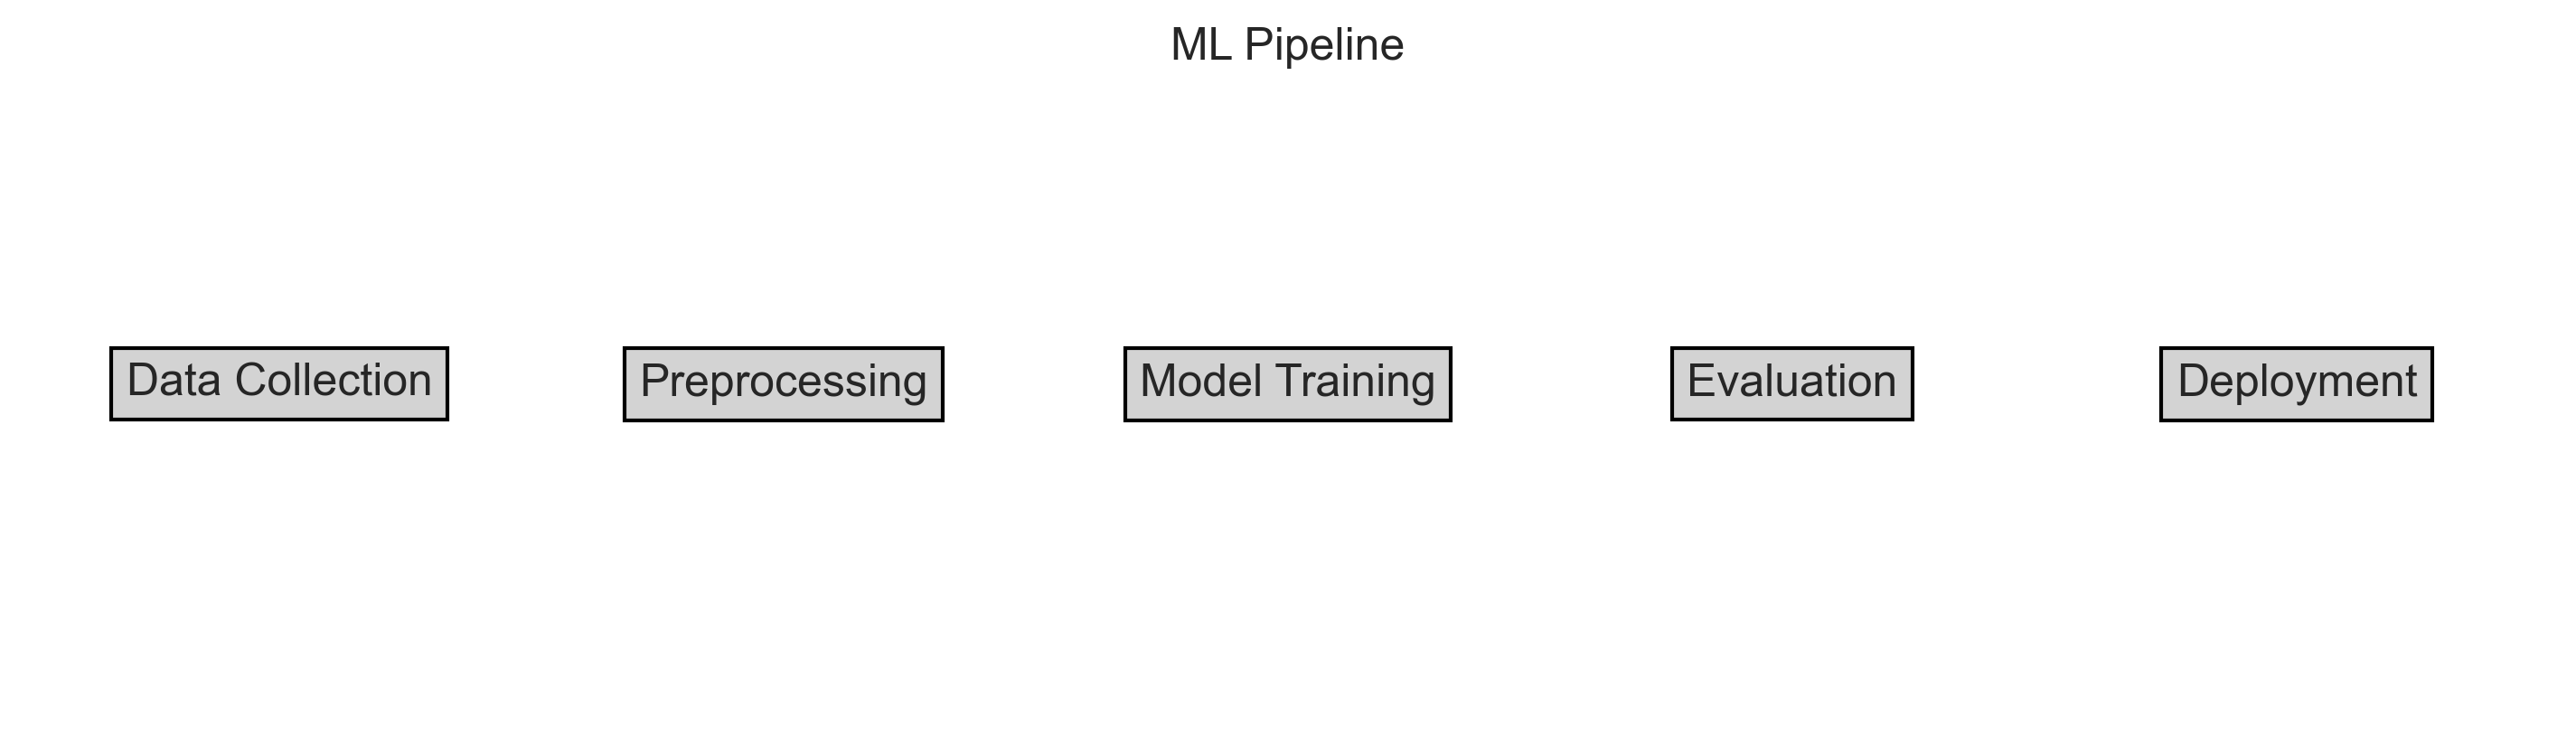

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

fig, ax = plt.subplots(figsize=(12, 3))
steps = ['Data Collection', 'Preprocessing', 'Model Training', 'Evaluation', 'Deployment']
positions = [0.1, 0.3, 0.5, 0.7, 0.9]
for i, step in enumerate(steps):
    ax.text(positions[i], 0.5, step, fontsize=12, bbox=dict(facecolor='lightgray', edgecolor='black'), ha='center')
for i in range(len(steps)-1):
    ax.add_patch(FancyArrowPatch((positions[i]+0.05, 0.5), (positions[i+1]-0.05, 0.5), arrowstyle='->', mutation_scale=20))
ax.axis('off')
plt.title('ML Pipeline')
plt.show()

Liner Regression - House Price Prediction
-----------------------------------------

Dataset shape: (20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min   

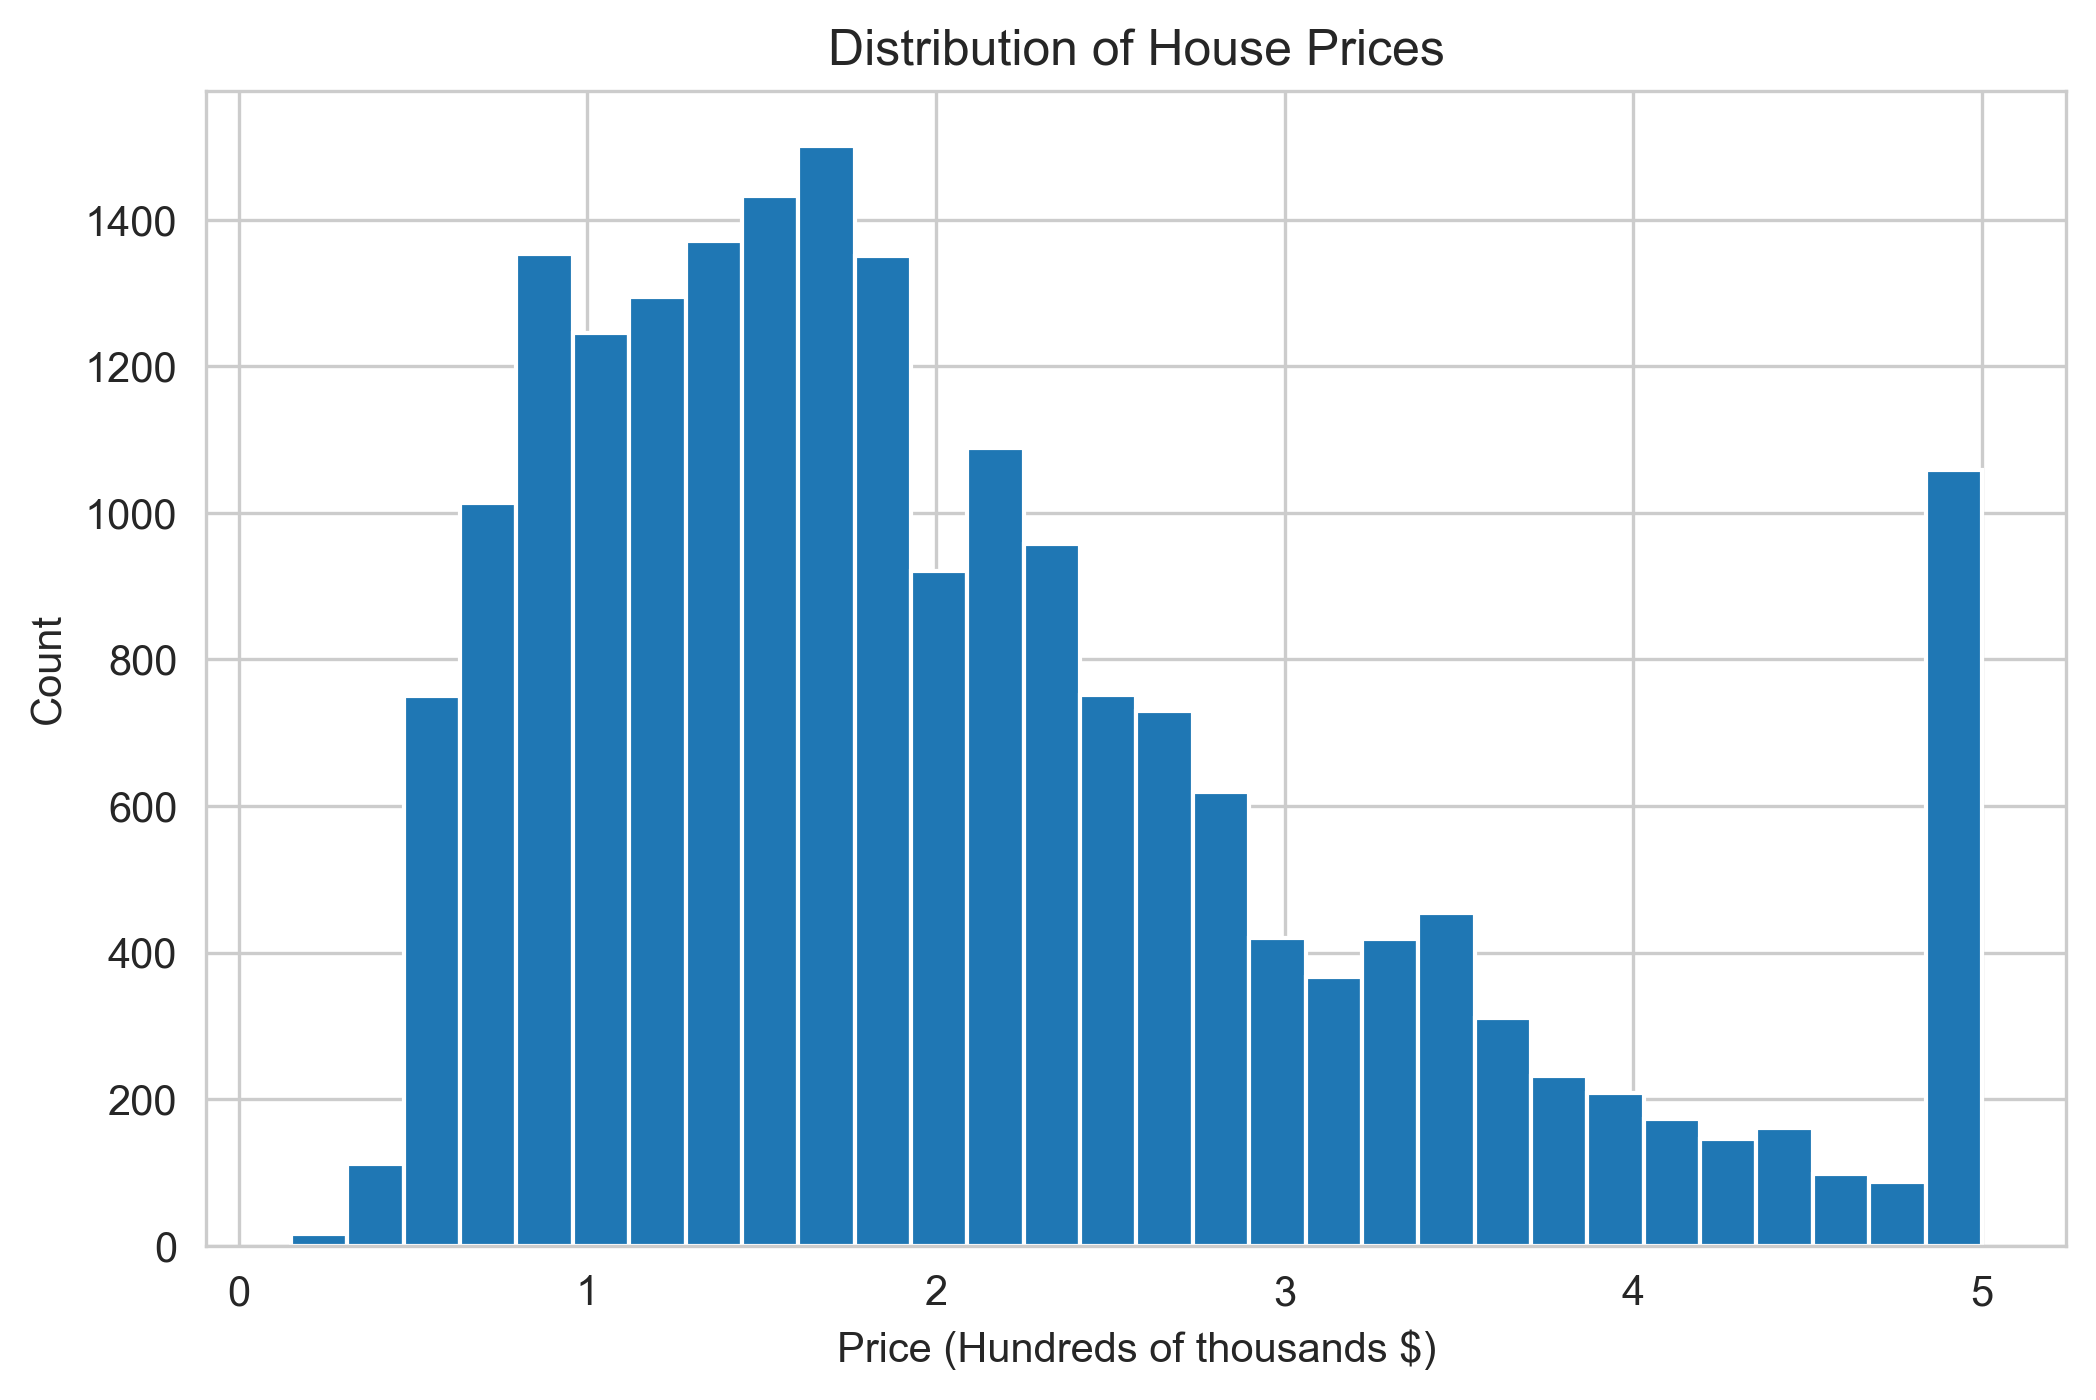

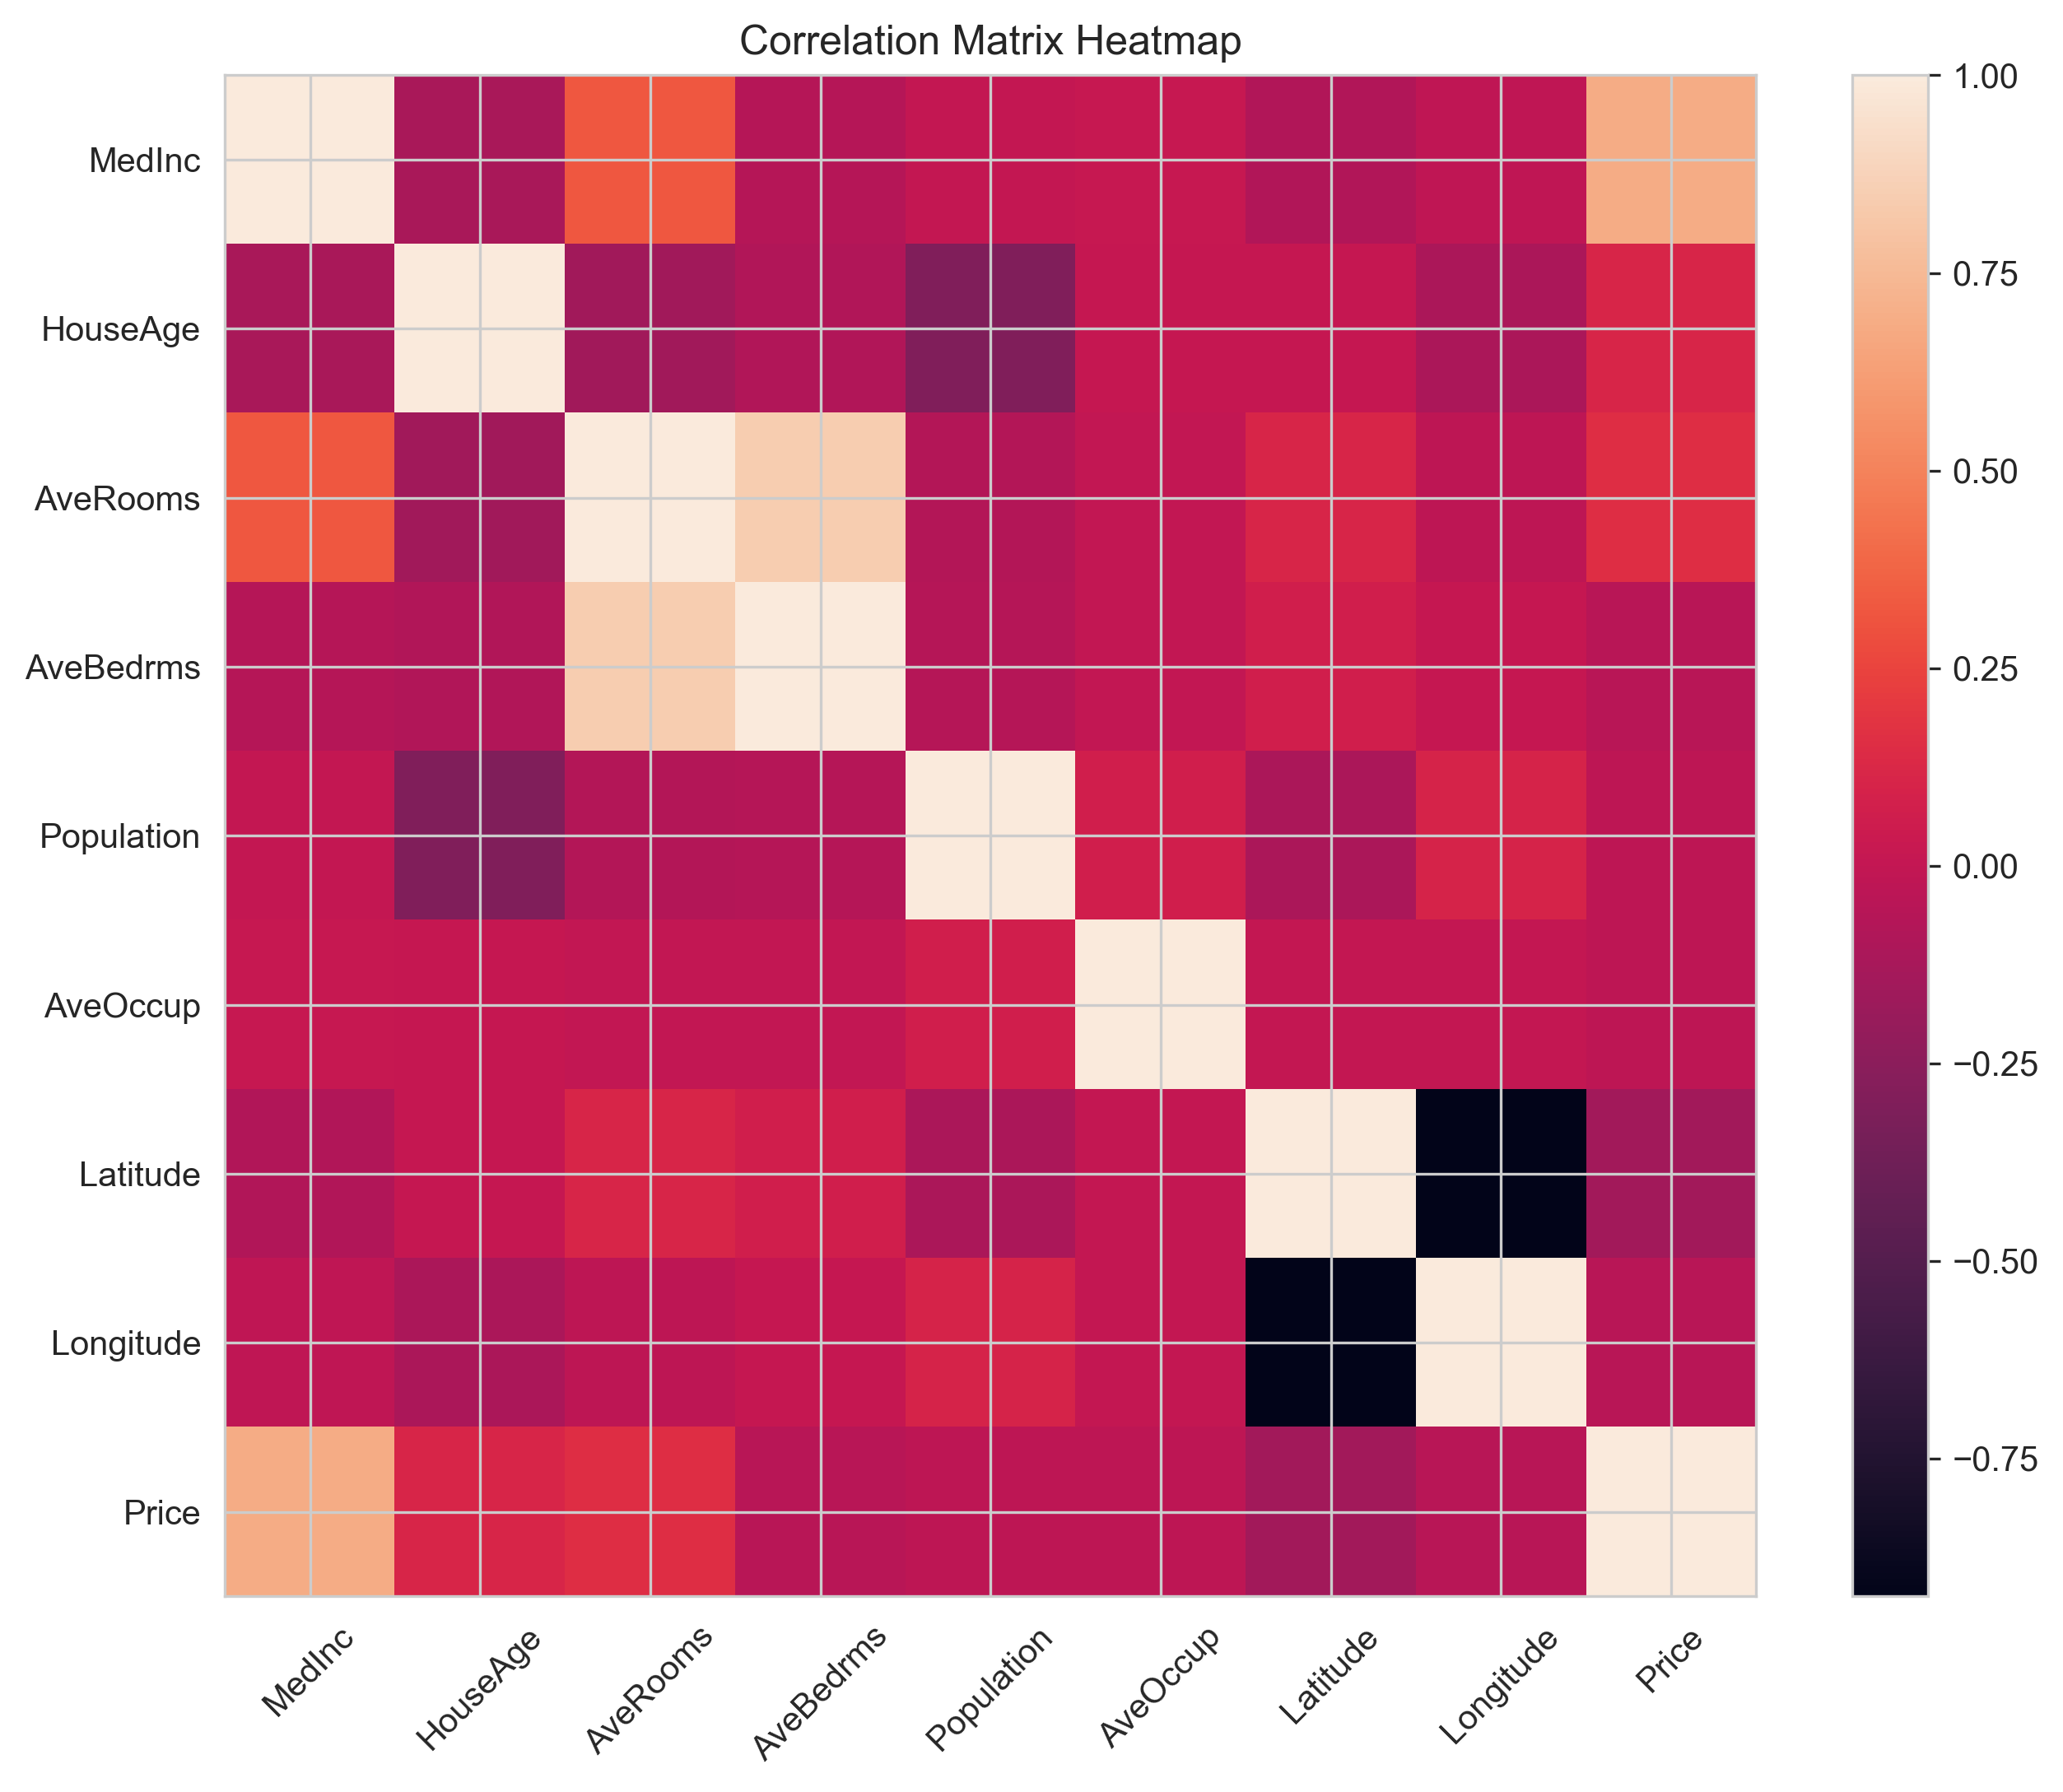

In [4]:
# Liner Regression - House Price Prediction

# Load California housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='Price')
df = pd.concat([X, y], axis=1)

# Basic dataset overview
print(f"Dataset shape: {df.shape}")
print(df.describe())

# EDA: Distribution of target variable
plt.figure(figsize=(8, 5))
plt.hist(df['Price'], bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price (Hundreds of thousands $)')
plt.ylabel('Count')
plt.show()

# EDA: Correlation matrix heatmap - used to visualize feature correlations to select features
corr = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.index)
plt.title('Correlation Matrix Heatmap')
plt.show()

Test MSE: 0.556
Test RMSE: 0.746
Test MAE: 0.533
Test R2: 0.576
CV MSE: 0.558 ± 0.066
CV R2: 0.553 ± 0.062


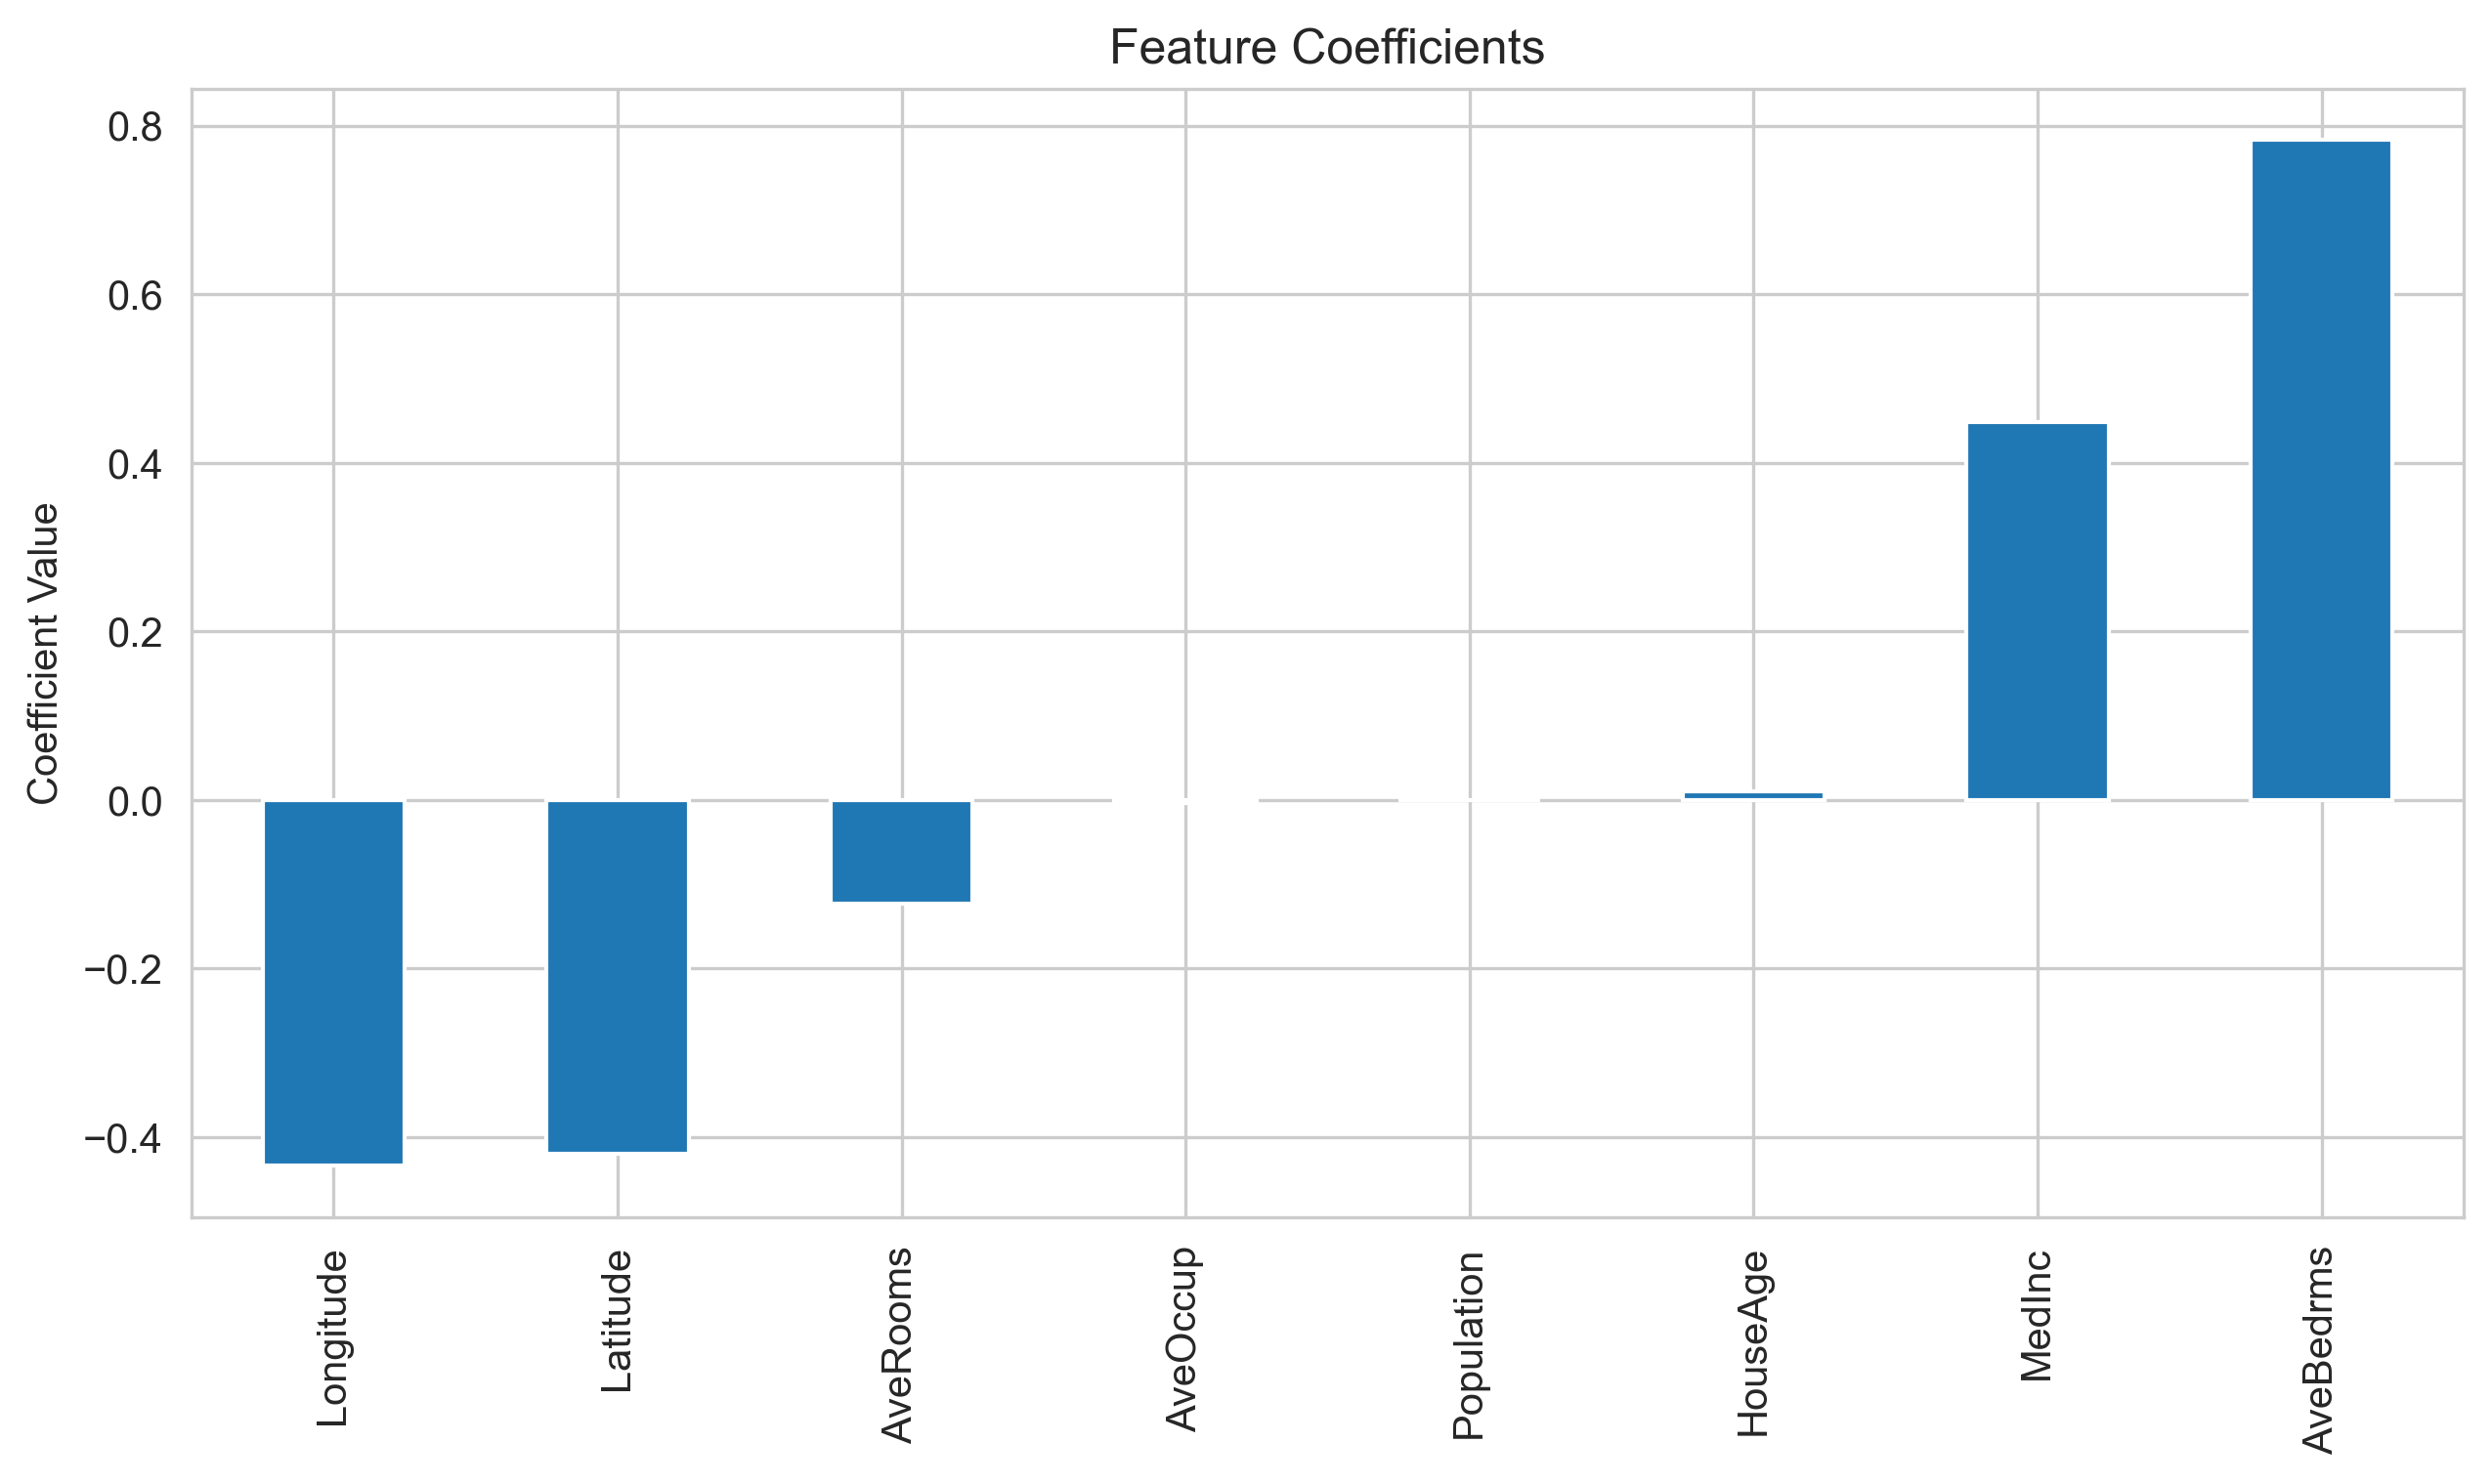

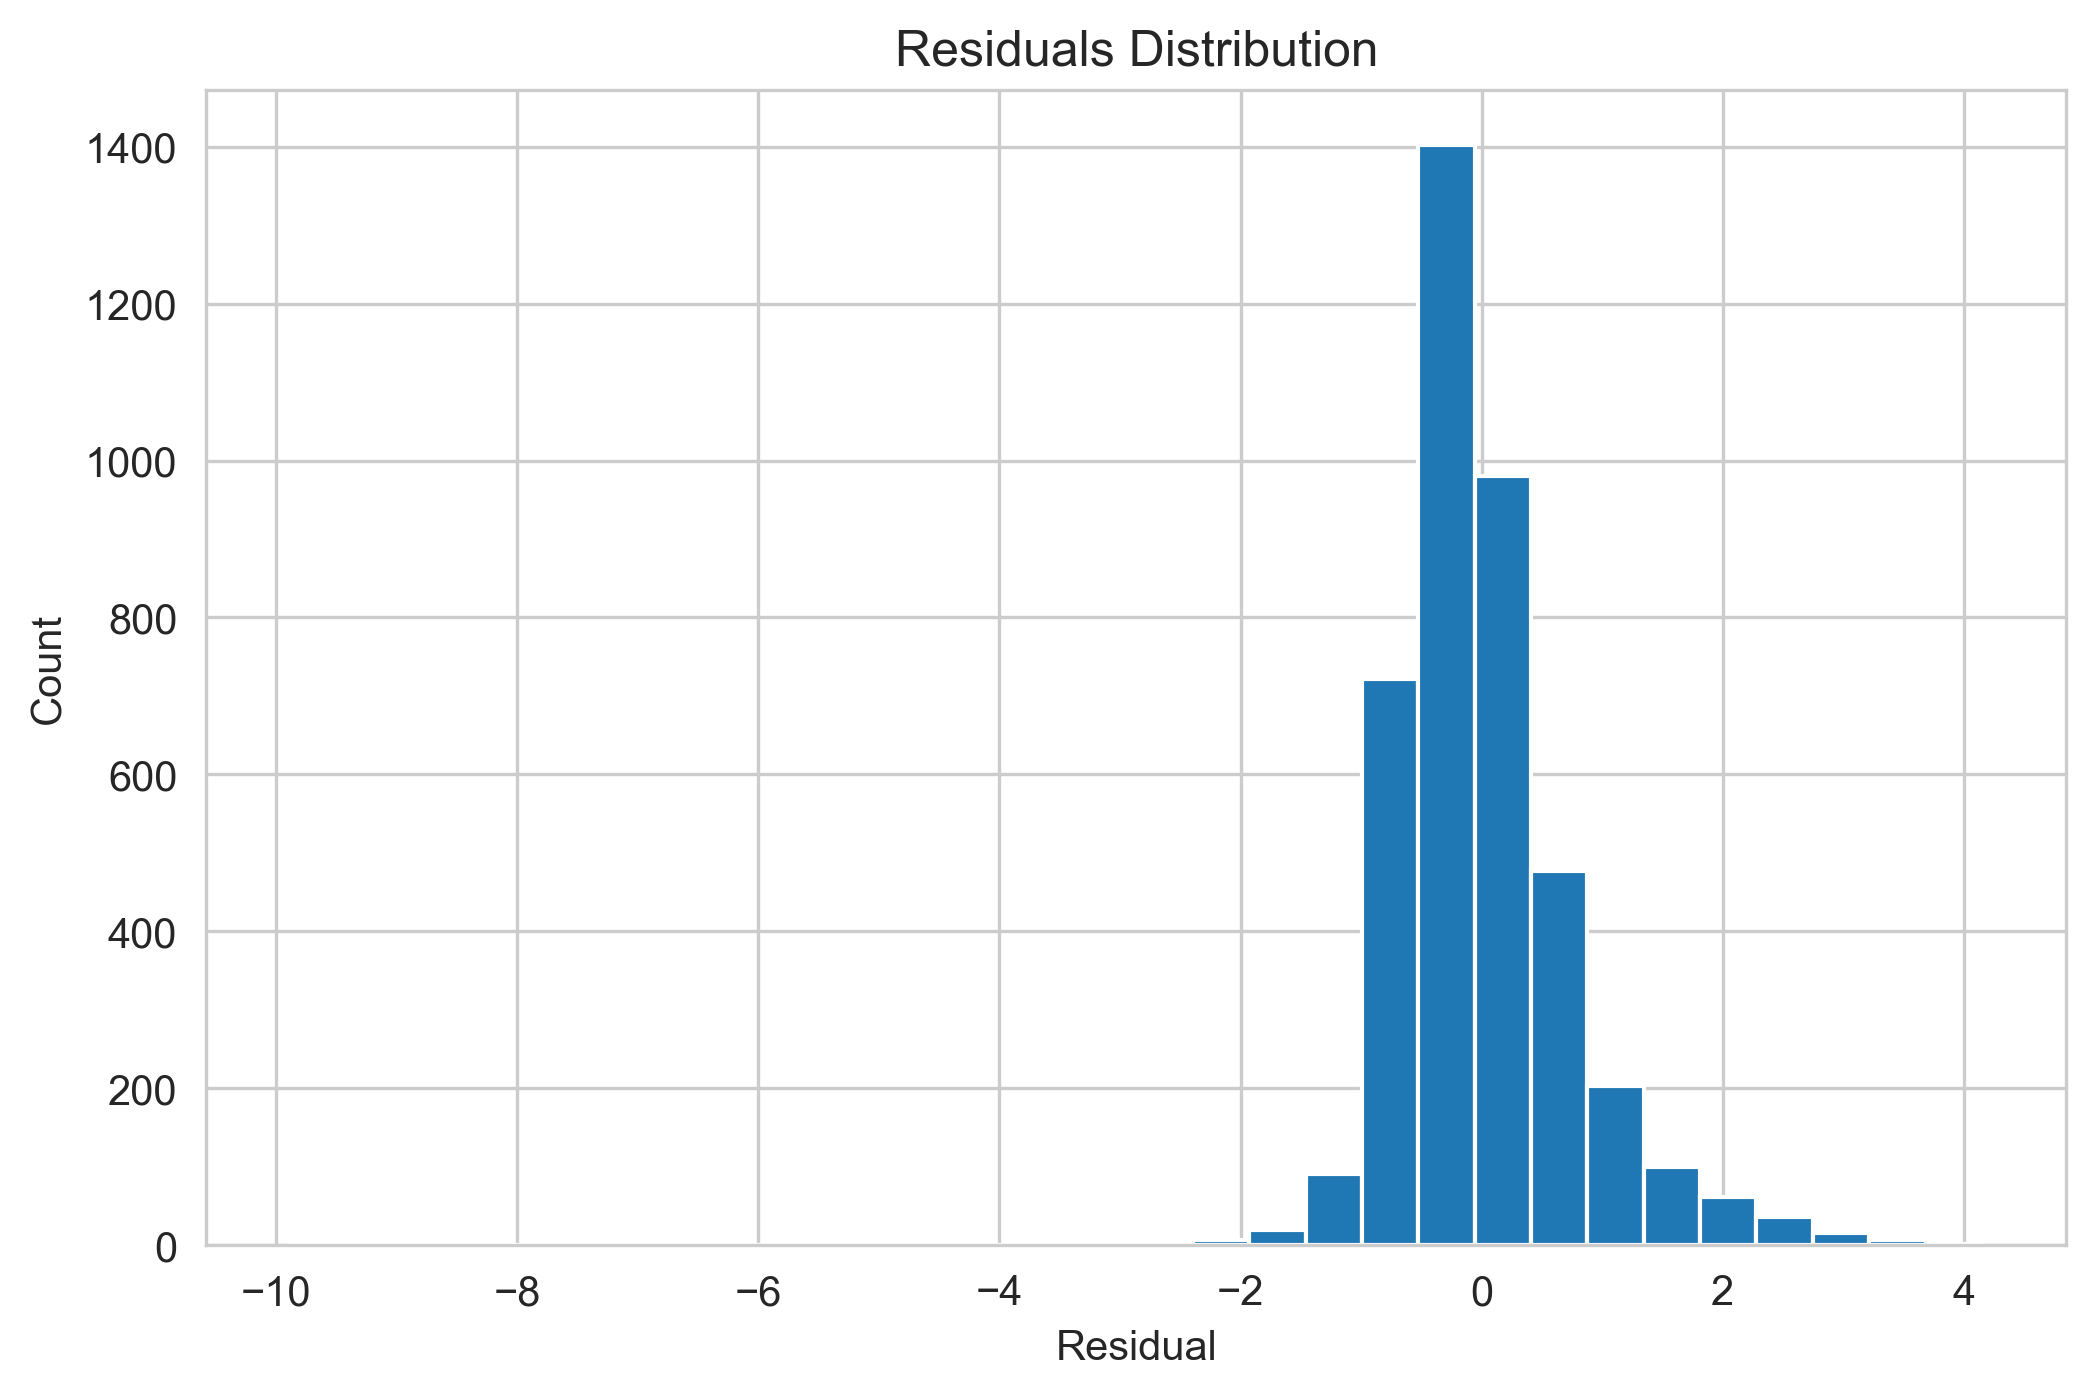

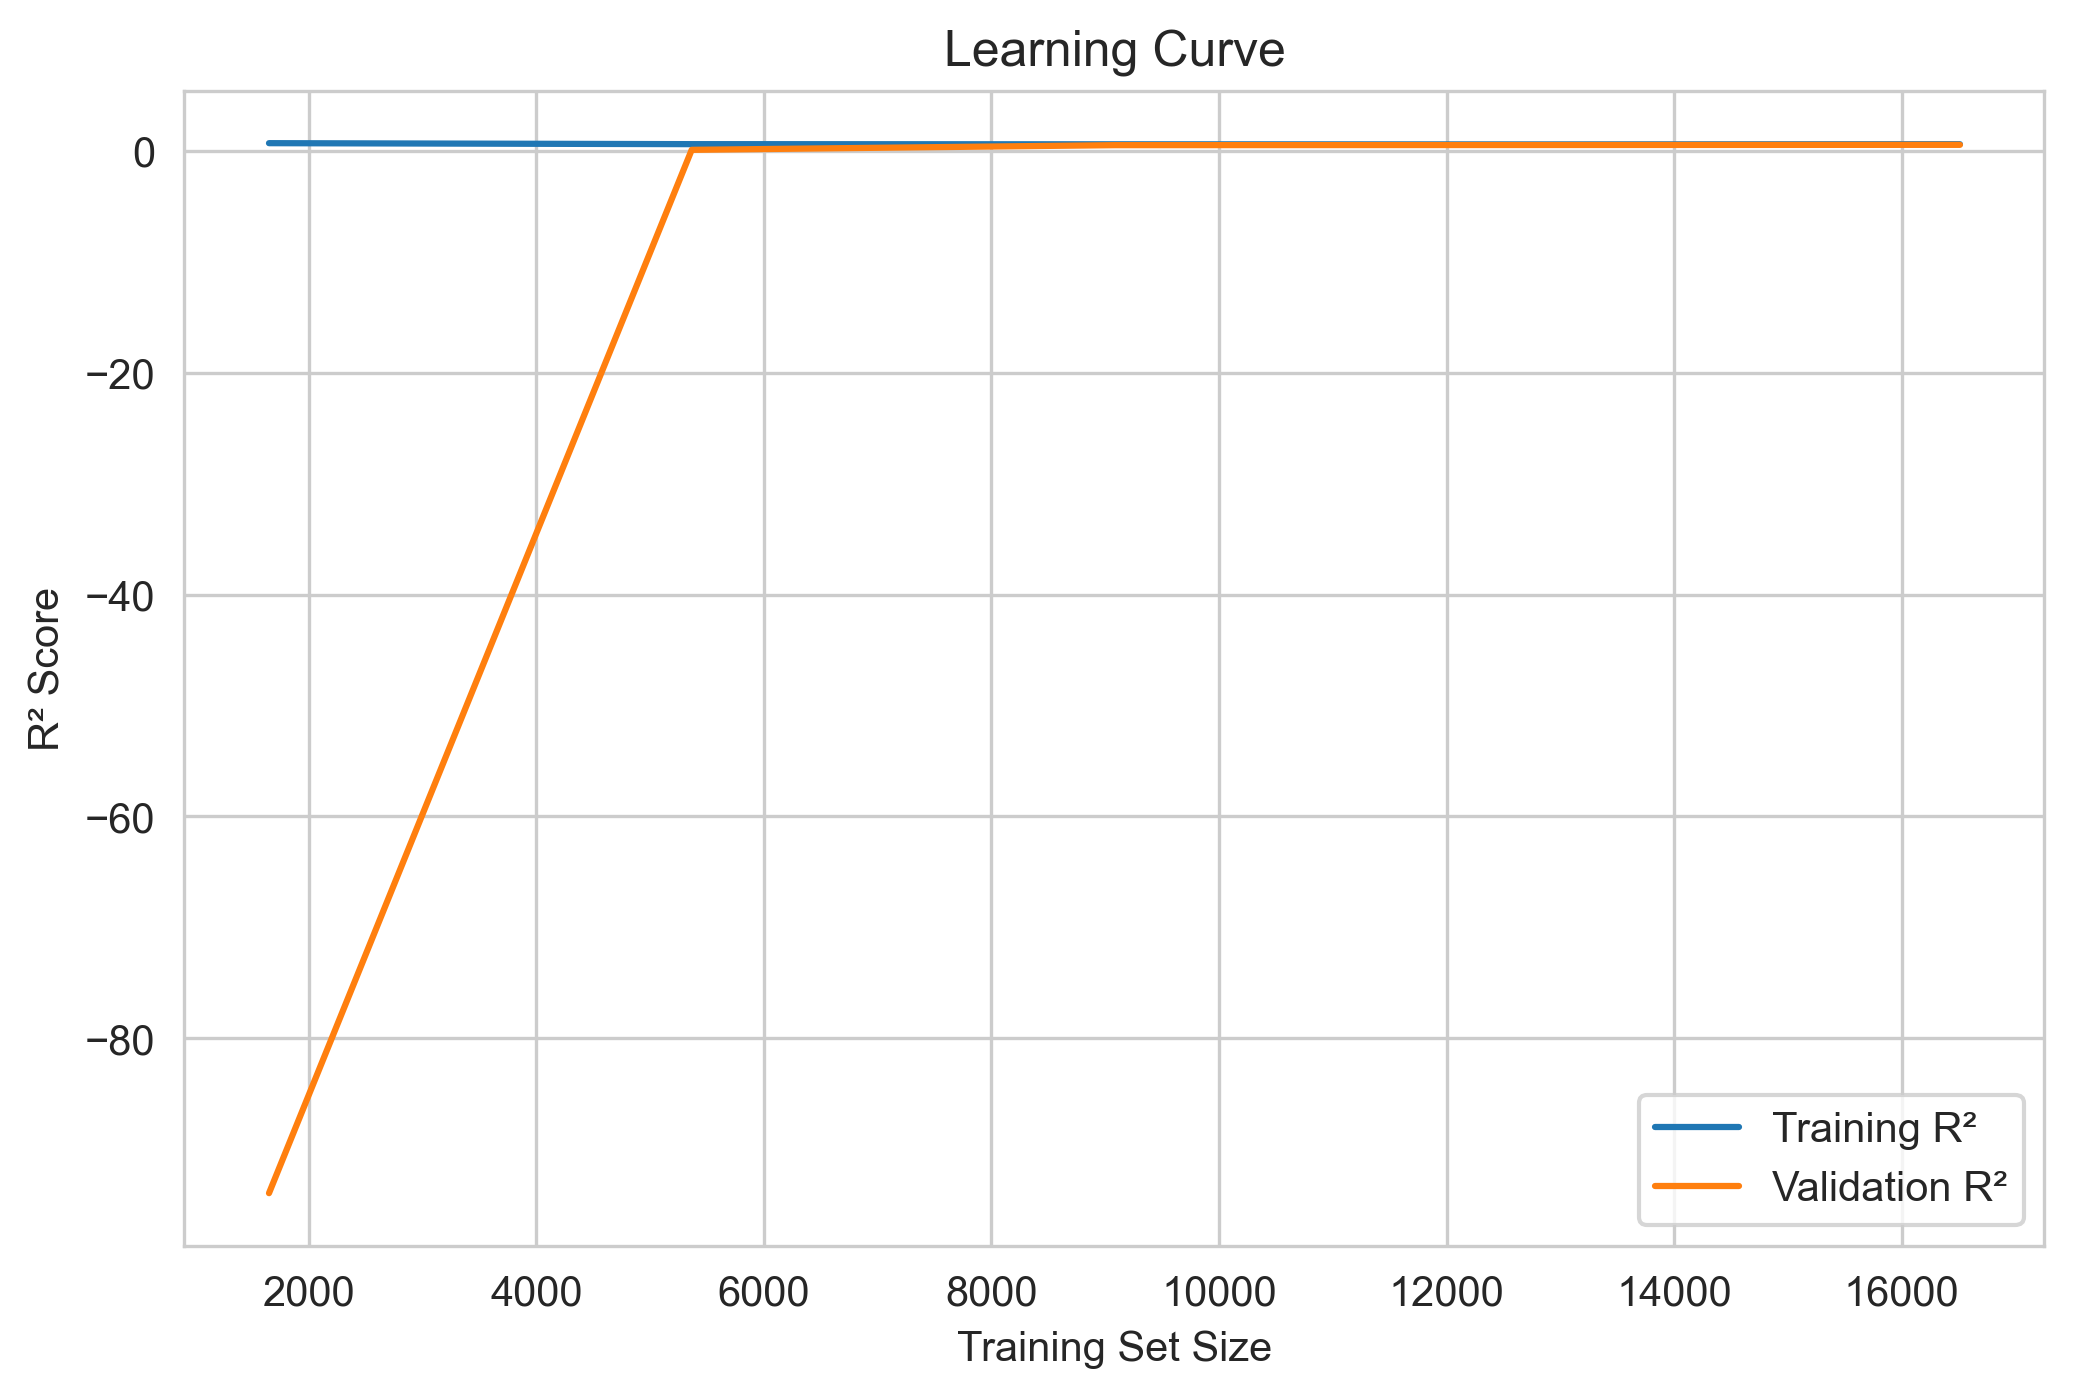

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse:.3f}')
print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test R2: {r2:.3f}')

# Cross-validation scores
cv_mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'CV MSE: {cv_mse.mean():.3f} ± {cv_mse.std():.3f}')
print(f'CV R2: {cv_r2.mean():.3f} ± {cv_r2.std():.3f}')

# Feature coefficients bar chart
coeffs = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(10, 5))
coeffs.sort_values().plot(kind='bar')
plt.title('Feature Coefficients')
plt.ylabel('Coefficient Value')
plt.show()

# Residual analysis
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Residuals vs Predicted scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, y_pred.min(), y_pred.max())
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.show()

# Q-Q plot for residuals
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='r2'
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label='Training R²')
plt.plot(train_sizes, test_scores_mean, label='Validation R²')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.legend()
plt.show()

Test MSE: 0.556

Test RMSE: 0.746 - Since the California Housing dataset prices are in units of $100,000, this means the model's predictions are off by about $74,600 on average (with extra weight on large errors). For houses that might cost $150K–$500K, that's a significant error.

Test MAE: 0.533 - The average absolute error is about $53,300. The fact that MAE is noticeably lower than RMSE tells you there are some predictions with very large errors pulling RMSE up — the model struggles badly on certain houses (likely expensive ones).

Test R2: 0.576 - The model explains only about 58% of the variance in house prices. That means 42% of the price variation is unexplained. In practice, an R² below 0.7 for a regression task usually signals the model is underfitting — it's too simple to capture the real patterns. For a production model you'd typically want R² above 0.8.

CV MSE: 0.558 ± 0.066

CV R2: 0.553 ± 0.062 - CV R² of 0.553 ± 0.062 is actually useful information. The CV score is close to the test score (0.576), which means the model is consistent but consistently mediocre. The ± 0.062 standard deviation is moderate, suggesting reasonably stable performance across folds. This rules out a lucky/unlucky split — the model genuinely has limited capability.



Charts description: 

1. Feature Coefficients Chart — ⚠️ Misleading

    The chart shows AveBedrms and MedInc as the strongest positive drivers, while Latitude and Longitude are the strongest negative ones. However, this chart is misleading because the features aren't scaled. A feature with large raw values (like Population) will get a tiny coefficient, while a feature with small values (like AveBedrms) will get a large one — not because it's more important, but because of the units. Without standardizing the features first, you can't fairly compare coefficient magnitudes. So the chart looks interesting but shouldn't be trusted for feature importance as-is.

2. Residuals Distribution — 🔴 Bad

    This is not a good sign. A healthy model should show a symmetric bell curve centered at zero. Your chart shows the residuals are right-skewed — the peak is near zero, but there's a long tail stretching toward the negative side (down to -10). This means the model occasionally makes massive under-predictions (predicting a much higher price than actual, resulting in large negative residuals). There are also a few outlier residuals that are extremely far from zero. This tells you the model struggles badly with certain houses, likely high-value properties where the price was capped at $5 in the dataset.

3. Residuals vs Predicted — 🔴 Bad

    This is the most revealing chart, and it shows clear problems. You want to see a random scatter around the zero line, but instead you see a strong diagonal pattern — as predicted price increases, residuals form a downward-sloping wedge. This means:

    For low predicted prices (0–2), the model mostly under-predicts (residuals are positive — actual prices are higher than predicted).
    For high predicted prices (4+), the model over-predicts (residuals become negative).
    There's a clear funnel/triangle shape, meaning error variance is not constant (heteroscedasticity).
    That lone point at predicted price ~11.5 with a residual of -10 is a massive outlier.

This pattern screams that the linear relationship assumption is violated — the true relationship between features and price is non-linear and the model can't capture it.

4. Q-Q Plot — 🔴 Bad

    If residuals were normally distributed, all points would sit on the red diagonal line. Your chart shows major deviations at both tails: the left tail drops sharply below the line (that -10 outlier), and the right tail curves above the line. This confirms the residuals are not normally distributed — they have heavy tails, meaning extreme errors are much more common than a normal distribution would predict. The lower-left extreme point (the -10 residual) is a severe outlier. This violates a key assumption of linear regression and means confidence intervals and p-values from this model would be unreliable.

5. Learning Curve — 🔴 Bad (and unusual)

    This chart is the most alarming. The validation R² starts at around -90 with small training sizes and climbs rapidly to converge near the training R² around ~0.55 by 6000+ samples. The extremely negative validation R² at small training sizes means the model was making catastrophically bad predictions when trained on little data — likely because without enough data, the linear regression coefficients were wildly unstable (possibly due to multicollinearity or outliers in the small samples).

    Once both curves converge and flatten at ~0.55 R², this confirms underfitting: both training and validation scores are low and close together. Adding more data beyond ~8000 samples doesn't help at all. The model has hit its ceiling — Linear Regression simply cannot capture the complexity of this data. The fix is not more data, but a more powerful model (like Random Forest, XGBoost, etc.).

## Unsupervised Learning : Customer Segmentation (K - means)

In [6]:
# Create synthetic customer data
np.random.seed(42)
n_customers = 300

# Generate customer spending data
annual_spending = np.random.normal(50000, 15000, n_customers)
frequency_visits = np.random.poisson(12, n_customers)
avg_purchase = annual_spending / frequency_visits + np.random.normal(0, 100, n_customers)

# Create customer dataset
customer_data = pd.DataFrame({
    'Annual_Spending': annual_spending,
    'Visit_Frequency': frequency_visits,
    'Avg_Purchase_Value': avg_purchase
})

print("Customer Dataset:")
print(customer_data.head())
print(f"\nDataset shape: {customer_data.shape}")

Customer Dataset:
   Annual_Spending  Visit_Frequency  Avg_Purchase_Value
0     57450.712295               10         5642.947948
1     47926.035482               11         4427.747961
2     59715.328072               16         3756.588076
3     72845.447846               12         6014.046124
4     46487.699379               10         4520.739498

Dataset shape: (300, 3)


e:\studies\ML\projects\ML Learning\House Price Prediction\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


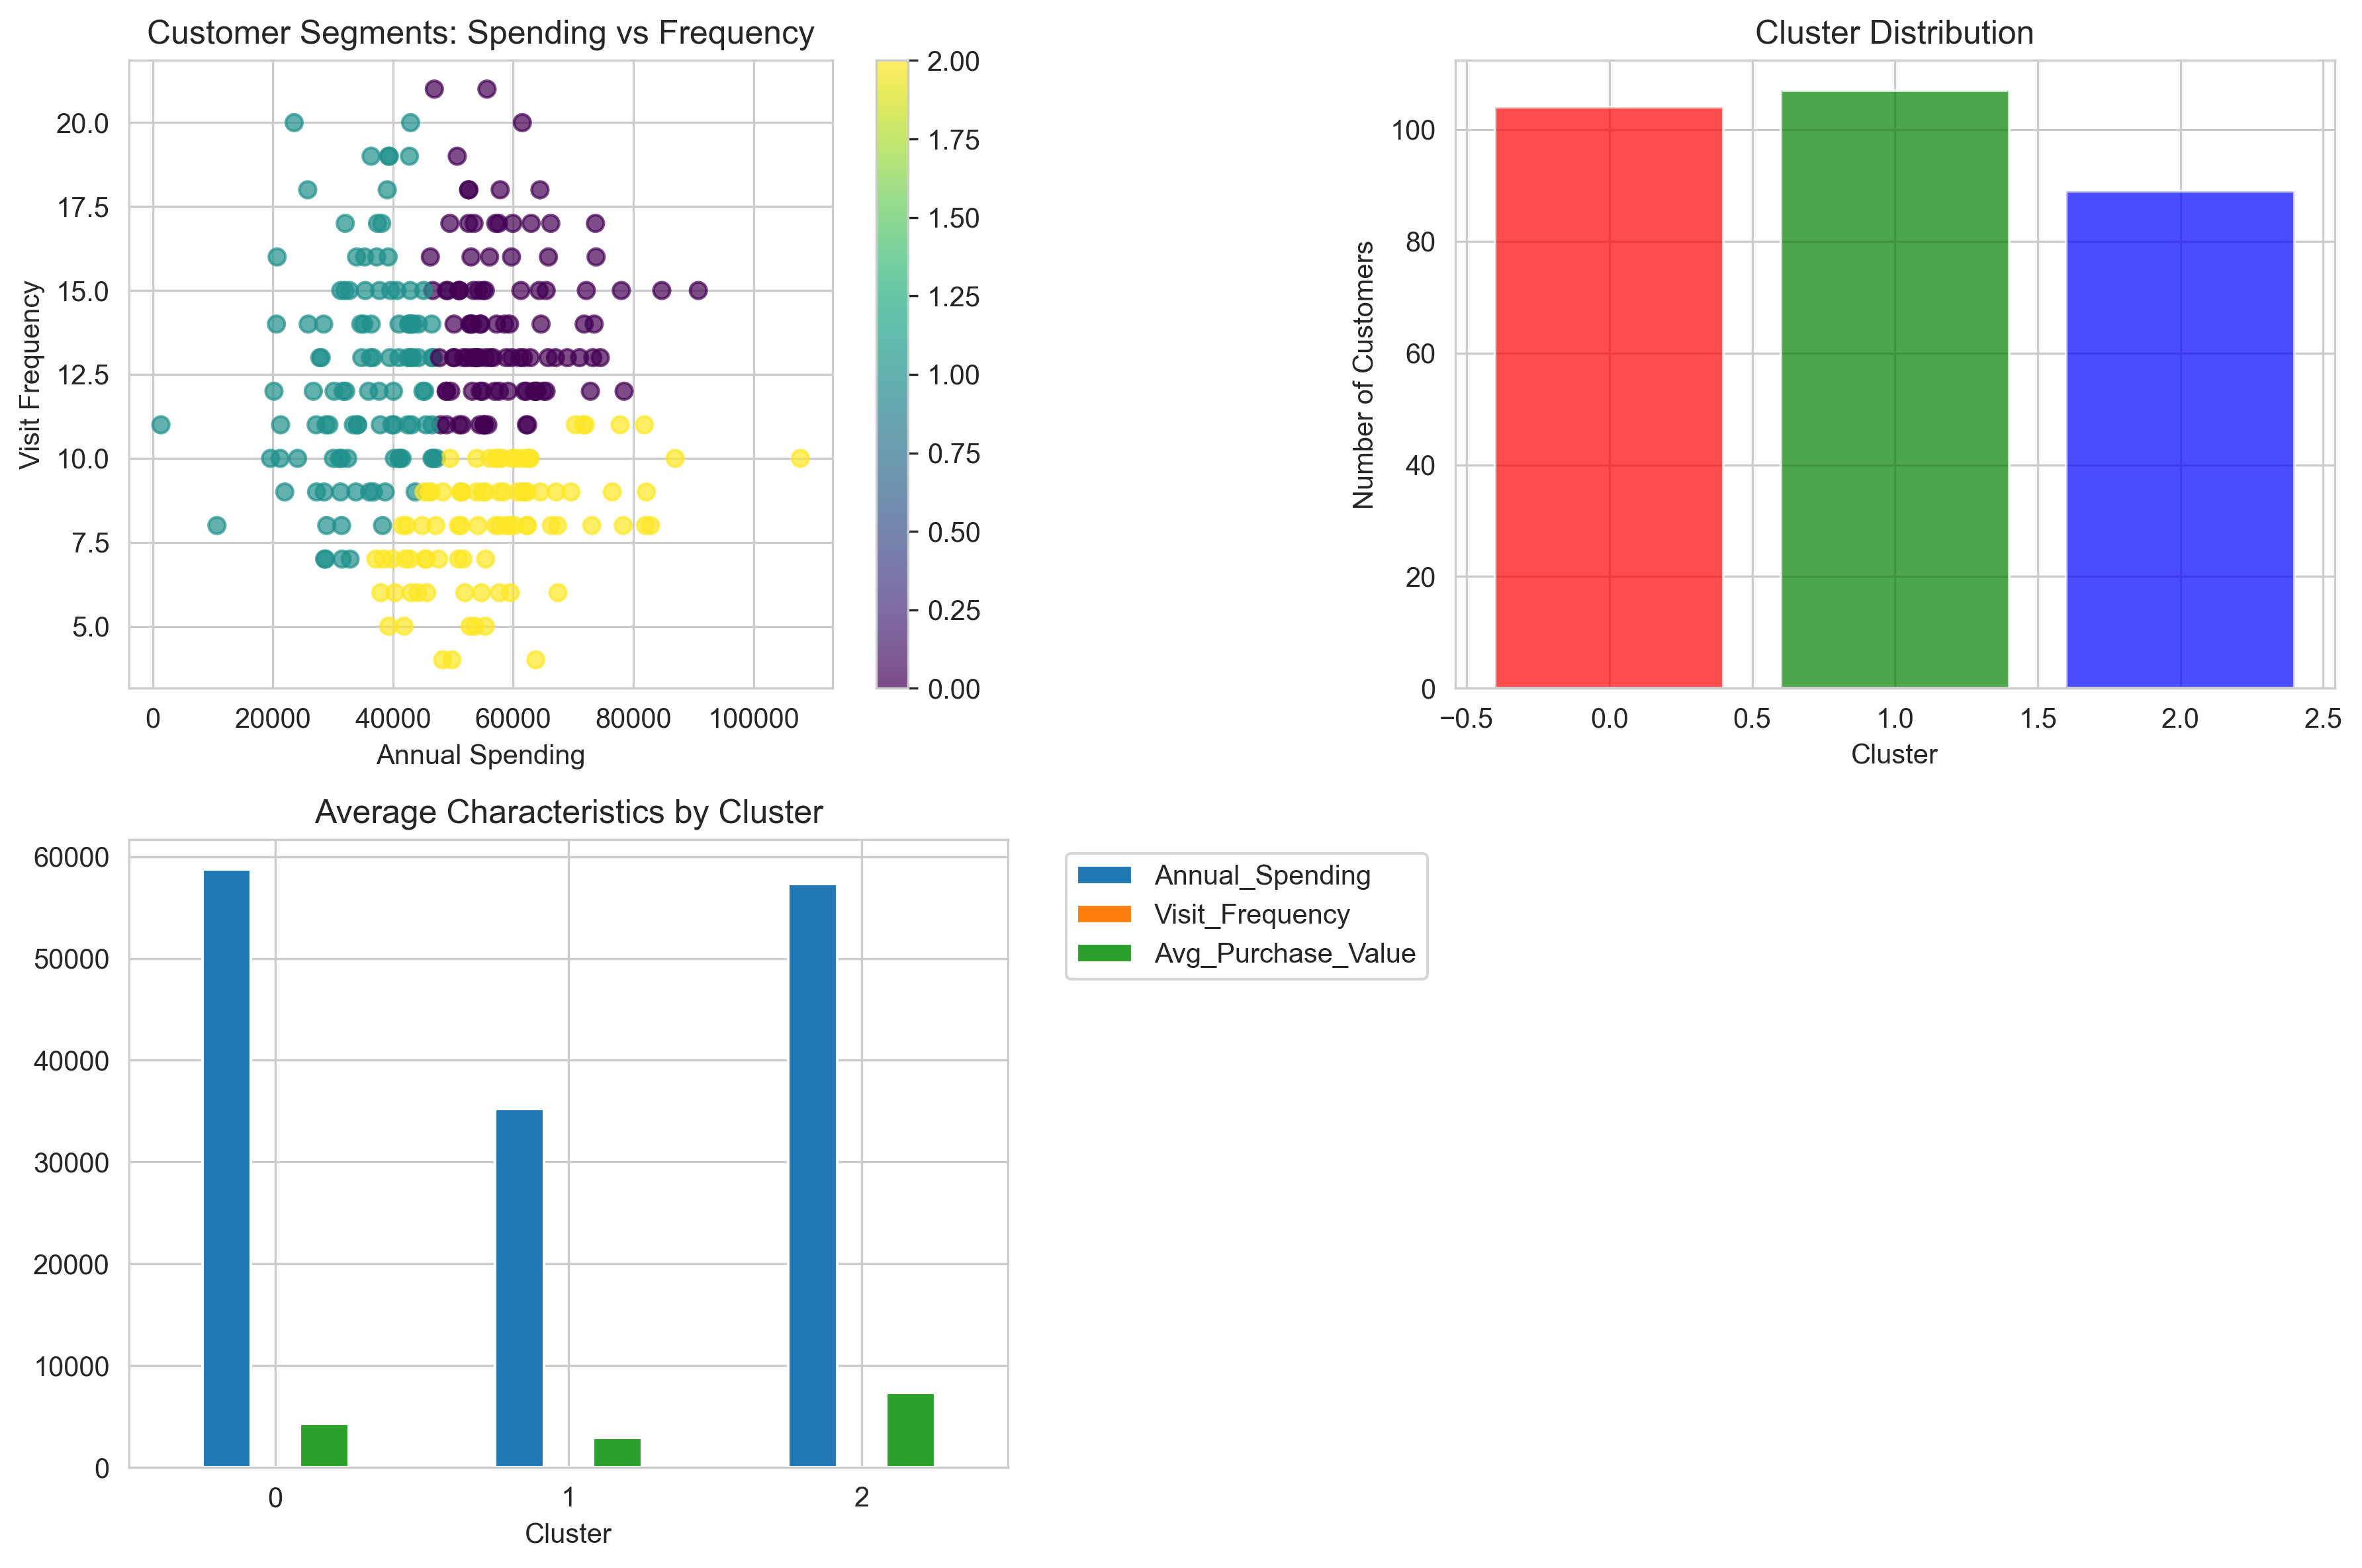


Cluster Analysis:
Cluster 0: 104 customers
  Avg Annual Spending: $58714.67
  Avg Visit Frequency: 14.0
  Avg Purchase Value: $4280.10

Cluster 1: 107 customers
  Avg Annual Spending: $35221.37
  Avg Visit Frequency: 12.5
  Avg Purchase Value: $2960.99

Cluster 2: 89 customers
  Avg Annual Spending: $57303.58
  Avg Visit Frequency: 8.1
  Avg Purchase Value: $7372.81

Unsupervised Learning: Finds hidden patterns in data without labels


In [7]:
# Standardize the features
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(customer_scaled)

# Add cluster labels to original data
customer_data['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(12, 8))

# Plot 1: Annual Spending vs Visit Frequency
plt.subplot(2, 2, 1)
scatter = plt.scatter(customer_data['Annual_Spending'], customer_data['Visit_Frequency'], 
                     c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Annual Spending')
plt.ylabel('Visit Frequency')
plt.title('Customer Segments: Spending vs Frequency')
plt.colorbar(scatter)

# Plot 2: Cluster distribution
plt.subplot(2, 2, 2)
cluster_counts = customer_data['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color=['red', 'green', 'blue'], alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Distribution')

# Plot 3: Cluster characteristics
plt.subplot(2, 2, 3)
cluster_means = customer_data.groupby('Cluster')[['Annual_Spending', 'Visit_Frequency', 'Avg_Purchase_Value']].mean()
cluster_means.plot(kind='bar', ax=plt.gca())
plt.title('Average Characteristics by Cluster')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\nCluster Analysis:")
for i in range(3):
    cluster_info = customer_data[customer_data['Cluster'] == i]
    print(f"Cluster {i}: {len(cluster_info)} customers")
    print(f"  Avg Annual Spending: ${cluster_info['Annual_Spending'].mean():.2f}")
    print(f"  Avg Visit Frequency: {cluster_info['Visit_Frequency'].mean():.1f}")
    print(f"  Avg Purchase Value: ${cluster_info['Avg_Purchase_Value'].mean():.2f}")
    print()

print("Unsupervised Learning: Finds hidden patterns in data without labels")

## Reinforcement Learning : Grid World Navigation (Q-learning algorithm)


In [8]:
# Better looking plots (optional)
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True
np.random.seed(42)  # reproducibility

# GridWorld environment
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.start = (0, 0)
        self.goal = (size - 1, size - 1)
        self.current_pos = self.start

    def reset(self):
        self.current_pos = self.start
        return self.current_pos

    def step(self, action):
        # Actions: 0=up, 1=right, 2=down, 3=left
        moves = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        dr, dc = moves[action]
        r, c = self.current_pos
        new_pos = (r + dr, c + dc)

        # Stay in bounds
        if 0 <= new_pos[0] < self.size and 0 <= new_pos[1] < self.size:
            self.current_pos = new_pos

        # Reward
        if self.current_pos == self.goal:
            return self.current_pos, 100, True
        else:
            return self.current_pos, -1, False

# Q-learning algorithm with extra logging
def q_learning(env, episodes=1000, learning_rate=0.1, discount=0.9,
               epsilon=0.3, epsilon_decay=0.995, min_epsilon=0.01,
               max_steps=100, log_trajectories=True, log_every=100):
    """
    Returns:
      q_table, rewards_per_episode, steps_per_episode, epsilons,
      td_errors_mean, state_visits, saved_paths
    """
    q_table = np.zeros((env.size, env.size, 4))
    rewards_per_episode = []
    steps_per_episode = []
    epsilons = []
    td_errors_mean = []
    state_visits = np.zeros((env.size, env.size), dtype=int)
    saved_paths = {}

    for ep in range(episodes):
        state = env.reset()
        total_reward = 0
        td_errors = []
        path = [state]

        # Decay epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        for _ in range(max_steps):
            # ε-greedy policy
            if np.random.rand() < epsilon:
                action = np.random.randint(4)
            else:
                action = np.argmax(q_table[state[0], state[1], :])

            next_state, reward, done = env.step(action)
            total_reward += reward

            # Q-update
            current_q = q_table[state[0], state[1], action]
            max_next_q = np.max(q_table[next_state[0], next_state[1], :])
            td_error = reward + discount * max_next_q - current_q
            q_table[state[0], state[1], action] = current_q + learning_rate * td_error
            td_errors.append(td_error)

            # Logging
            state_visits[next_state[0], next_state[1]] += 1
            state = next_state
            path.append(state)

            if done:
                break

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(len(path) - 1)
        epsilons.append(epsilon)
        td_errors_mean.append(np.mean(td_errors))

        if log_trajectories and ep % log_every == 0:
            saved_paths[ep] = path

    return (q_table, rewards_per_episode, steps_per_episode, epsilons,
            td_errors_mean, state_visits, saved_paths)



In [9]:
# Helper plotting functions
def moving_average(x, window=50):
    if len(x) < window:
        return np.array([])
    return np.convolve(x, np.ones(window)/window, mode='valid')

def plot_learning_curves(rewards, steps, epsilons, td_errors, window=50):
    fig, axes = plt.subplots(2, 2, figsize=(12, 9))
    ax1, ax2, ax3, ax4 = axes.ravel()

    # Rewards
    ax1.plot(rewards, label='Reward')
    ma = moving_average(rewards, window)
    if len(ma) > 0:
        ax1.plot(range(window-1, len(rewards)), ma, label=f'MA({window})')
    ax1.set_title('Total Reward per Episode')
    ax1.set_xlabel('Episode'); ax1.set_ylabel('Reward'); ax1.legend()

    # Steps per episode
    ax2.plot(steps)
    ax2.set_title('Steps per Episode')
    ax2.set_xlabel('Episode'); ax2.set_ylabel('Steps')

    # Epsilon
    ax3.plot(epsilons)
    ax3.set_title('Epsilon over Time')
    ax3.set_xlabel('Episode'); ax3.set_ylabel('ε')

    # TD Error
    ax4.plot(td_errors)
    ax4.set_title('Mean TD Error per Episode')
    ax4.set_xlabel('Episode'); ax4.set_ylabel('Mean TD Error')

    plt.tight_layout()
    plt.show()

def plot_policy(q_table, start, goal):
    size = q_table.shape[0]
    policy = np.argmax(q_table, axis=2)
    arrows = ['↑', '→', '↓', '←']

    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(policy, cmap='viridis')
    ax.set_title('Learned Policy (Best Action per State)')
    for i in range(size):
        for j in range(size):
            if (i, j) == goal:
                text, color = 'GOAL', 'yellow'
            elif (i, j) == start:
                text, color = 'START', 'yellow'
            else:
                text, color = arrows[policy[i, j]], 'white'
            ax.text(j, i, text, ha='center', va='center', color=color, fontsize=12)
    plt.colorbar(im, ax=ax, fraction=0.046)
    plt.show()

def plot_value_and_q(q_table):
    size = q_table.shape[0]
    V = np.max(q_table, axis=2)

    fig, axes = plt.subplots(2, 3, figsize=(12, 7))
    axV = axes[0, 0]
    imV = axV.imshow(V, interpolation='nearest')
    axV.set_title('State Value: V(s) = max_a Q(s,a)')
    plt.colorbar(imV, ax=axV, fraction=0.046)

    actions = ['Up', 'Right', 'Down', 'Left']
    idx = 0
    for r in range(2):
        for c in range(1, 3):
            ax = axes[r, c]
            if idx < 4:
                im = ax.imshow(q_table[:, :, idx], interpolation='nearest')
                ax.set_title(f'Q(s,a) for action: {actions[idx]}')
                plt.colorbar(im, ax=ax, fraction=0.046)
            else:
                ax.axis('off')
            idx += 1

    plt.tight_layout()
    plt.show()

def plot_state_visits(state_visits, start, goal):
    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(state_visits, interpolation='nearest')
    ax.set_title('State Visit Counts')
    for i in range(state_visits.shape[0]):
        for j in range(state_visits.shape[1]):
            if (i, j) == goal:
                text = 'G'
            elif (i, j) == start:
                text = 'S'
            else:
                text = state_visits[i, j]
            ax.text(j, i, text, ha='center', va='center', color='white', fontsize=10)
    plt.colorbar(im, ax=ax, fraction=0.046)
    plt.show()

# Animation of one episode
def animate_episode(env, path, interval=400):
    """
    path: list of (row, col) states
    Returns (fig, ani)
    """
    size = env.size
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(-0.5, size - 0.5)
    ax.set_ylim(-0.5, size - 0.5)
    ax.set_xticks(range(size))
    ax.set_yticks(range(size))
    ax.grid(True)
    ax.invert_yaxis()

    ax.text(env.goal[1], env.goal[0], 'GOAL', ha='center', va='center',
            color='yellow', fontsize=10)
    ax.text(env.start[1], env.start[0], 'START', ha='center', va='center',
            color='yellow', fontsize=10)

    # Use plot, but pass lists
    agent_dot, = ax.plot([], [], 'o', markersize=12)

    def init():
        agent_dot.set_data([], [])
        return (agent_dot,)

    def update(frame):
        r, c = path[frame]
        agent_dot.set_data([c], [r])   # <— LISTS, not scalars
        return (agent_dot,)

    ani = animation.FuncAnimation(fig, update,
                                  frames=len(path),
                                  init_func=init,
                                  interval=interval,
                                  blit=True,
                                  repeat=False)
    return fig, ani



In [10]:
# Train
env = GridWorld(size=5)

(q_table, rewards, steps, epsilons,
 td_errors, visits, paths) = q_learning(
    env,
    episodes=1000,
    learning_rate=0.1,
    discount=0.9,
    epsilon=0.3,
    epsilon_decay=0.995,
    min_epsilon=0.01,
    max_steps=100,
    log_trajectories=True,
    log_every=100
)

print("Training complete.")
print(f"Final average reward (last 100 eps): {np.mean(rewards[-100:]):.2f}")


Training complete.
Final average reward (last 100 eps): 92.94


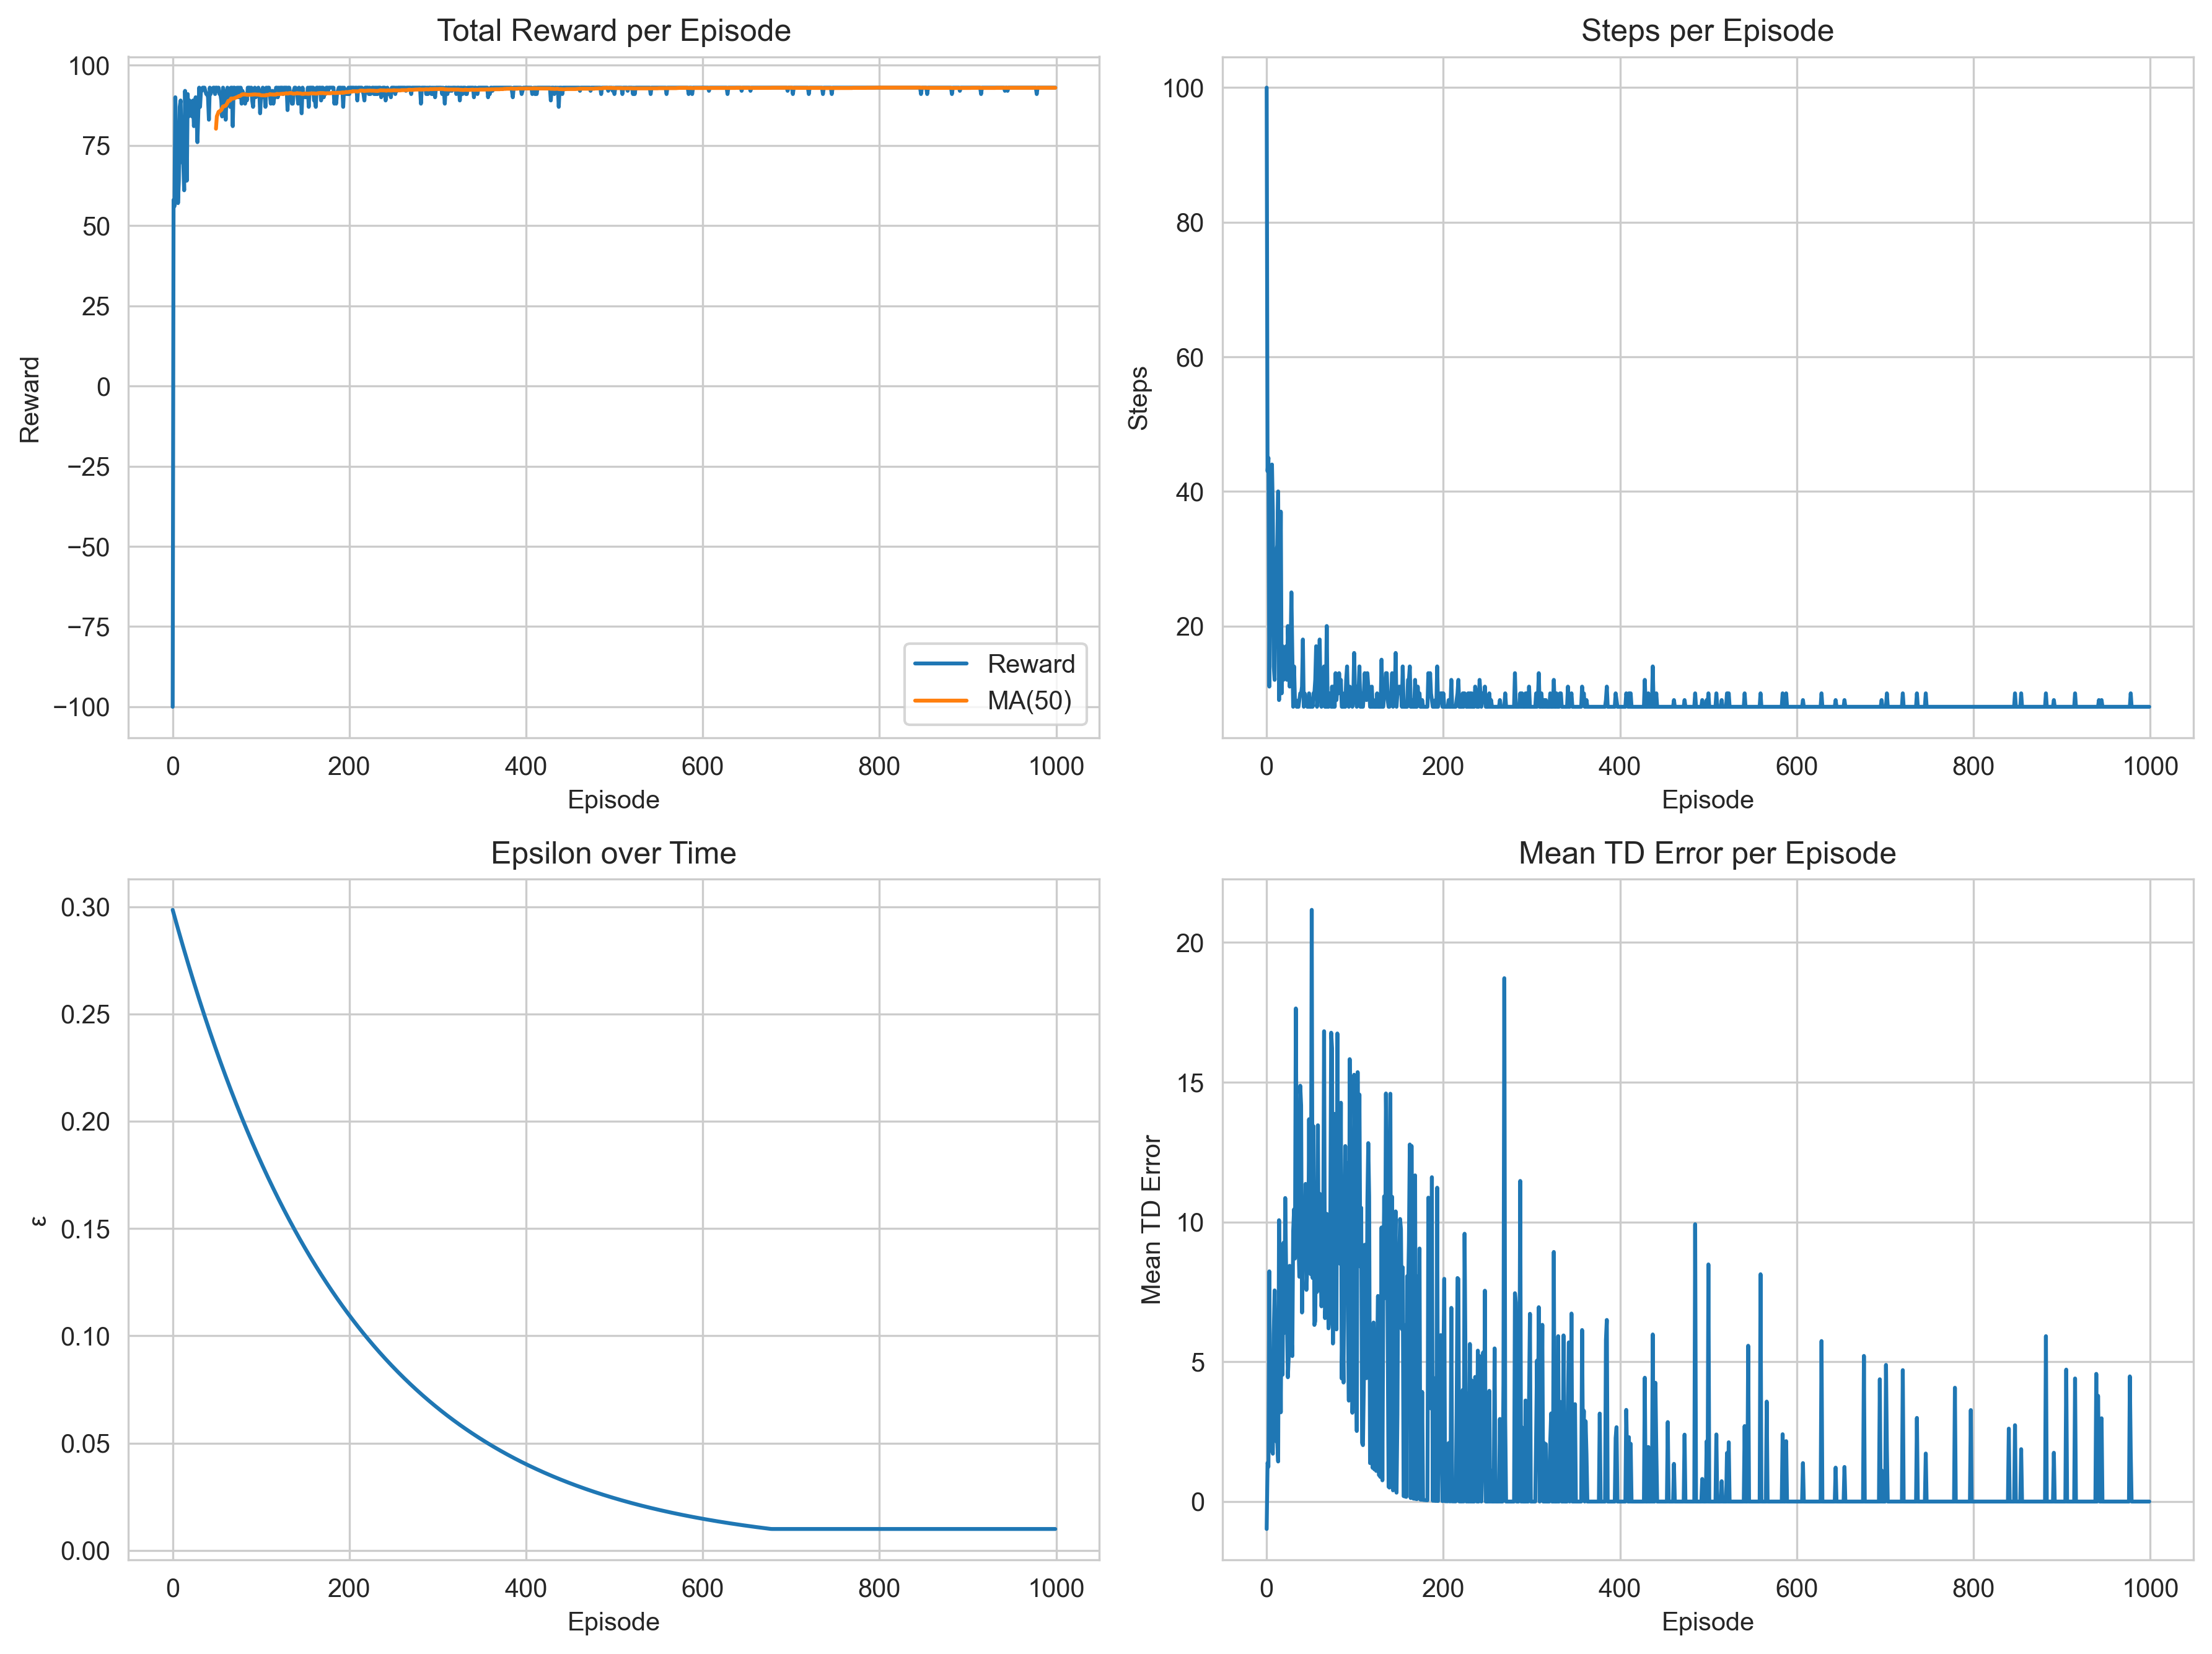

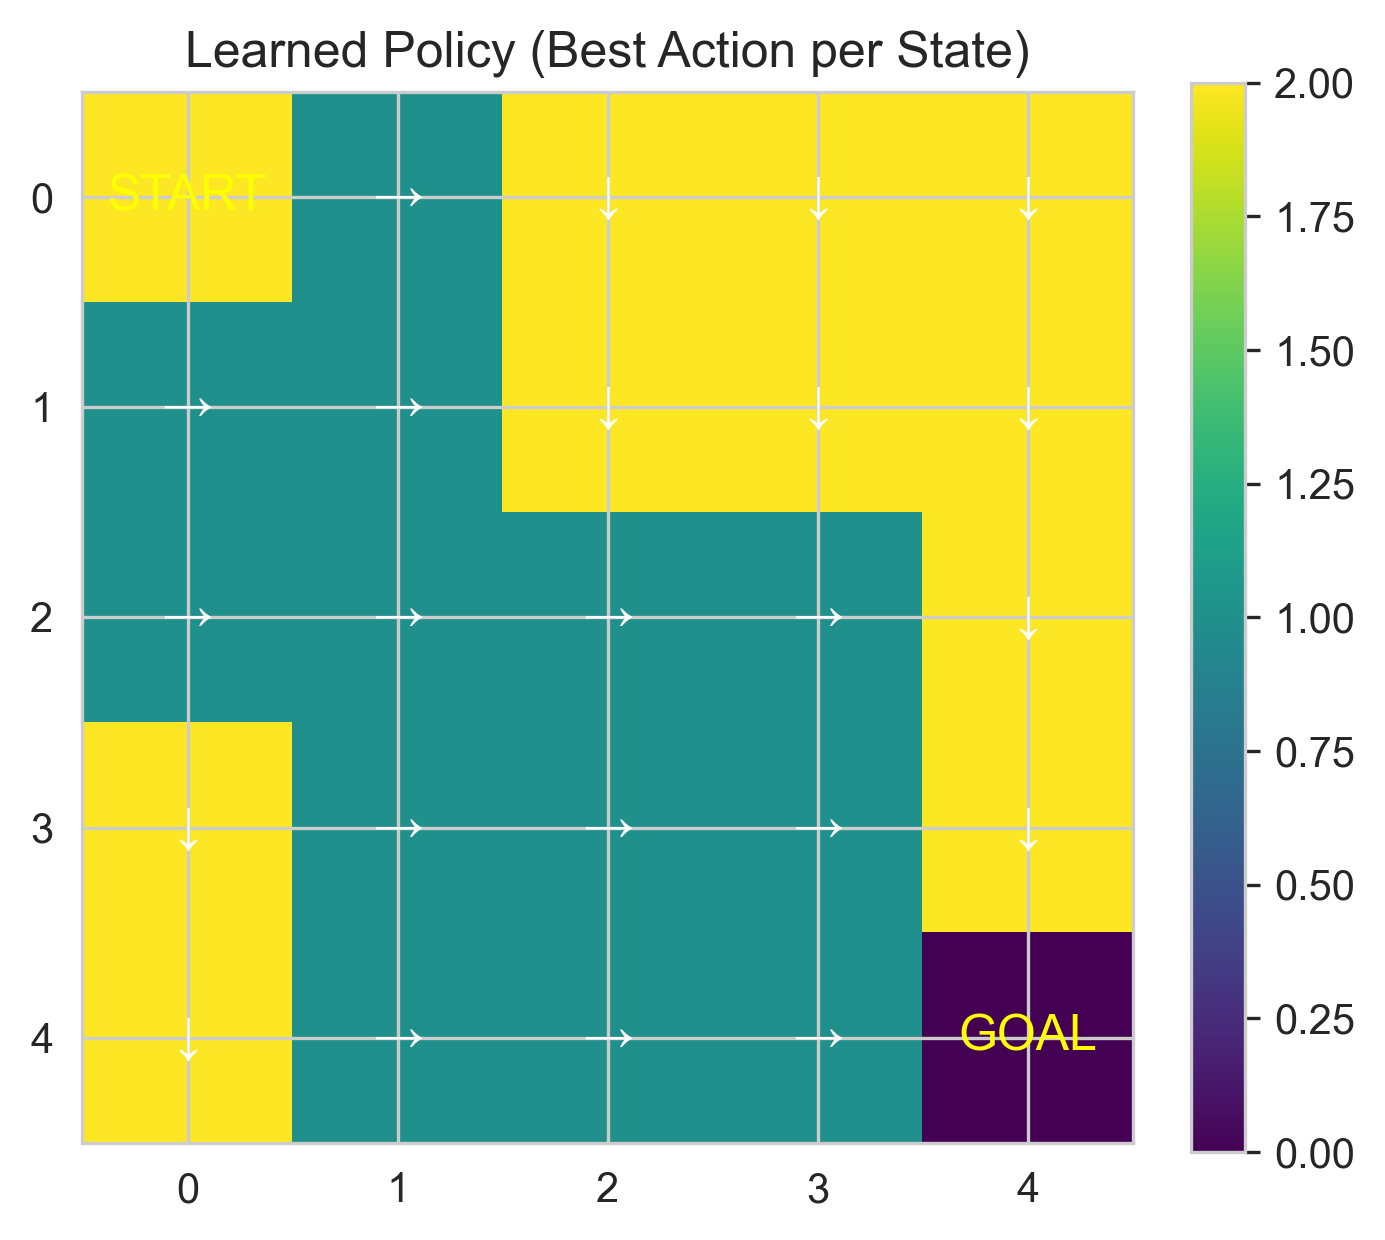

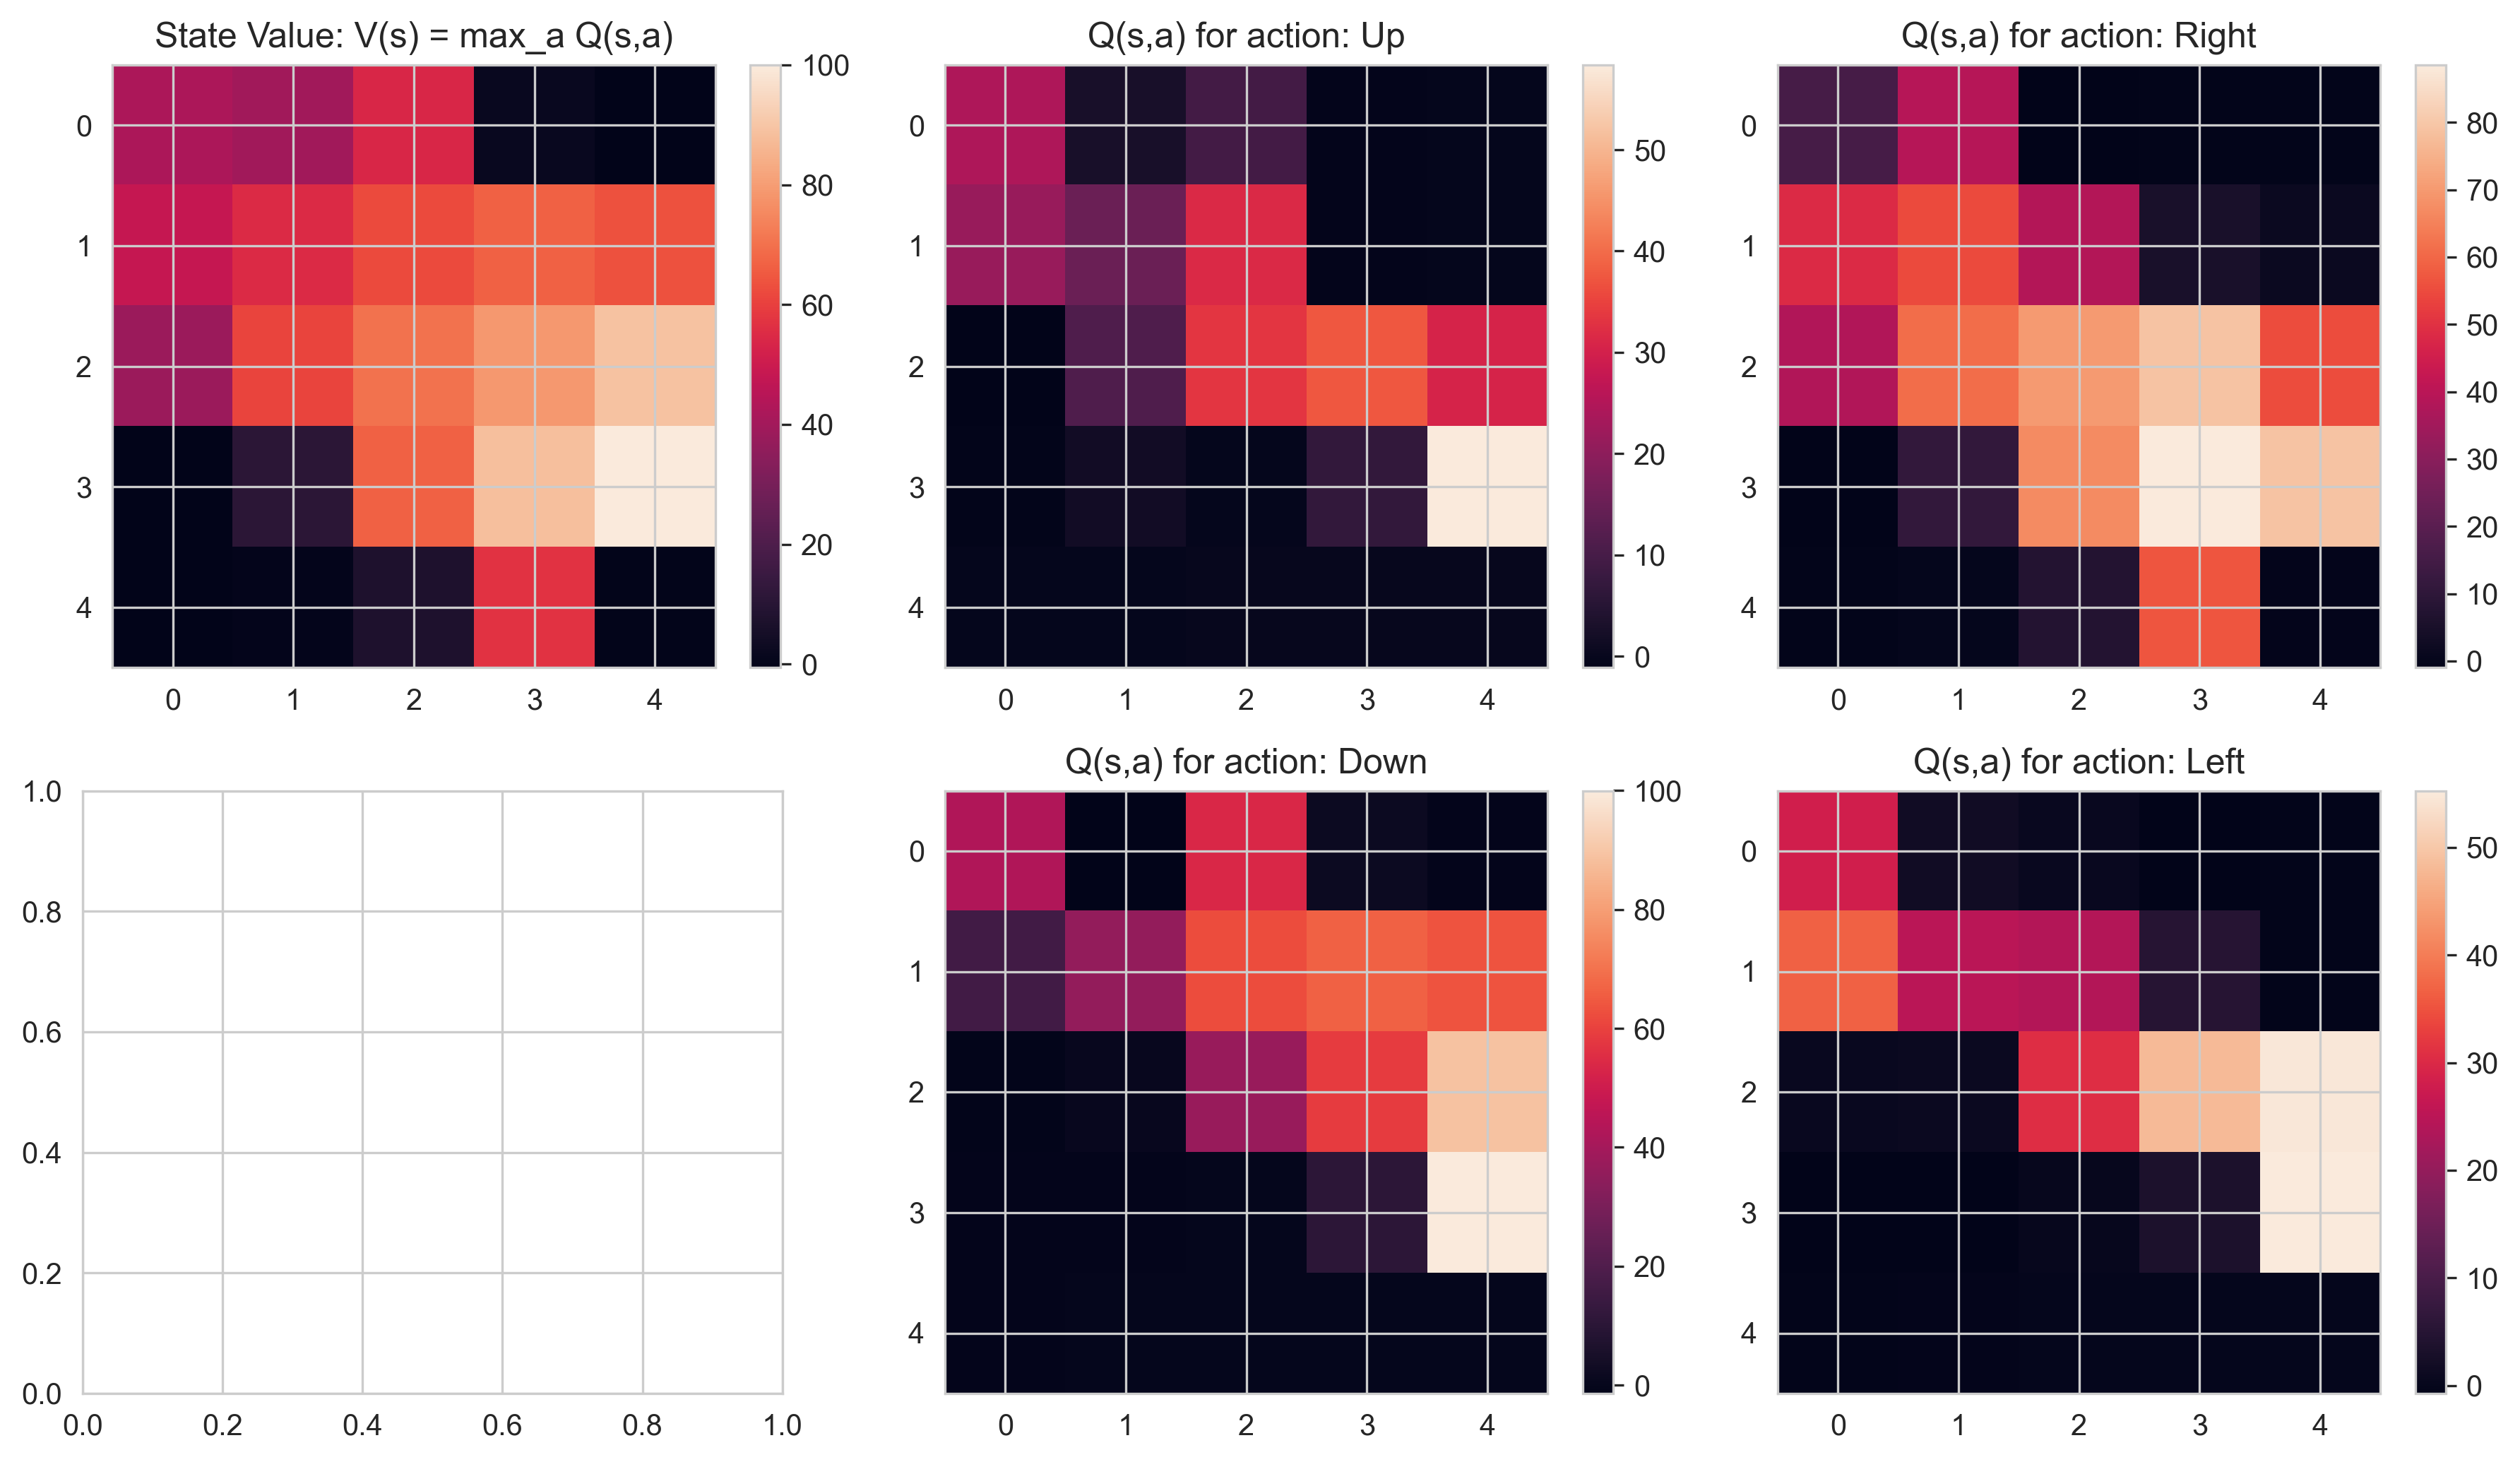

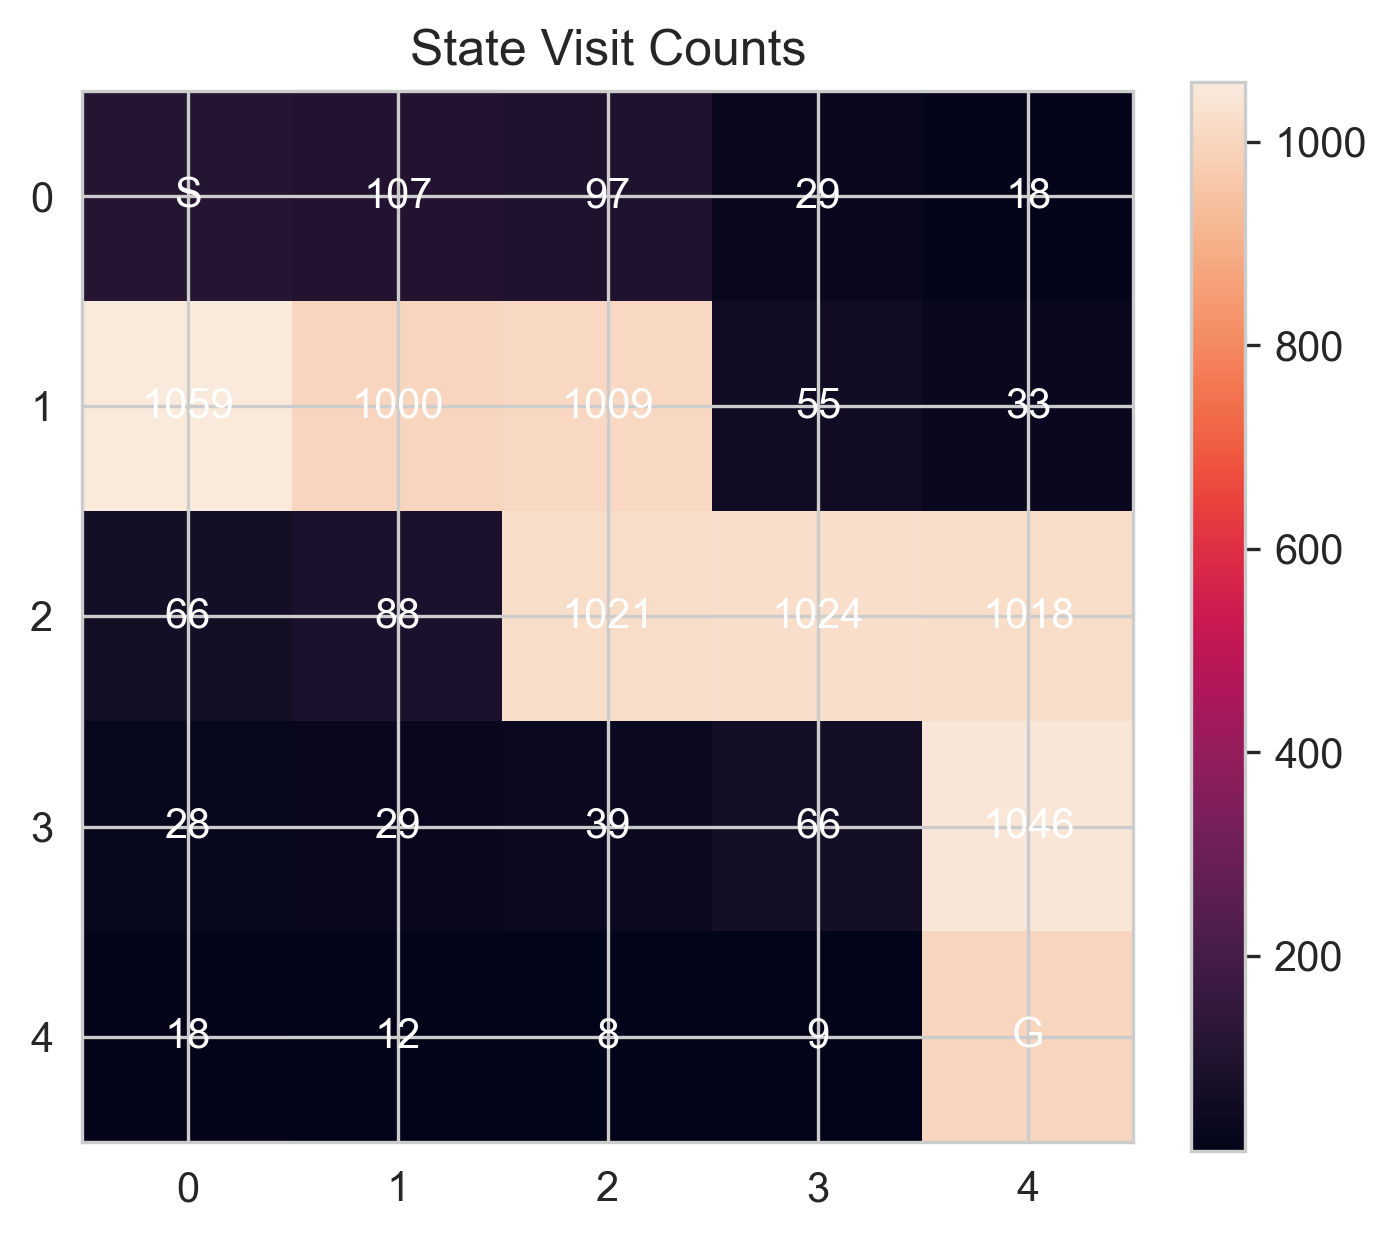

In [11]:
# Visualise learning signals and learned knowledge
plot_learning_curves(rewards, steps, epsilons, td_errors, window=50)
plot_policy(q_table, env.start, env.goal)
plot_value_and_q(q_table)
plot_state_visits(visits, env.start, env.goal)


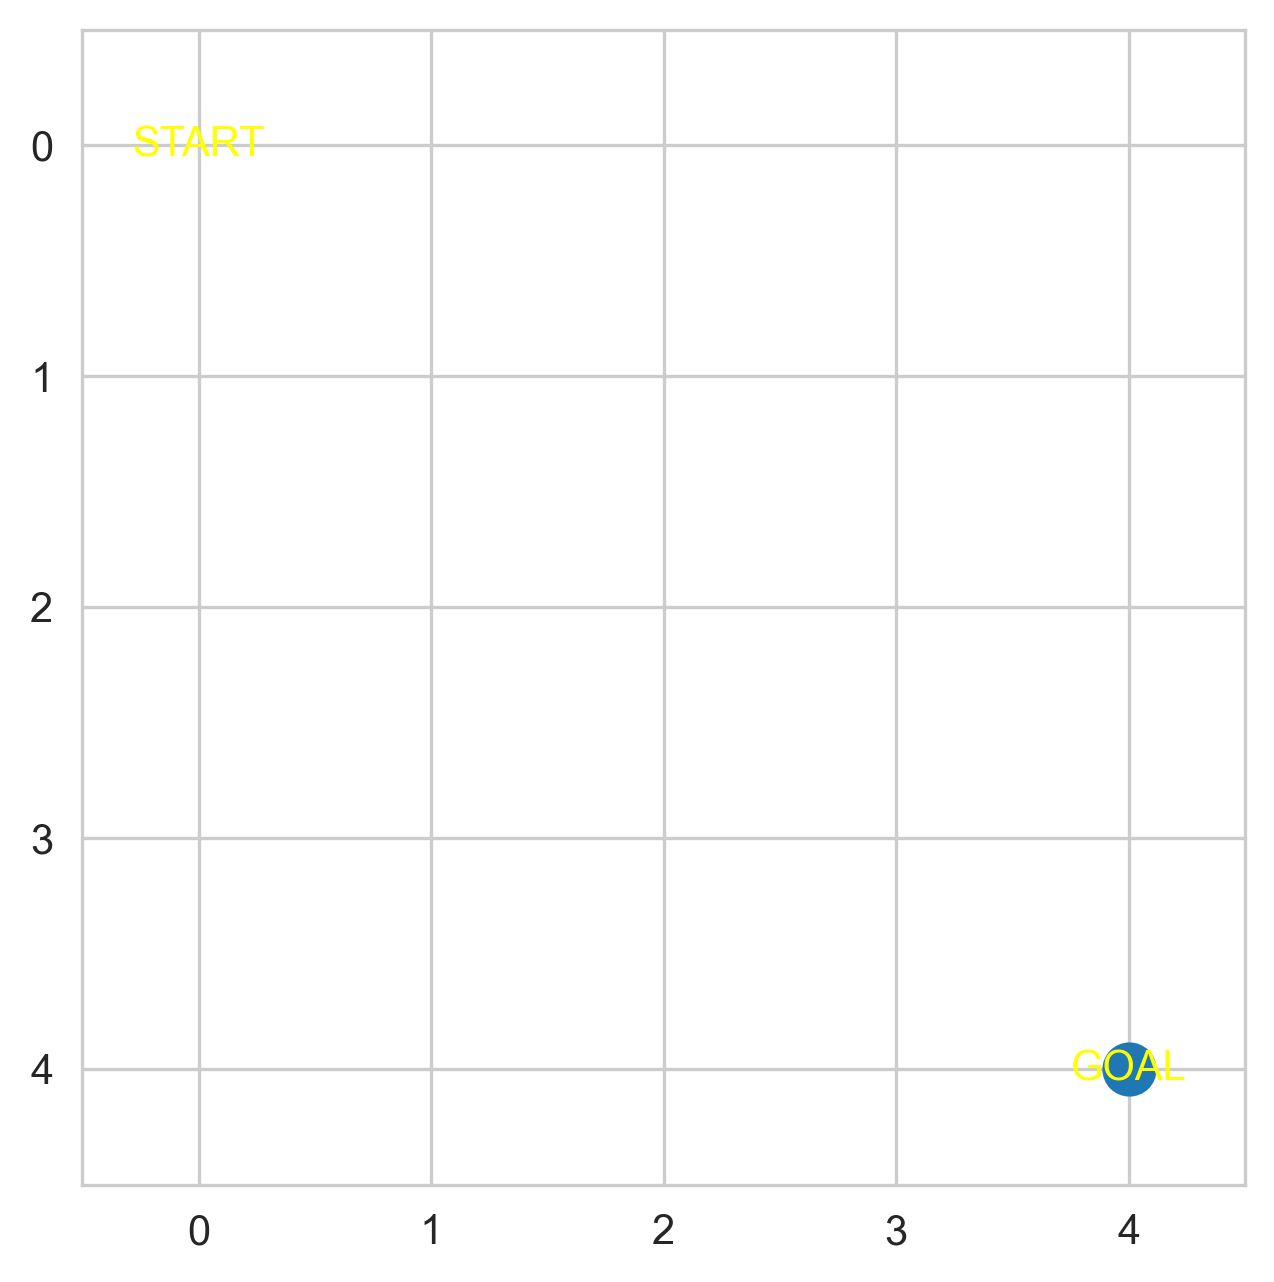

In [12]:
# Cell 8: Animate one saved trajectory (show inline)
from IPython.display import HTML, display

if paths:
    ep_to_show = max(paths)  # choose an episode
    fig, ani = animate_episode(env, paths[ep_to_show], interval=300)
    display(HTML(ani.to_jshtml()))   # or: display(HTML(ani.to_html5_video()))
else:
    print("No saved trajectories. Set log_trajectories=True in q_learning().")


# Core ML Concepts

## 1. Features and Labels with Wine Classification (random forest classifier)

In [15]:
# Load wine dataset
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target
feature_names = wine_data.feature_names
target_names = wine_data.target_names

print("Wine Classification Dataset:")
print(f"Number of samples: {X_wine.shape[0]}")
print(f"Number of features: {X_wine.shape[1]}")
print(f"\nFeatures (first 5): {feature_names[:5]}")
print(f"Target classes: {target_names}")

# Create DataFrame for better visualization
wine_df = pd.DataFrame(X_wine, columns=feature_names)
wine_df['Wine_Type'] = [target_names[i] for i in y_wine]

print("\nFeatures vs Labels Example:")
print(wine_df[['alcohol', 'color_intensity', 'flavanoids', 'Wine_Type']].head())

Wine Classification Dataset:
Number of samples: 178
Number of features: 13

Features (first 5): ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']
Target classes: ['class_0' 'class_1' 'class_2']

Features vs Labels Example:
   alcohol  color_intensity  flavanoids Wine_Type
0    14.23             5.64        3.06   class_0
1    13.20             4.38        2.76   class_0
2    13.16             5.68        3.24   class_0
3    14.37             7.80        3.49   class_0
4    13.24             4.32        2.69   class_0


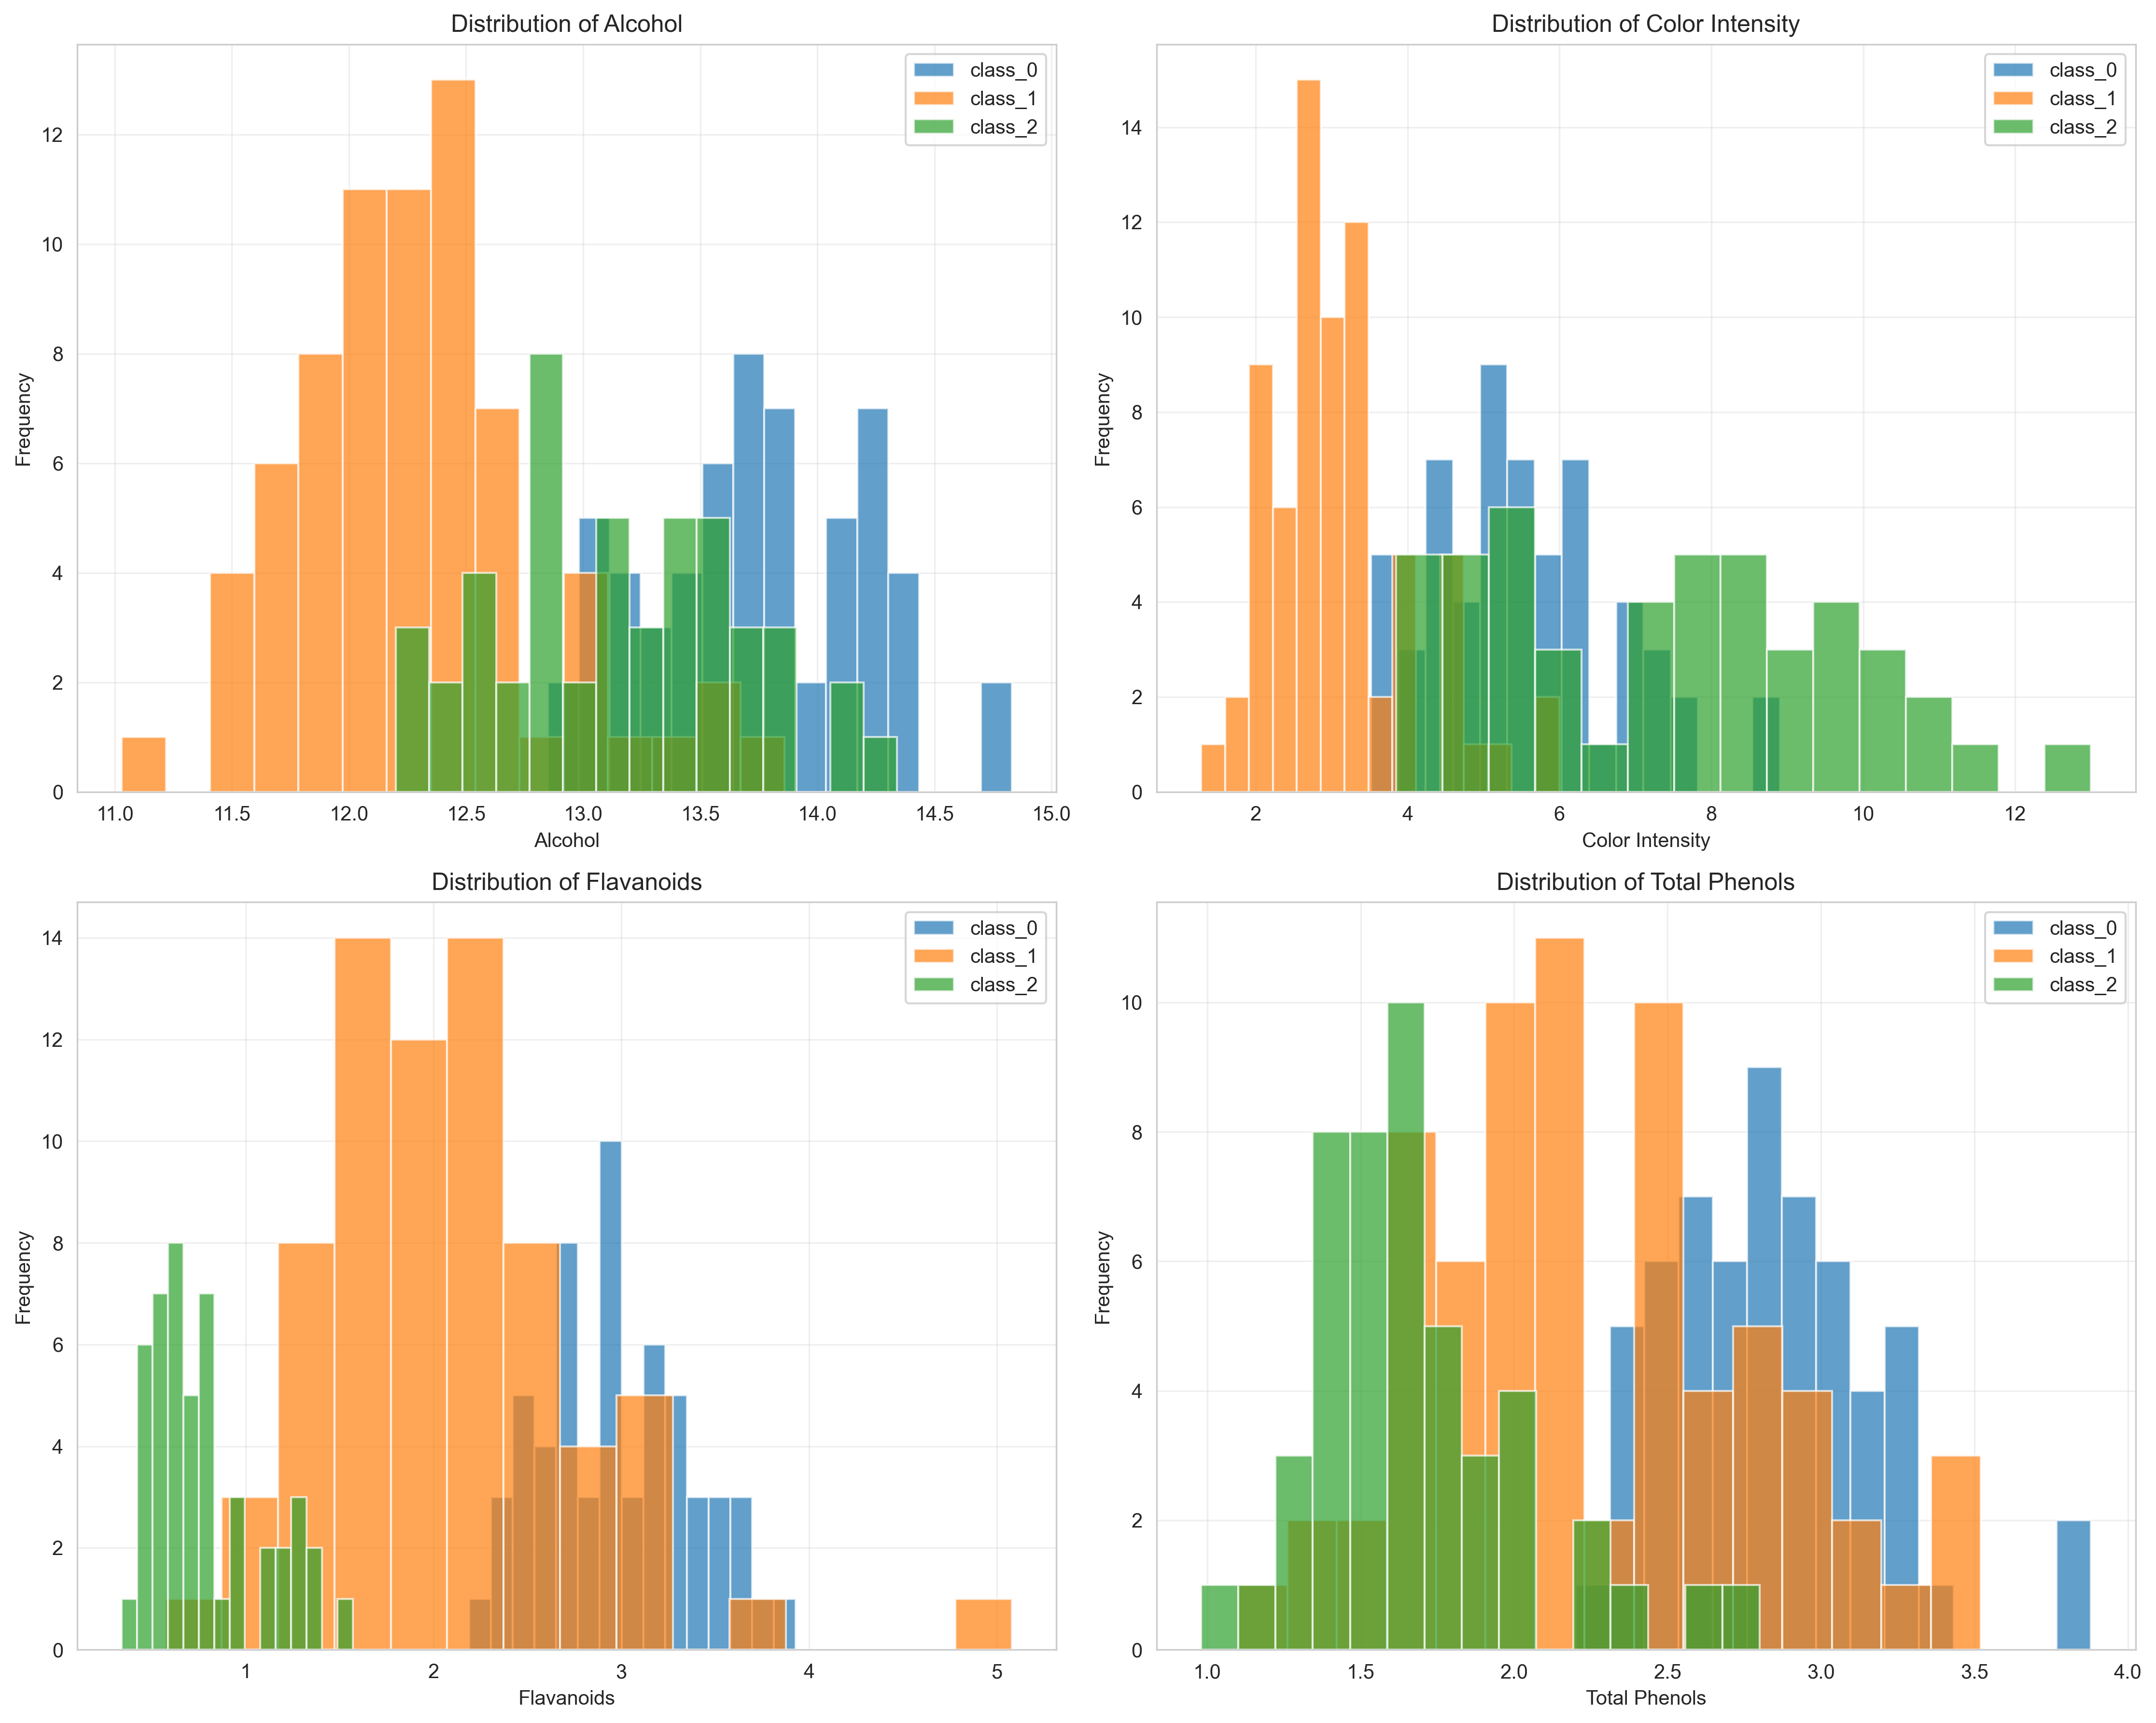

Features: Input variables used to make predictions
Labels: Target variables we want to predict
Different wine types show different feature patterns!


In [16]:
# Visualize features vs labels
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Feature distributions by wine type
features_to_plot = ['alcohol', 'color_intensity', 'flavanoids', 'total_phenols']

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx//2, idx%2]
    
    for i, wine_type in enumerate(target_names):
        data = wine_df[wine_df['Wine_Type'] == wine_type][feature]
        ax.hist(data, alpha=0.7, label=wine_type, bins=15)
    
    ax.set_xlabel(feature.replace('_', ' ').title())
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature.replace("_", " ").title()}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Features: Input variables used to make predictions")
print("Labels: Target variables we want to predict")
print("Different wine types show different feature patterns!")

### Training and Testing Data

Data Split Information:
Total samples: 178
Training samples: 124 (69.7%)
Testing samples: 54 (30.3%)

Model Performance:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Difference: 0.0000


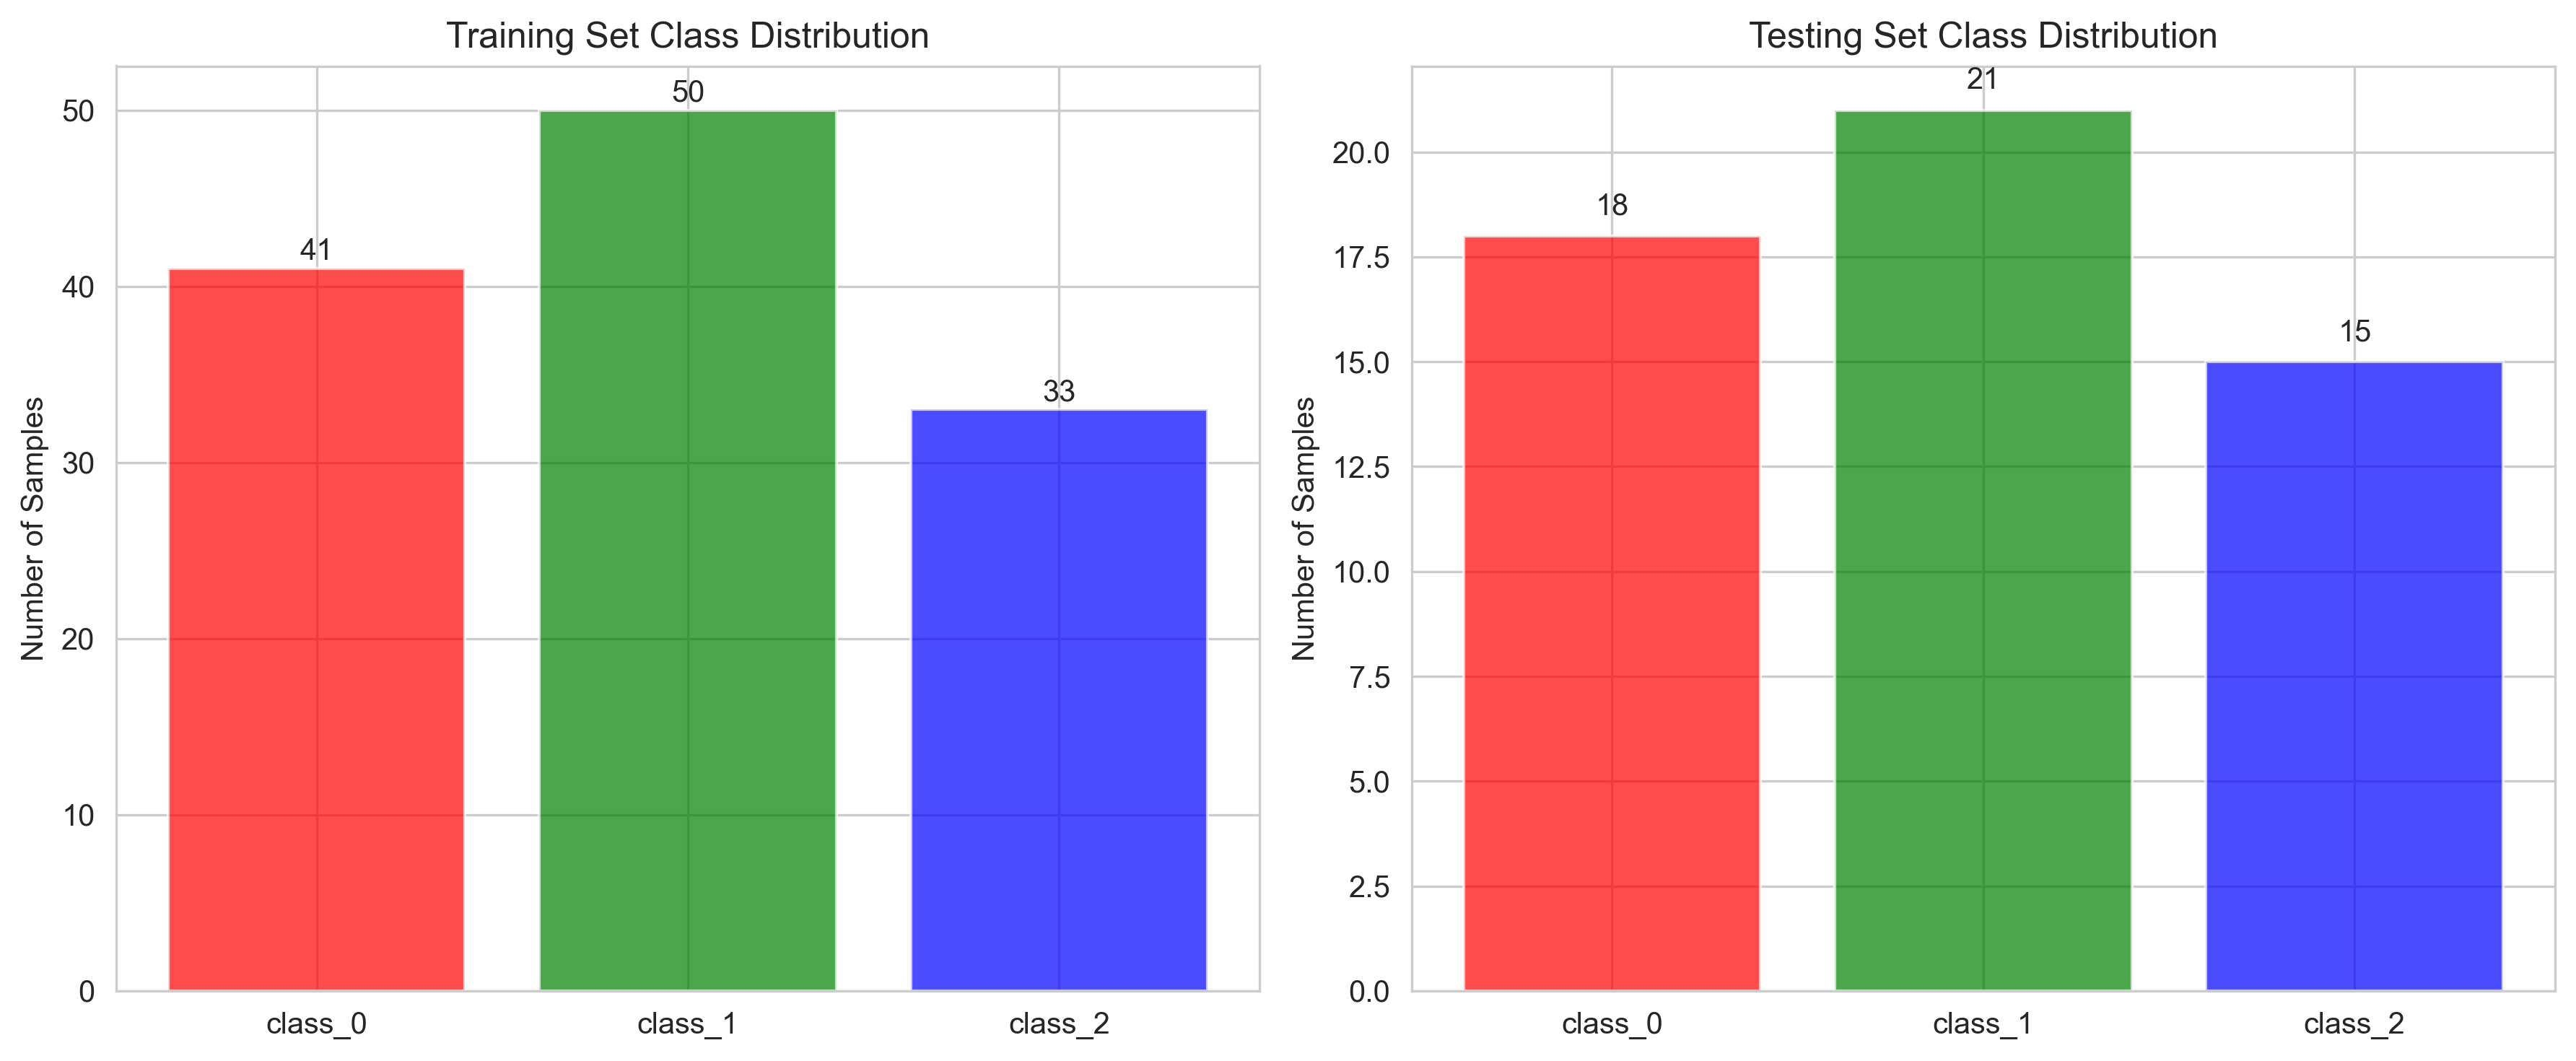


Training Data: Used to teach the model patterns
Testing Data: Used to evaluate model performance on unseen data
Stratified split ensures balanced class representation in both sets


In [17]:
# Demonstrate train/test split with wine data
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine
)

print("Data Split Information:")
print(f"Total samples: {len(X_wine)}")
print(f"Training samples: {len(X_train_wine)} ({len(X_train_wine)/len(X_wine)*100:.1f}%)")
print(f"Testing samples: {len(X_test_wine)} ({len(X_test_wine)/len(X_wine)*100:.1f}%)")

# Train model and evaluate
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_wine, y_train_wine)

# Make predictions
train_score = rf_model.score(X_train_wine, y_train_wine)
test_score = rf_model.score(X_test_wine, y_test_wine)

print(f"\nModel Performance:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")
print(f"Difference: {train_score - test_score:.4f}")

# Visualize class distribution in train/test sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training set distribution
train_counts = np.bincount(y_train_wine)
ax1.bar(target_names, train_counts, color=['red', 'green', 'blue'], alpha=0.7)
ax1.set_title('Training Set Class Distribution')
ax1.set_ylabel('Number of Samples')
for i, count in enumerate(train_counts):
    ax1.text(i, count + 0.5, str(count), ha='center')

# Testing set distribution
test_counts = np.bincount(y_test_wine)
ax2.bar(target_names, test_counts, color=['red', 'green', 'blue'], alpha=0.7)
ax2.set_title('Testing Set Class Distribution')
ax2.set_ylabel('Number of Samples')
for i, count in enumerate(test_counts):
    ax2.text(i, count + 0.5, str(count), ha='center')

plt.tight_layout()
plt.show()

print("\nTraining Data: Used to teach the model patterns")
print("Testing Data: Used to evaluate model performance on unseen data")
print("Stratified split ensures balanced class representation in both sets")

## 2. Complete ML Pipeline with Housing Data

In [18]:
# Demonstrate complete ML pipeline with housing data
print("Complete ML Pipeline Steps:")
print("="*50)

# Step 1: Data Loading
print("1. Data Loading")
housing = fetch_california_housing()
X, y = housing.data, housing.target
print(f"   Loaded {X.shape[0]} samples with {X.shape[1]} features")

# Step 2: Data Exploration
print("\n2. Data Exploration")
housing_df = pd.DataFrame(X, columns=housing.feature_names)
housing_df['Price'] = y
print(f"   Price range: ${y.min():.2f} - ${y.max():.2f} (hundreds of thousands)")
print(f"   Missing values: {housing_df.isnull().sum().sum()}")

# Step 3: Data Splitting
print("\n3. Data Splitting")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"   Training: {X_train.shape[0]} samples")
print(f"   Testing: {X_test.shape[0]} samples")

# Step 4: Feature Scaling
print("\n4. Feature Scaling")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"   Features scaled to mean=0, std=1")

# Step 5: Model Selection
print("\n5. Model Selection")
models = {
    'Linear Regression': LinearRegression()
}
print(f"   Selected Linear Regression model")

# Step 6: Model Training
print("\n6. Model Training")
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)
print(f"   Linear Regression: Trained")

# Step 7: Model Evaluation
print("\n7. Model Evaluation")
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"   MSE: {mse:.4f}")
print(f"   R²: {r2:.4f}")

# Step 8: Model Deployment (Prediction)
print("\n8. Model Deployment")
sample_house = X_test_scaled[0].reshape(1, -1)
prediction = best_model.predict(sample_house)[0]
actual = y_test[0]
print(f"   Sample prediction: ${prediction:.2f}00,000")
print(f"   Actual price: ${actual:.2f}00,000")
print(f"   Error: ${abs(prediction-actual):.2f}00,000")

# Step 9: Model Monitoring
print("\n9. Model Monitoring")
residuals = y_test - y_pred
mean_error = np.mean(np.abs(residuals))
print(f"   Mean absolute error: ${mean_error:.2f}00,000")
print(f"   Model ready for production use")

print("\n" + "="*50)
print("ML Pipeline Complete!")

Complete ML Pipeline Steps:
1. Data Loading
   Loaded 20640 samples with 8 features

2. Data Exploration
   Price range: $0.15 - $5.00 (hundreds of thousands)
   Missing values: 0

3. Data Splitting
   Training: 16512 samples
   Testing: 4128 samples

4. Feature Scaling
   Features scaled to mean=0, std=1

5. Model Selection
   Selected Linear Regression model

6. Model Training
   Linear Regression: Trained

7. Model Evaluation
   MSE: 0.5559
   R²: 0.5758

8. Model Deployment
   Sample prediction: $0.7200,000
   Actual price: $0.4800,000
   Error: $0.2400,000

9. Model Monitoring
   Mean absolute error: $0.5300,000
   Model ready for production use

ML Pipeline Complete!


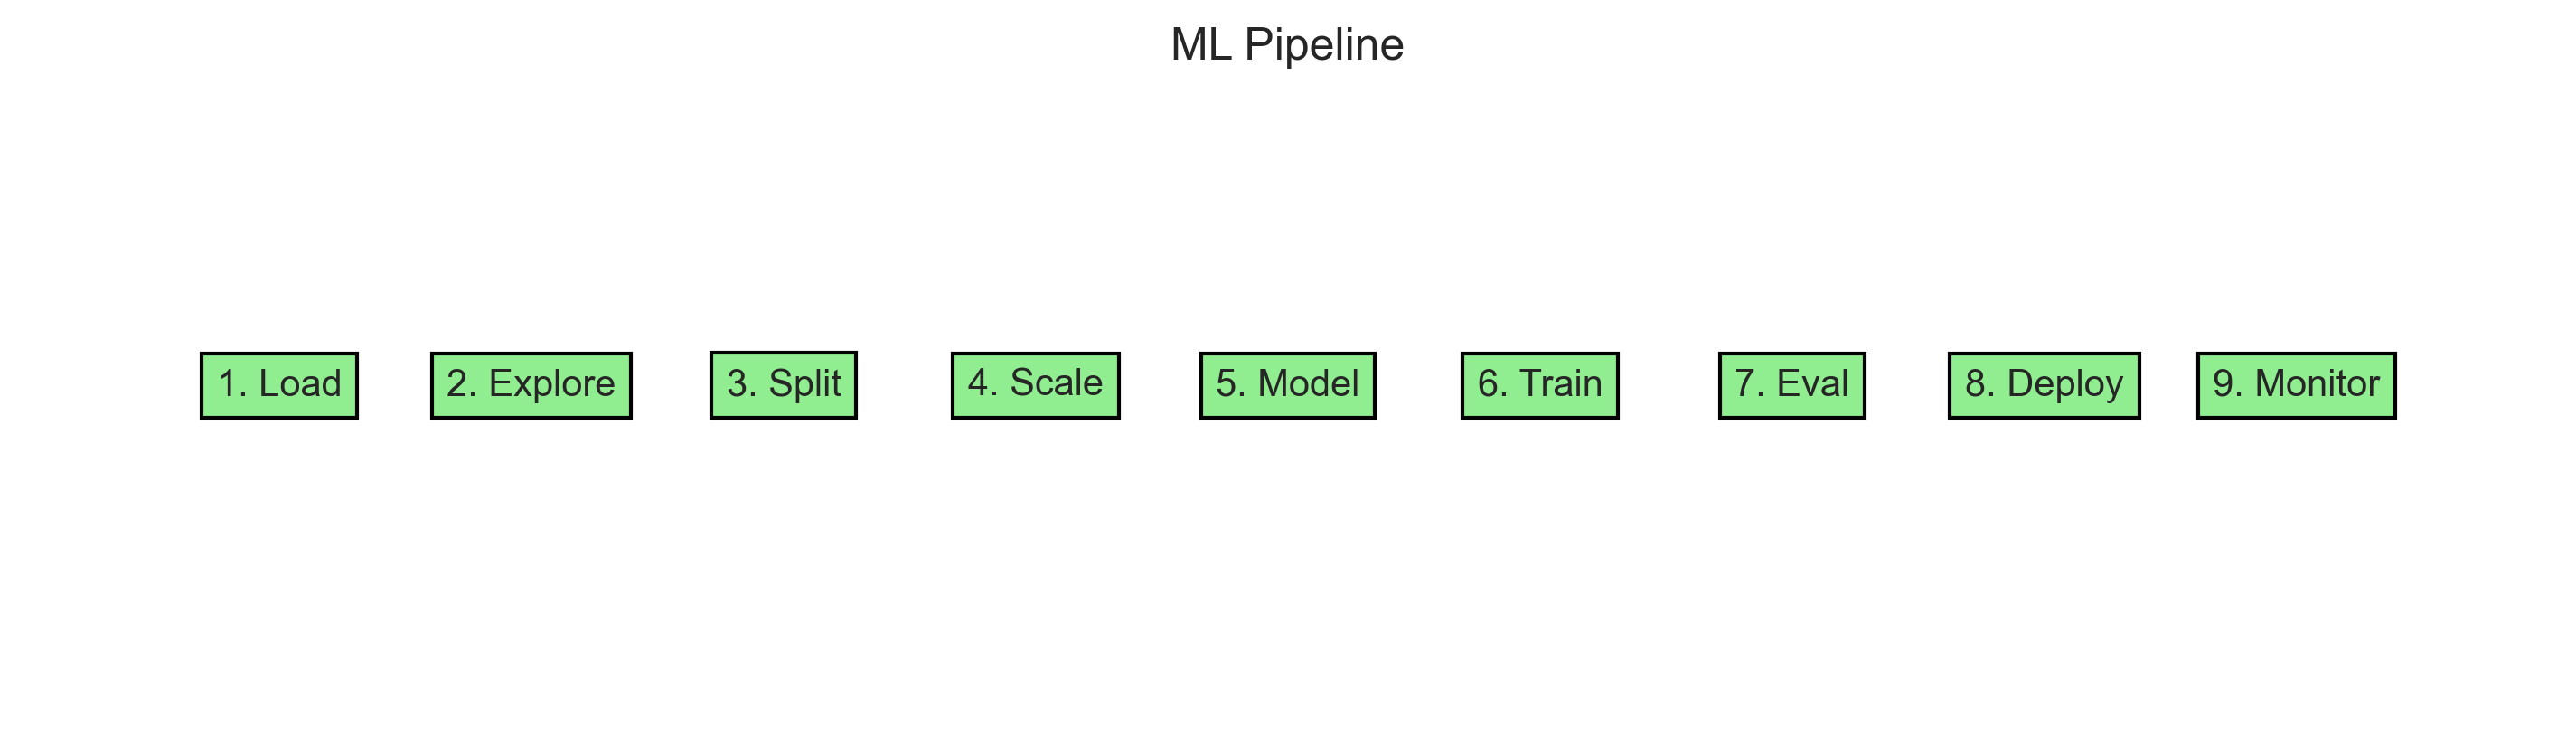

In [19]:
fig, ax = plt.subplots(figsize=(12, 3))
steps = ['1. Load', '2. Explore', '3. Split', '4. Scale', '5. Model', '6. Train', '7. Eval', '8. Deploy', '9. Monitor']
positions = [0.1 + i*0.1 for i in range(len(steps))]
for i, step in enumerate(steps):
    ax.text(positions[i], 0.5, step, bbox=dict(facecolor='lightgreen', edgecolor='black'), ha='center')
for i in range(len(steps)-1):
    ax.add_patch(FancyArrowPatch((positions[i]+0.05, 0.5), (positions[i+1]-0.05, 0.5), arrowstyle='->', mutation_scale=20))
ax.axis('off')
plt.title('ML Pipeline')
plt.show()

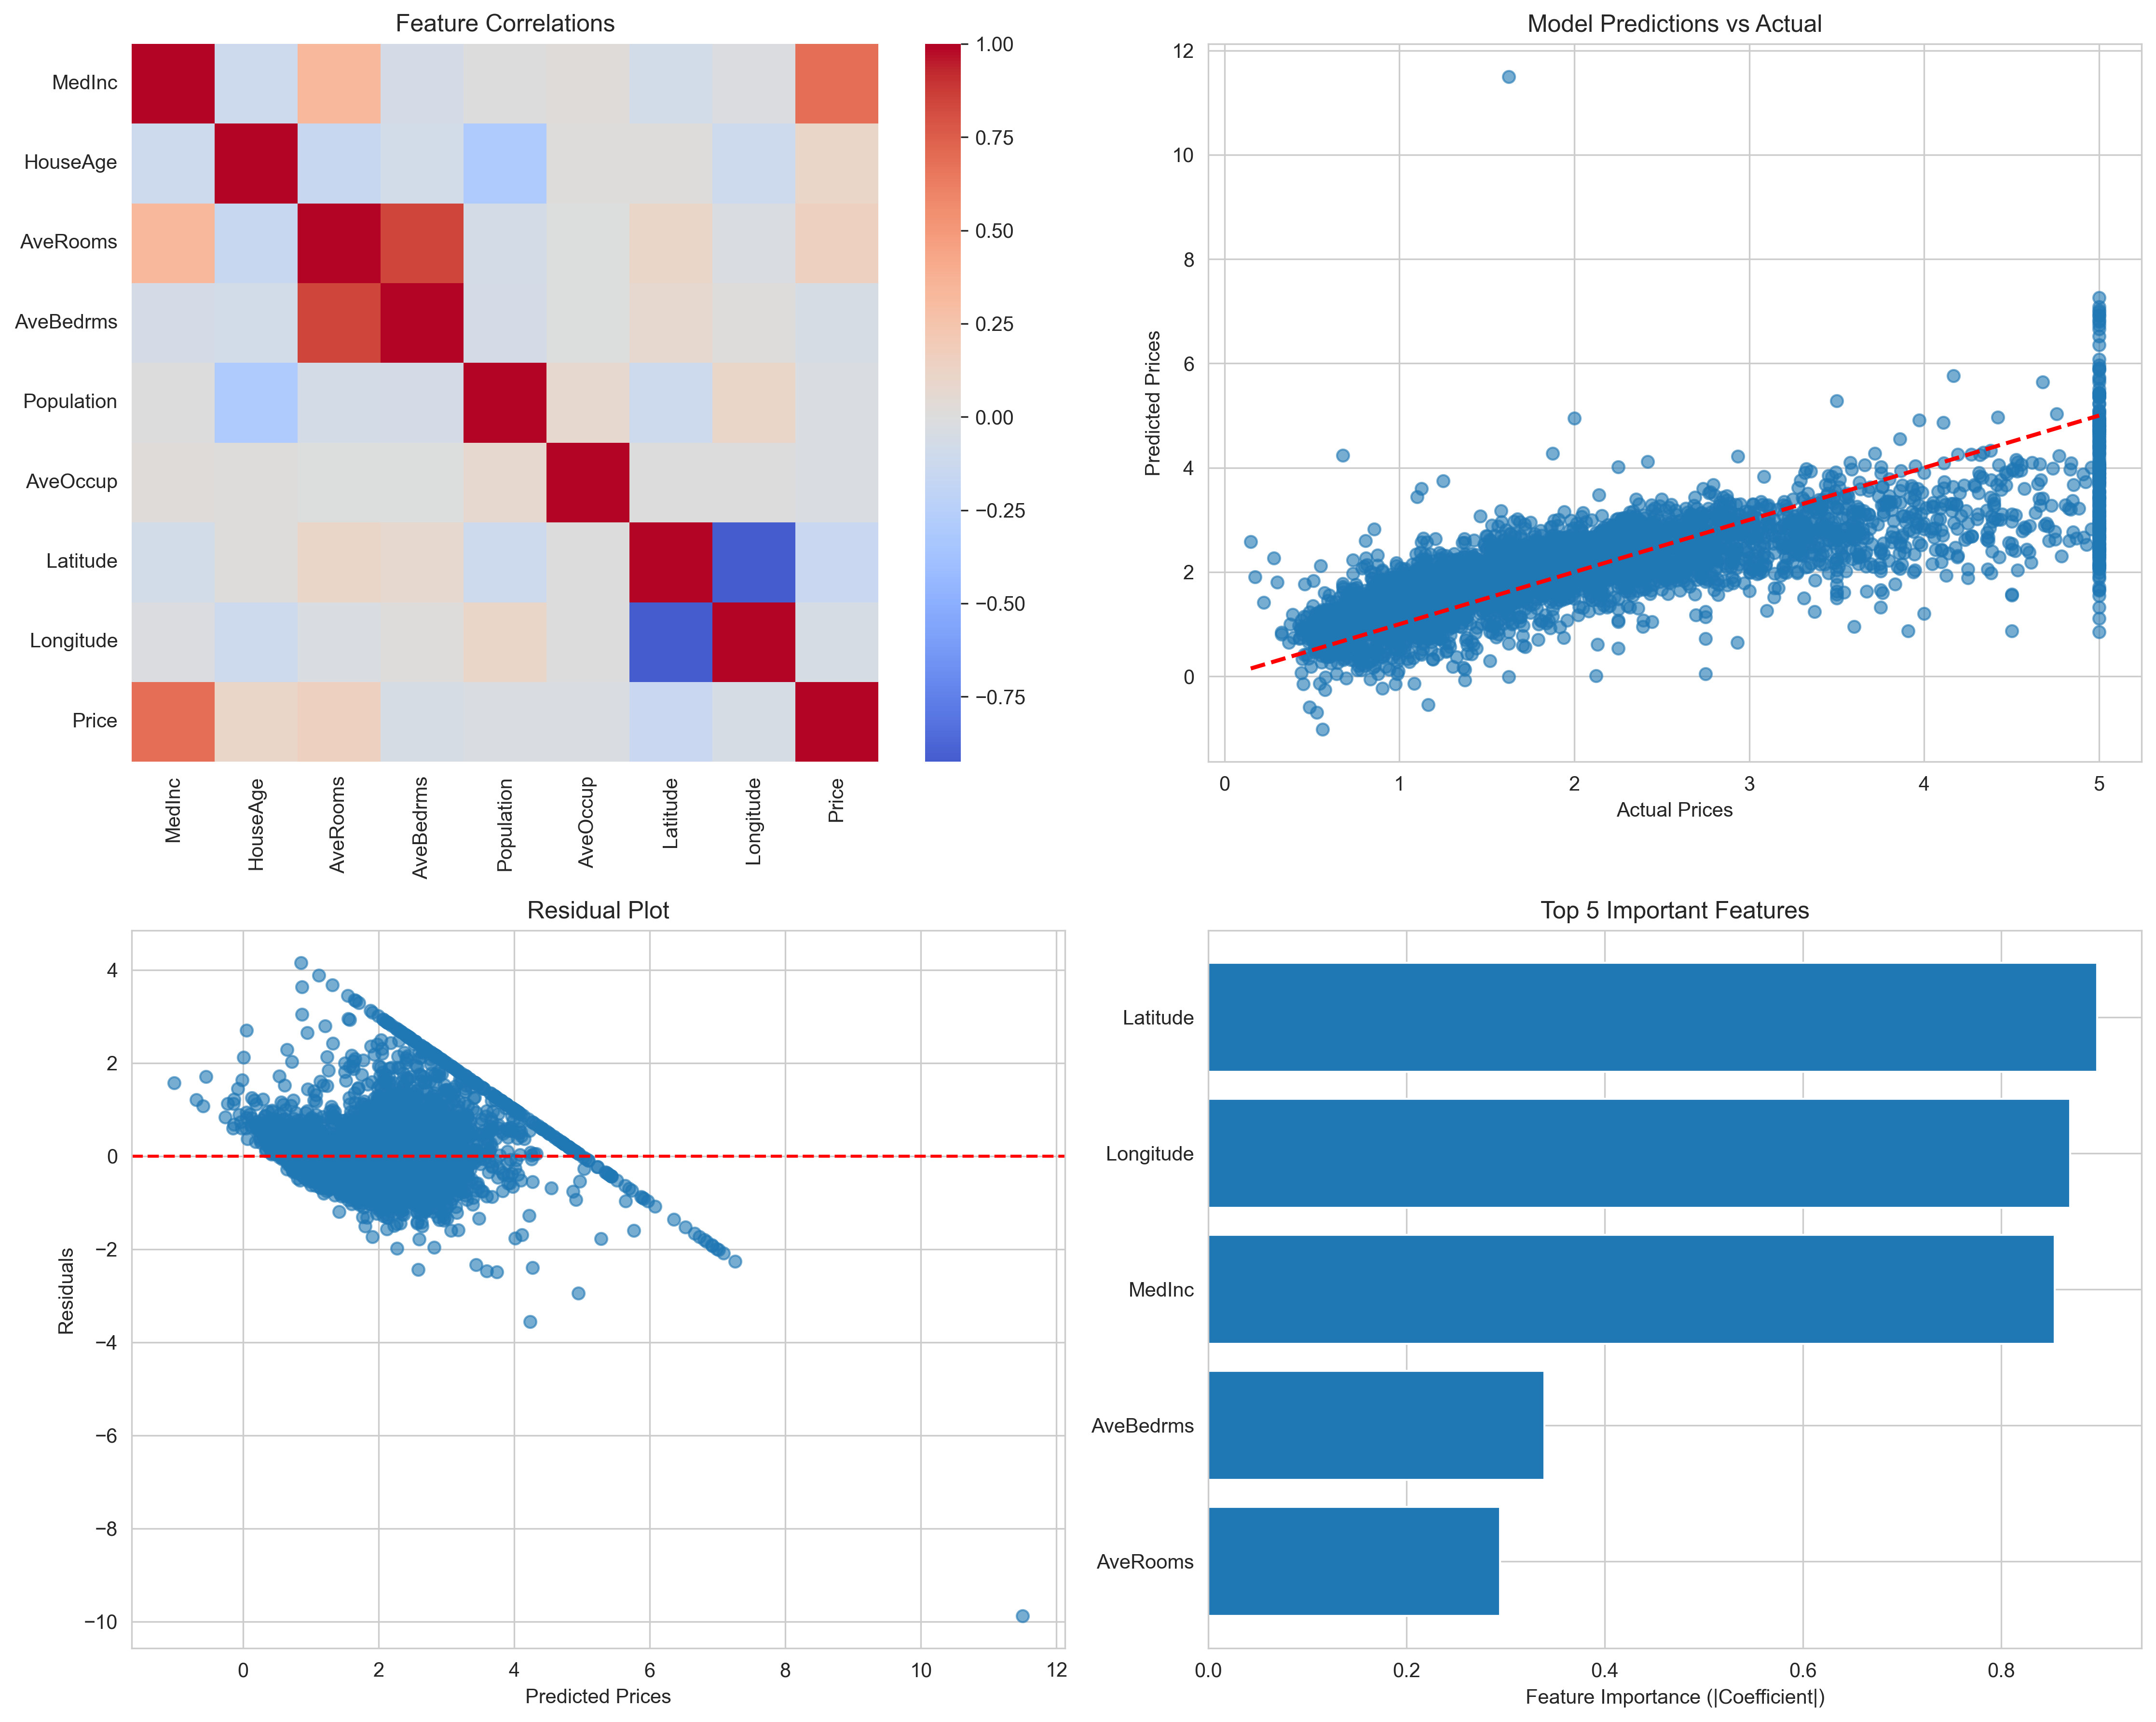

The ML pipeline provides a systematic approach to solve problems!


In [20]:
# Visualize the ML pipeline results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Feature correlations
ax1 = axes[0, 0]
correlation_matrix = housing_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, ax=ax1)
ax1.set_title('Feature Correlations')

# 2. Actual vs Predicted
ax2 = axes[0, 1]
ax2.scatter(y_test, y_pred, alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Prices')
ax2.set_ylabel('Predicted Prices')
ax2.set_title('Model Predictions vs Actual')

# 3. Residuals plot
ax3 = axes[1, 0]
residuals = y_test - y_pred
ax3.scatter(y_pred, residuals, alpha=0.6)
ax3.axhline(y=0, color='r', linestyle='--')
ax3.set_xlabel('Predicted Prices')
ax3.set_ylabel('Residuals')
ax3.set_title('Residual Plot')

# 4. Feature importance (simplified)
ax4 = axes[1, 1]
feature_importance = np.abs(best_model.coef_)
feature_names = housing.feature_names
sorted_idx = np.argsort(feature_importance)[-5:]  # Top 5 features

ax4.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
ax4.set_yticks(range(len(sorted_idx)))
ax4.set_yticklabels([feature_names[i] for i in sorted_idx])
ax4.set_xlabel('Feature Importance (|Coefficient|)')
ax4.set_title('Top 5 Important Features')

plt.tight_layout()
plt.show()

print("The ML pipeline provides a systematic approach to solve problems!")

## 3. Underfitting, Good fit, and Overfitting

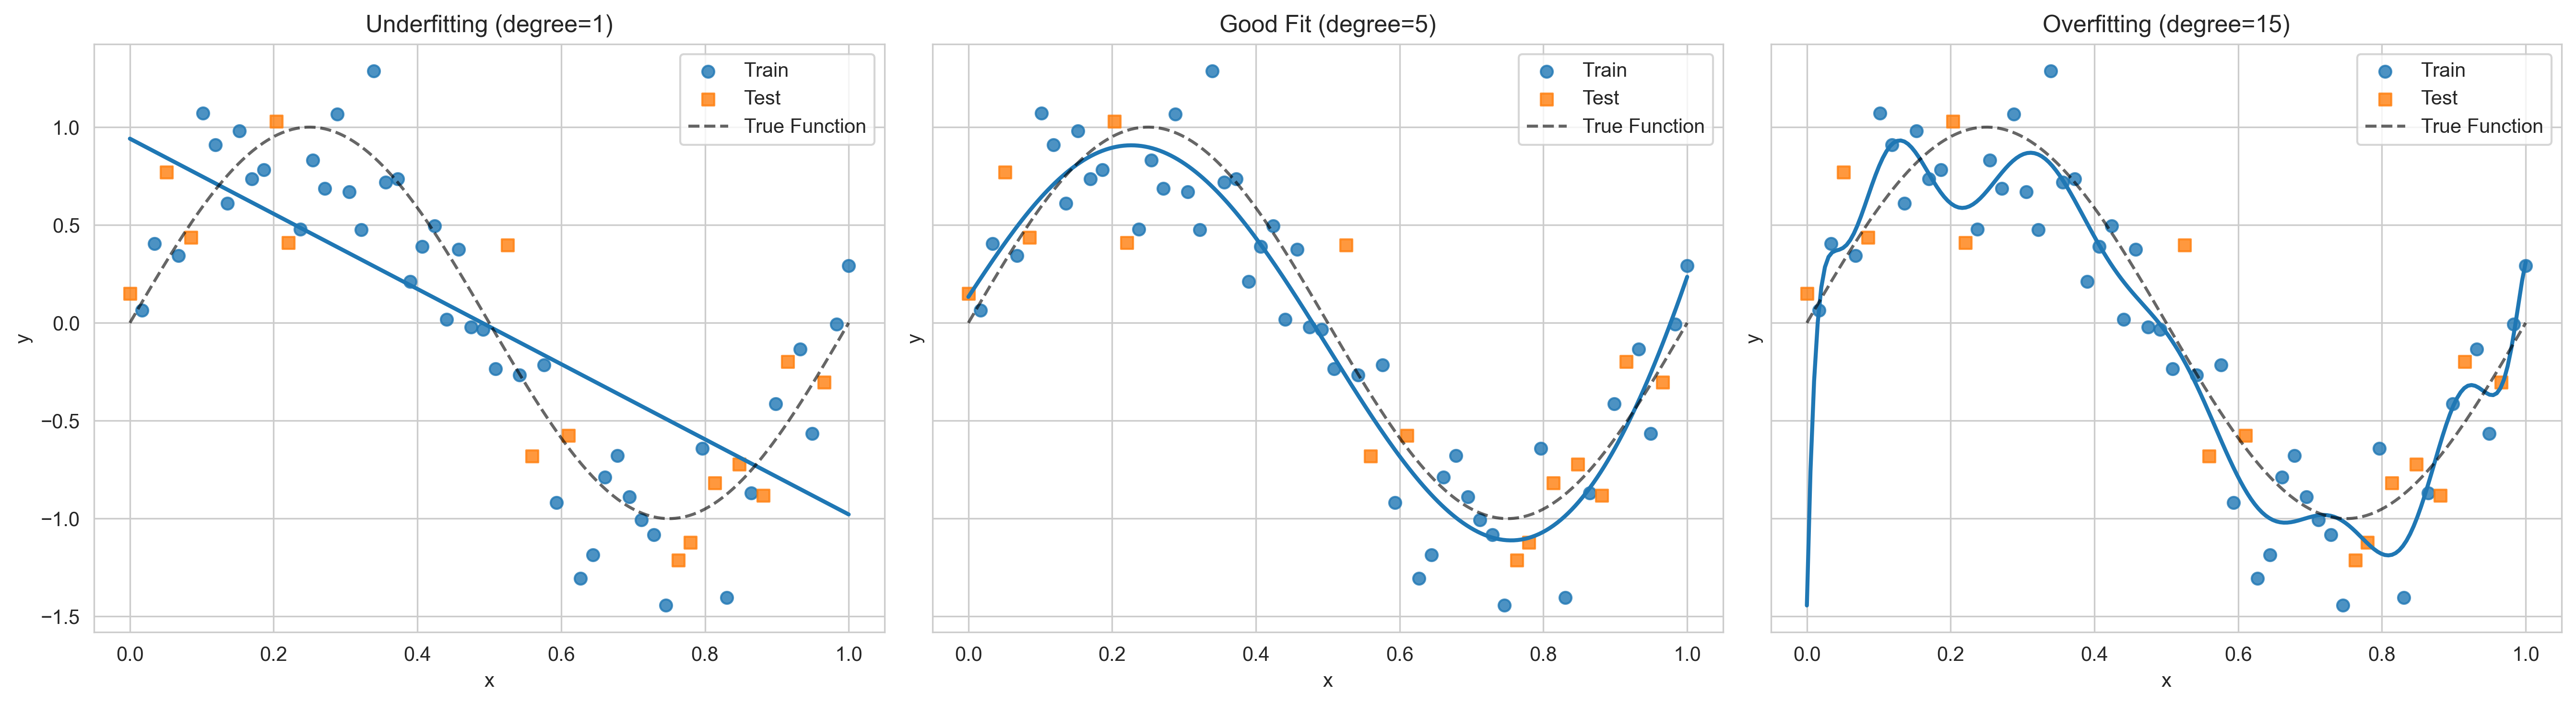

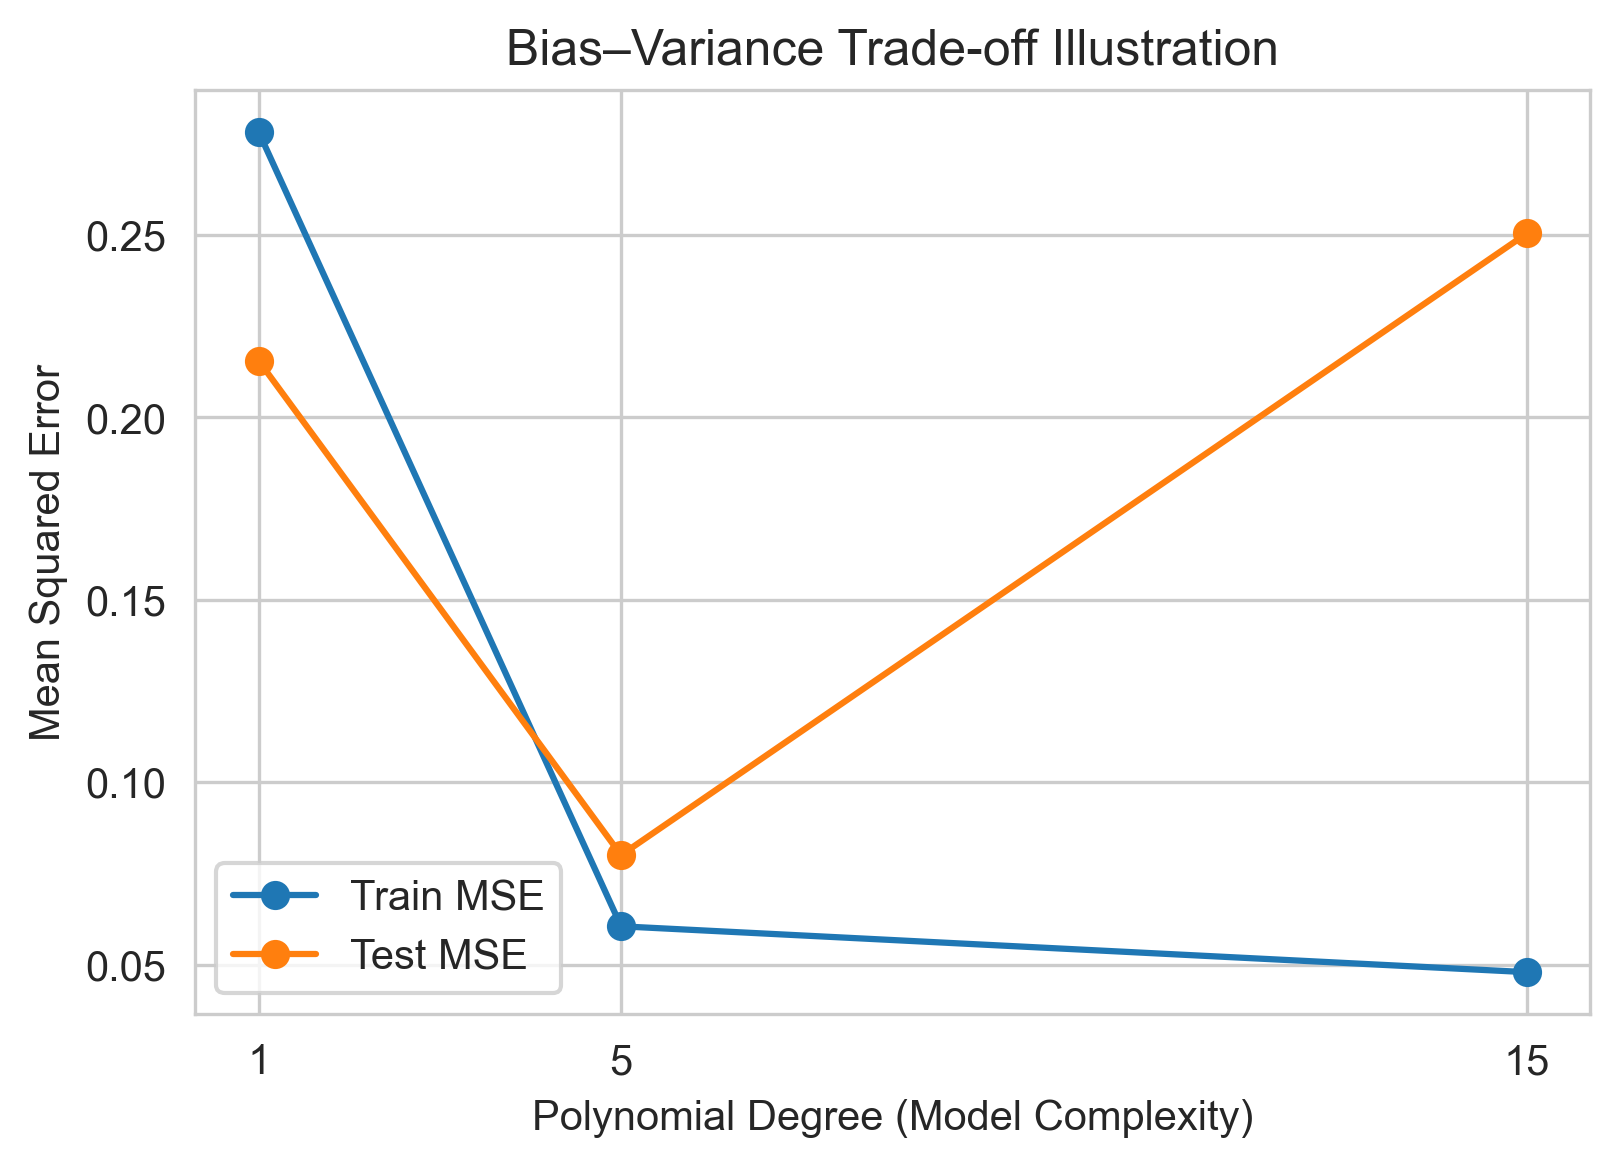

Train MSEs : {1: 0.278, 5: 0.06, 15: 0.048}
Test  MSEs : {1: 0.215, 5: 0.08, 15: 0.25}


In [21]:
# 1) Make a synthetic dataset (noisy sine curve)
np.random.seed(42)
X = np.linspace(0, 1, 60).reshape(-1, 1)
y_true_func = lambda x: np.sin(2 * np.pi * x)  # ground-truth function
y = y_true_func(X).ravel() + np.random.normal(scale=0.3, size=X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2) Define model complexities
degrees = [1, 5, 15]  # underfit, good fit, overfit (typical examples)

# Storage for error curves
train_errors, test_errors = [], []

# 3) Fit models and plot predictions
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

x_plot = np.linspace(0, 1, 200).reshape(-1, 1)

titles = ["Underfitting (degree=1)", "Good Fit (degree=5)", "Overfitting (degree=15)"]

for ax, d, title in zip(axes, degrees, titles):
    model = Pipeline([
        ("poly", PolynomialFeatures(d, include_bias=False)),
        ("linreg", LinearRegression())
    ])
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    y_plot       = model.predict(x_plot)

    # Log errors
    train_errors.append(mean_squared_error(y_train, y_pred_train))
    test_errors.append(mean_squared_error(y_test,  y_pred_test))

    # Plot
    ax.scatter(X_train, y_train, label="Train", alpha=0.8)
    ax.scatter(X_test,  y_test,  label="Test",  alpha=0.8, marker='s')
    ax.plot(x_plot, y_plot, linewidth=2)
    ax.plot(x_plot, y_true_func(x_plot), 'k--', alpha=0.6, label="True Function")
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()

plt.tight_layout()
plt.show()

# 4) Error vs. model complexity plot (bonus, helps explanation)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(degrees, train_errors, marker='o', label="Train MSE")
ax.plot(degrees, test_errors,  marker='o', label="Test MSE")
ax.set_xticks(degrees)
ax.set_xlabel("Polynomial Degree (Model Complexity)")
ax.set_ylabel("Mean Squared Error")
ax.set_title("Bias–Variance Trade-off Illustration")
ax.legend()
ax.grid(True)
plt.show()

print("Train MSEs :", dict(zip(degrees, np.round(train_errors, 3))))
print("Test  MSEs :", dict(zip(degrees, np.round(test_errors,  3))))


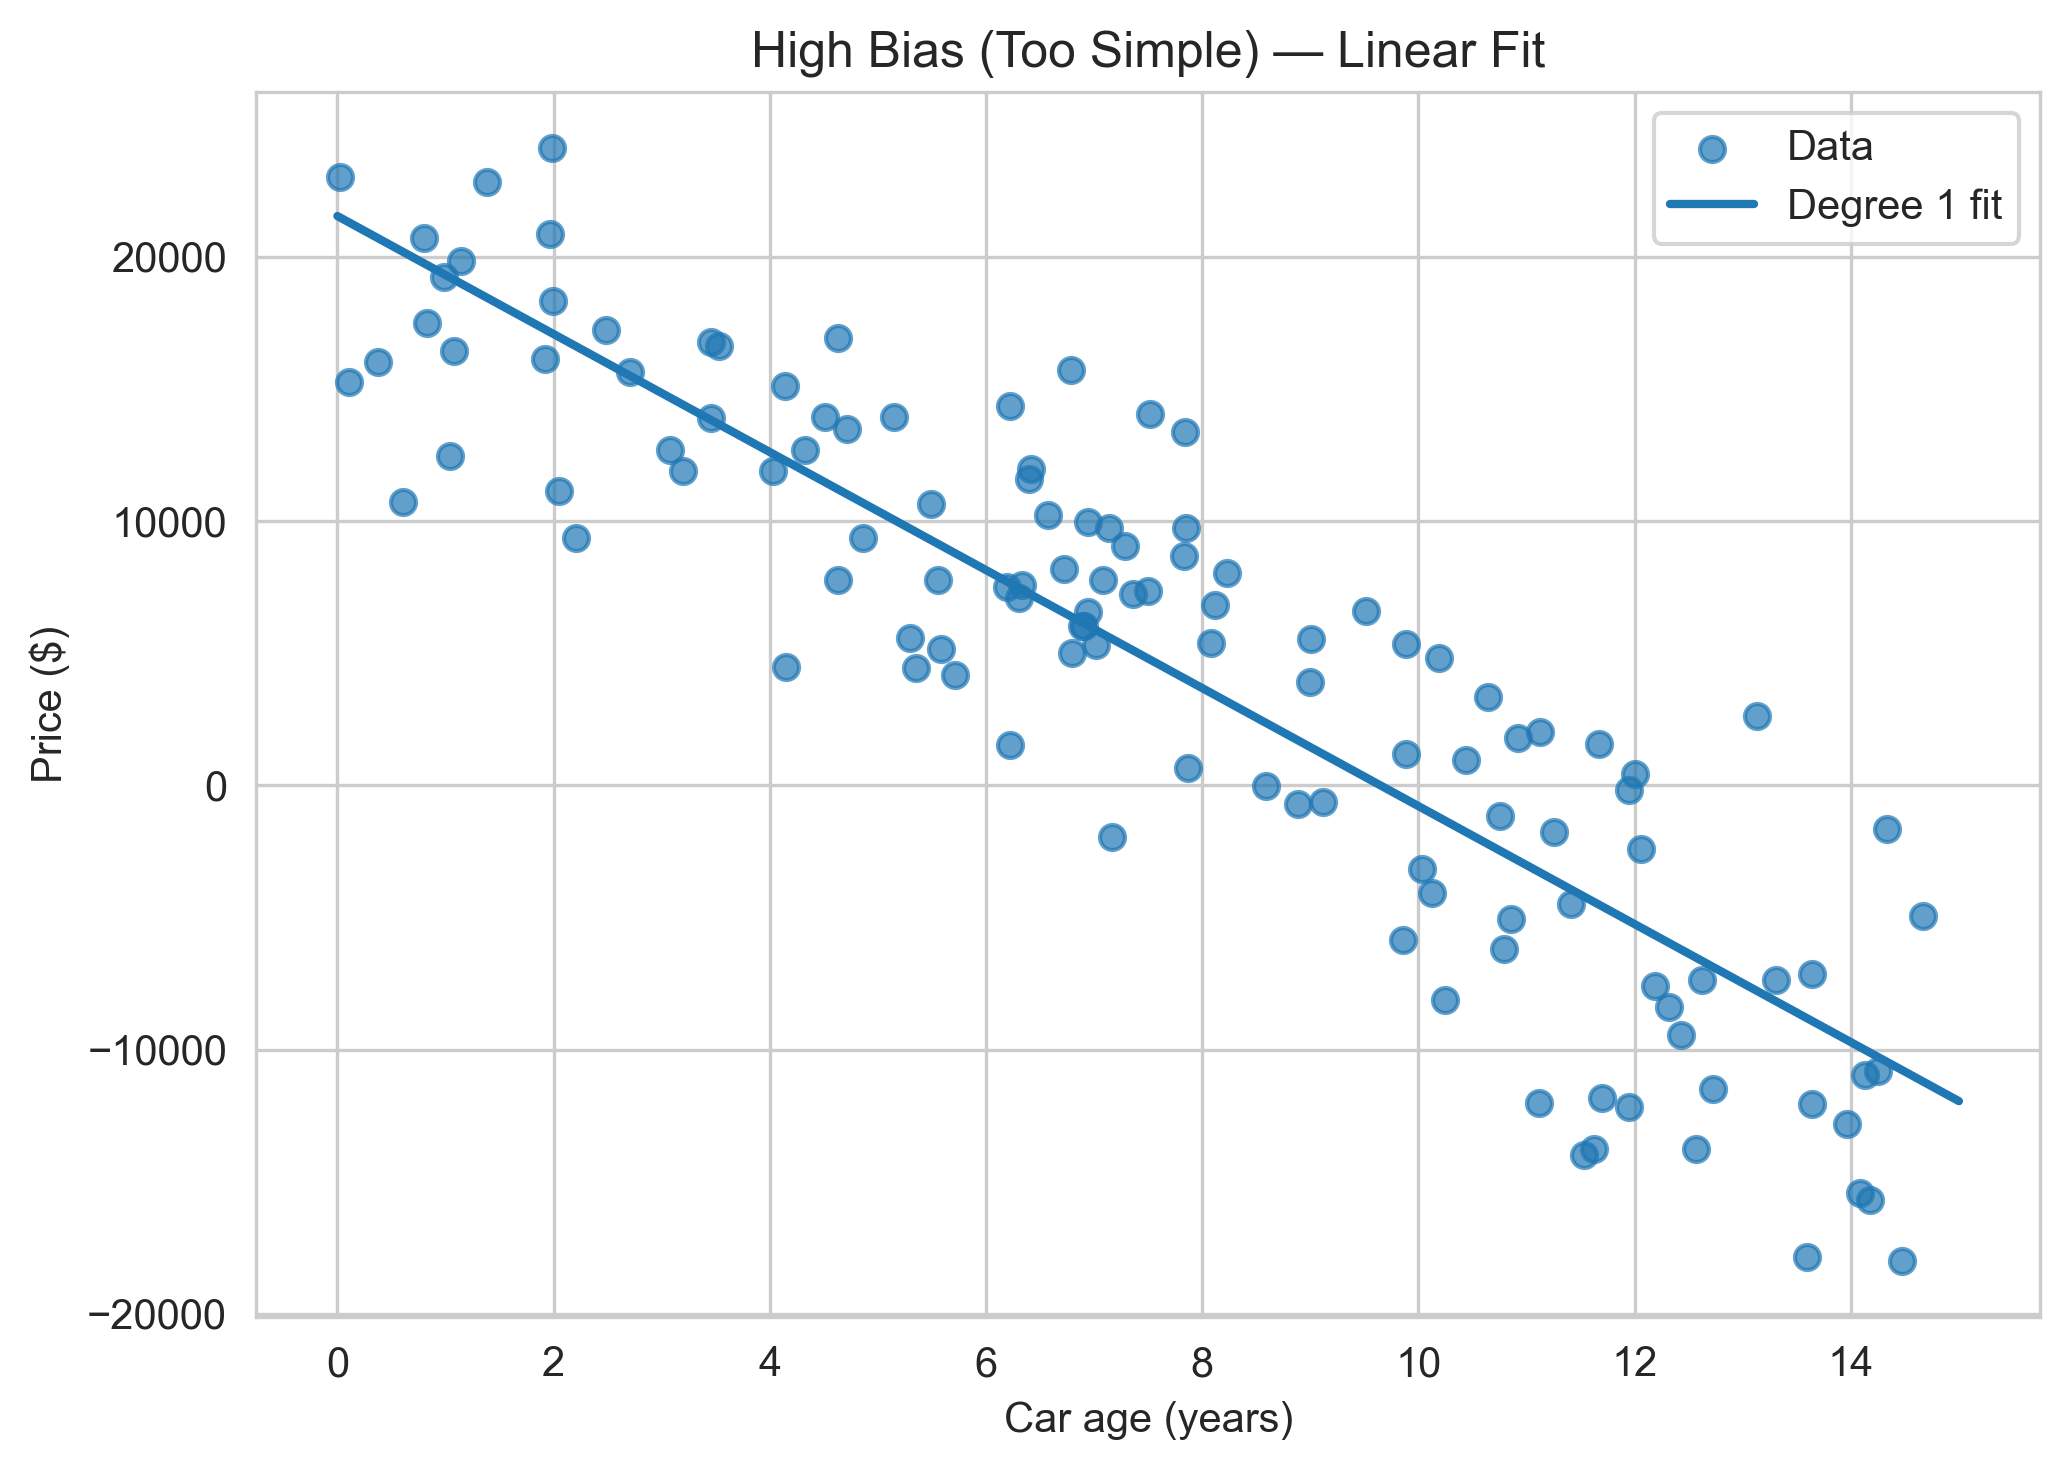

C:\Users\Gamitha\AppData\Local\Temp\ipykernel_15860\2300420419.py:28: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  plt.tight_layout()
e:\studies\ML\projects\ML Learning\House Price Prediction\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


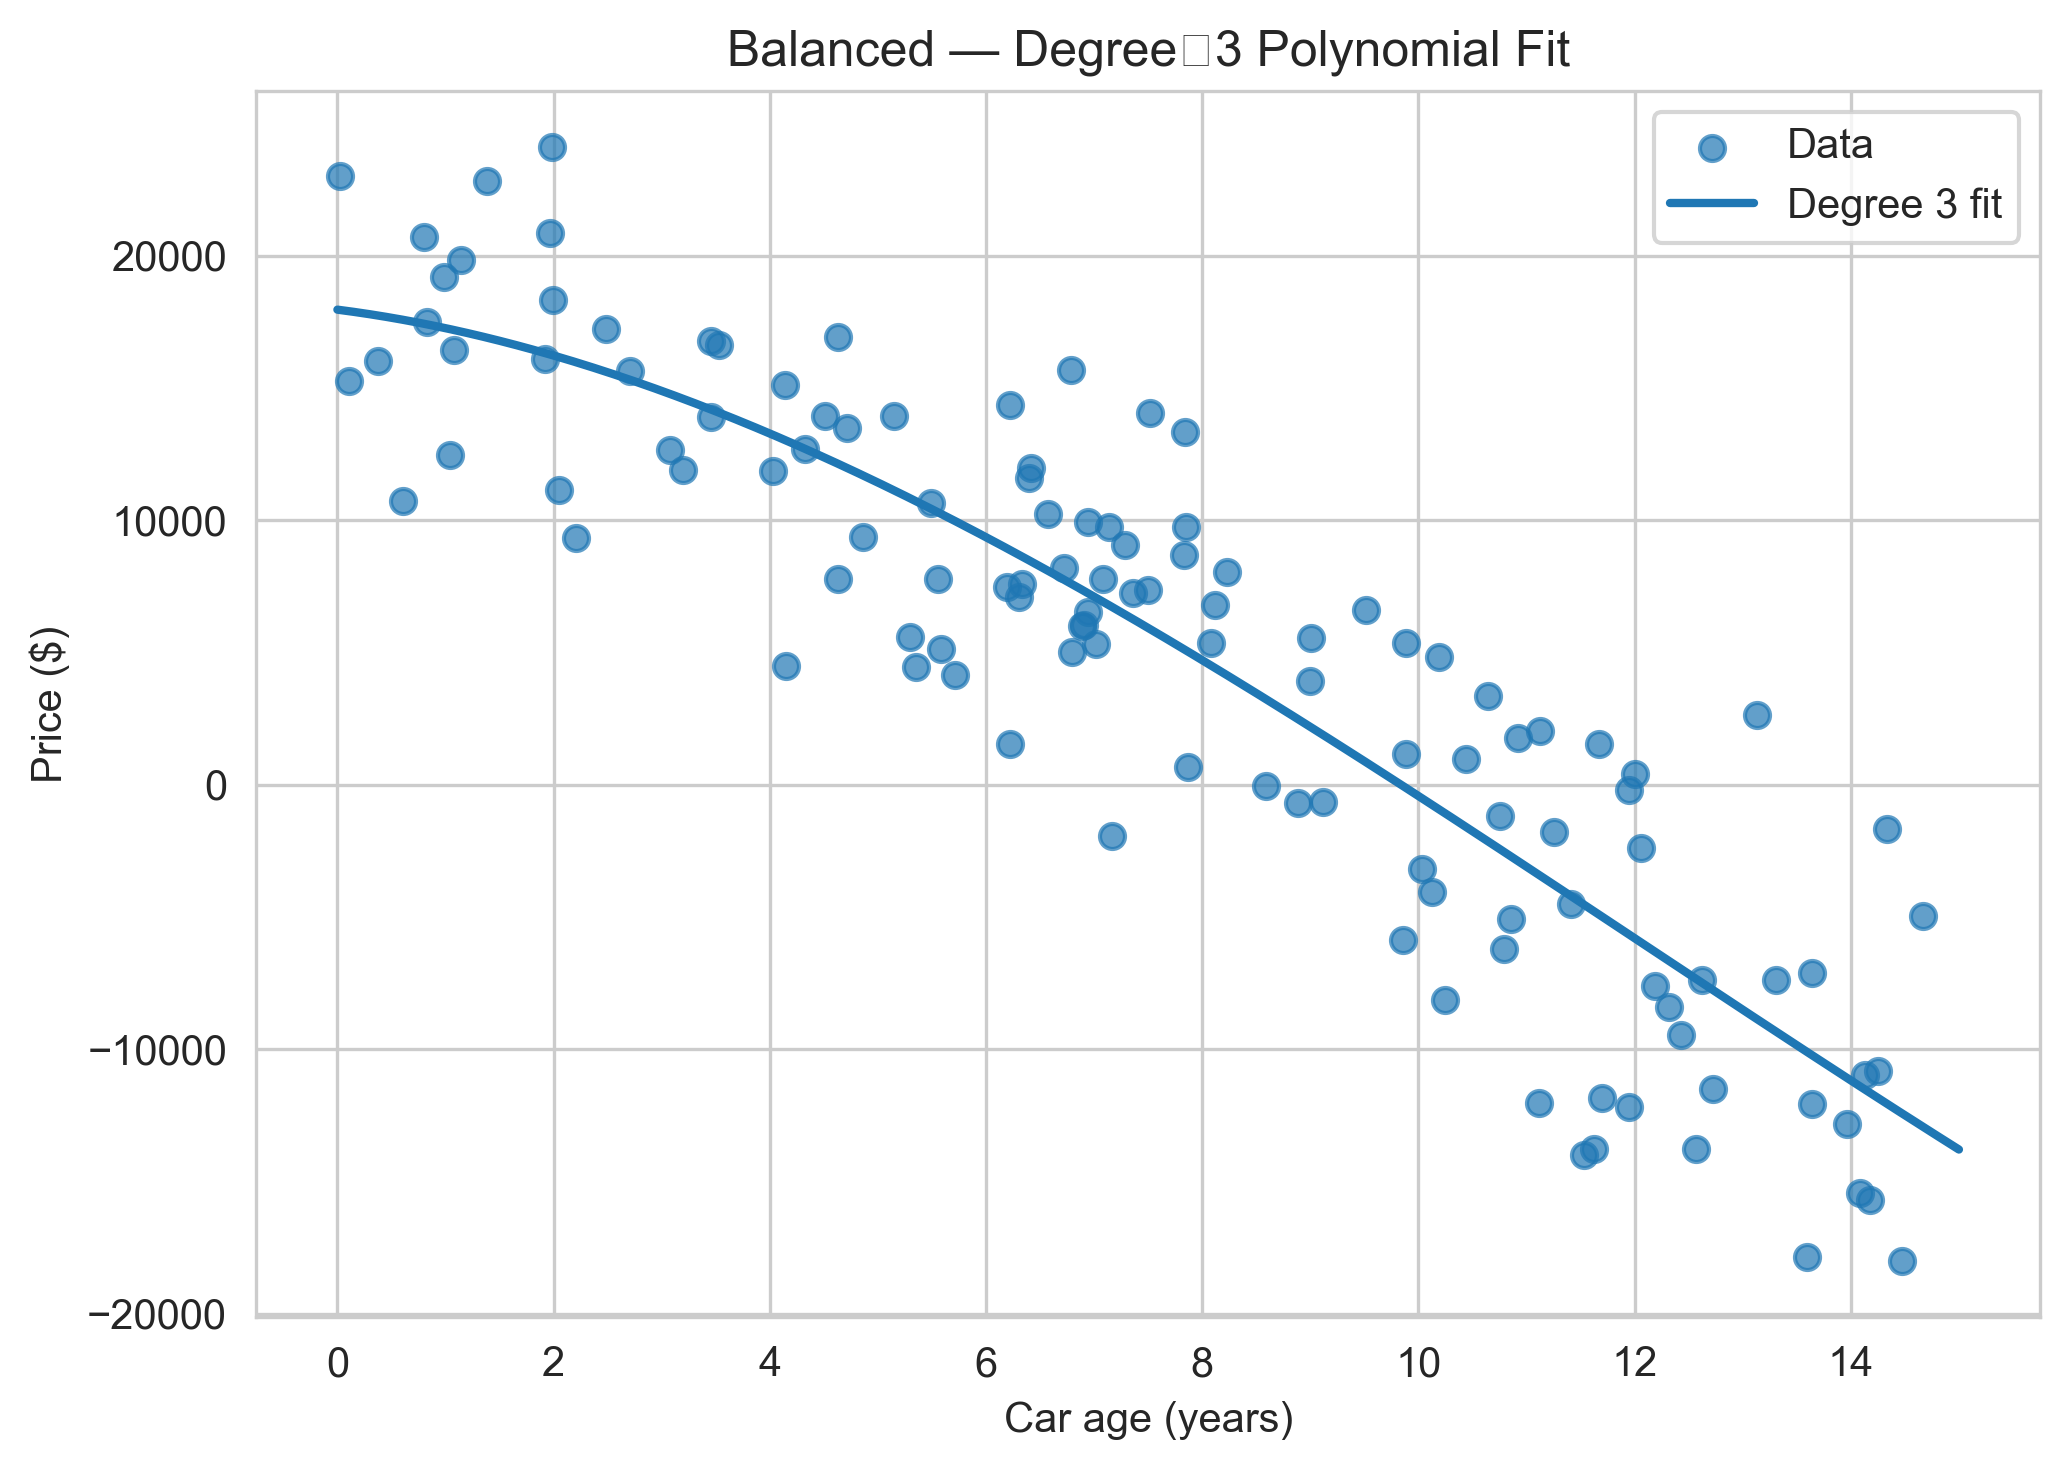

In [22]:

# 1. Generate a “noisier” used‑car dataset
np.random.seed(7)
n_points = 120
ages = np.random.uniform(0, 15, n_points)

# Ground‑truth curve (a bowed downward parabola)
true_price = 20000 - 1500 * ages - 50 * ages**2

# Larger, heteroscedastic noise: older cars have wider price spread
noise = np.random.normal(0, 4000 + 100 * ages, n_points)
prices = true_price + noise

# Helper function to fit and plot a polynomial model
def plot_poly_fit(degree, title):
    coeffs = np.polyfit(ages, prices, degree)
    model = np.poly1d(coeffs)

    x_grid = np.linspace(0, 15, 400)
    y_pred = model(x_grid)

    plt.figure(figsize=(7, 5))
    plt.scatter(ages, prices, alpha=0.7, label="Data")
    plt.plot(x_grid, y_pred, linewidth=2, label=f"Degree {degree} fit")
    plt.xlabel("Car age (years)")
    plt.ylabel("Price ($)")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 2. Visualisations
plot_poly_fit(1, "High Bias (Too Simple) — Linear Fit")
plot_poly_fit(3, "Balanced — Degree‑3 Polynomial Fit")
plot_poly_fit(15, "High Variance (Too Complex) — Degree‑15 Polynomial Fit")


## 4. Data Handling: Loading, EDA, and Preprocessing

### 4.1 Loading and Exploring Real Dataset

In [23]:
# Create synthetic customer dataset with realistic issues
np.random.seed(42)
n_samples = 1000

# Generate realistic customer data
data = {
    'customer_id': range(1, n_samples + 1),
    'age': np.random.normal(35, 12, n_samples),
    'income': np.random.lognormal(10.5, 0.5, n_samples),
    'spending_score': np.random.normal(50, 20, n_samples),
    'years_customer': np.random.exponential(3, n_samples),
    'num_purchases': np.random.poisson(10, n_samples),
    'region': np.random.choice(['North', 'South', 'East', 'West'], n_samples),
    'membership_type': np.random.choice(['Basic', 'Premium', 'VIP'], n_samples, p=[0.6, 0.3, 0.1])
}

# Create DataFrame
customer_df = pd.DataFrame(data)

# Introduce realistic data issues
# Missing values
missing_indices = np.random.choice(n_samples, size=50, replace=False)
customer_df.loc[missing_indices, 'income'] = np.nan

missing_indices = np.random.choice(n_samples, size=30, replace=False)
customer_df.loc[missing_indices, 'spending_score'] = np.nan

# Outliers
outlier_indices = np.random.choice(n_samples, size=20, replace=False)
customer_df.loc[outlier_indices, 'age'] = np.random.uniform(80, 100, 20)

outlier_indices = np.random.choice(n_samples, size=15, replace=False)
customer_df.loc[outlier_indices, 'income'] = np.random.uniform(200000, 500000, 15)

print("Customer Dataset Loaded!")
print(f"Shape: {customer_df.shape}")
print("\nFirst 5 rows:")
print(customer_df.head())

Customer Dataset Loaded!
Shape: (1000, 8)

First 5 rows:
   customer_id        age        income  spending_score  years_customer  \
0            1  40.960570  73106.877027       36.496435        5.123472   
1            2  33.340828  57659.877200       47.109627       12.325429   
2            3  42.772262  37414.558971       34.151602        0.901981   
3            4  53.276358  26279.162694       43.840769       10.492163   
4            5  32.190160  51488.391671       12.127707        1.692858   

   num_purchases region membership_type  
0             15  South           Basic  
1             13  South         Premium  
2             15   West             VIP  
3              8  North           Basic  
4              9  South           Basic  


### 4.2 Exploratory Data Analysis (EDA)

In [24]:
# Comprehensive EDA
print("Dataset Information:")
print("=" * 30)
print(customer_df.info())

print("\nMissing Values:")
print(customer_df.isnull().sum())

print("\nSummary Statistics:")
print(customer_df.describe())

print("\nCategorical Variables:")
categorical_cols = ['region', 'membership_type']
for col in categorical_cols:
    print(f"\n{col}:")
    print(customer_df[col].value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   age              1000 non-null   float64
 2   income           953 non-null    float64
 3   spending_score   970 non-null    float64
 4   years_customer   1000 non-null   float64
 5   num_purchases    1000 non-null   int32  
 6   region           1000 non-null   object 
 7   membership_type  1000 non-null   object 
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 58.7+ KB
None

Missing Values:
customer_id         0
age                 0
income             47
spending_score     30
years_customer      0
num_purchases       0
region              0
membership_type     0
dtype: int64

Summary Statistics:
       customer_id          age         income  spending_score  \
count  1000.000000  1000.000000     953.000

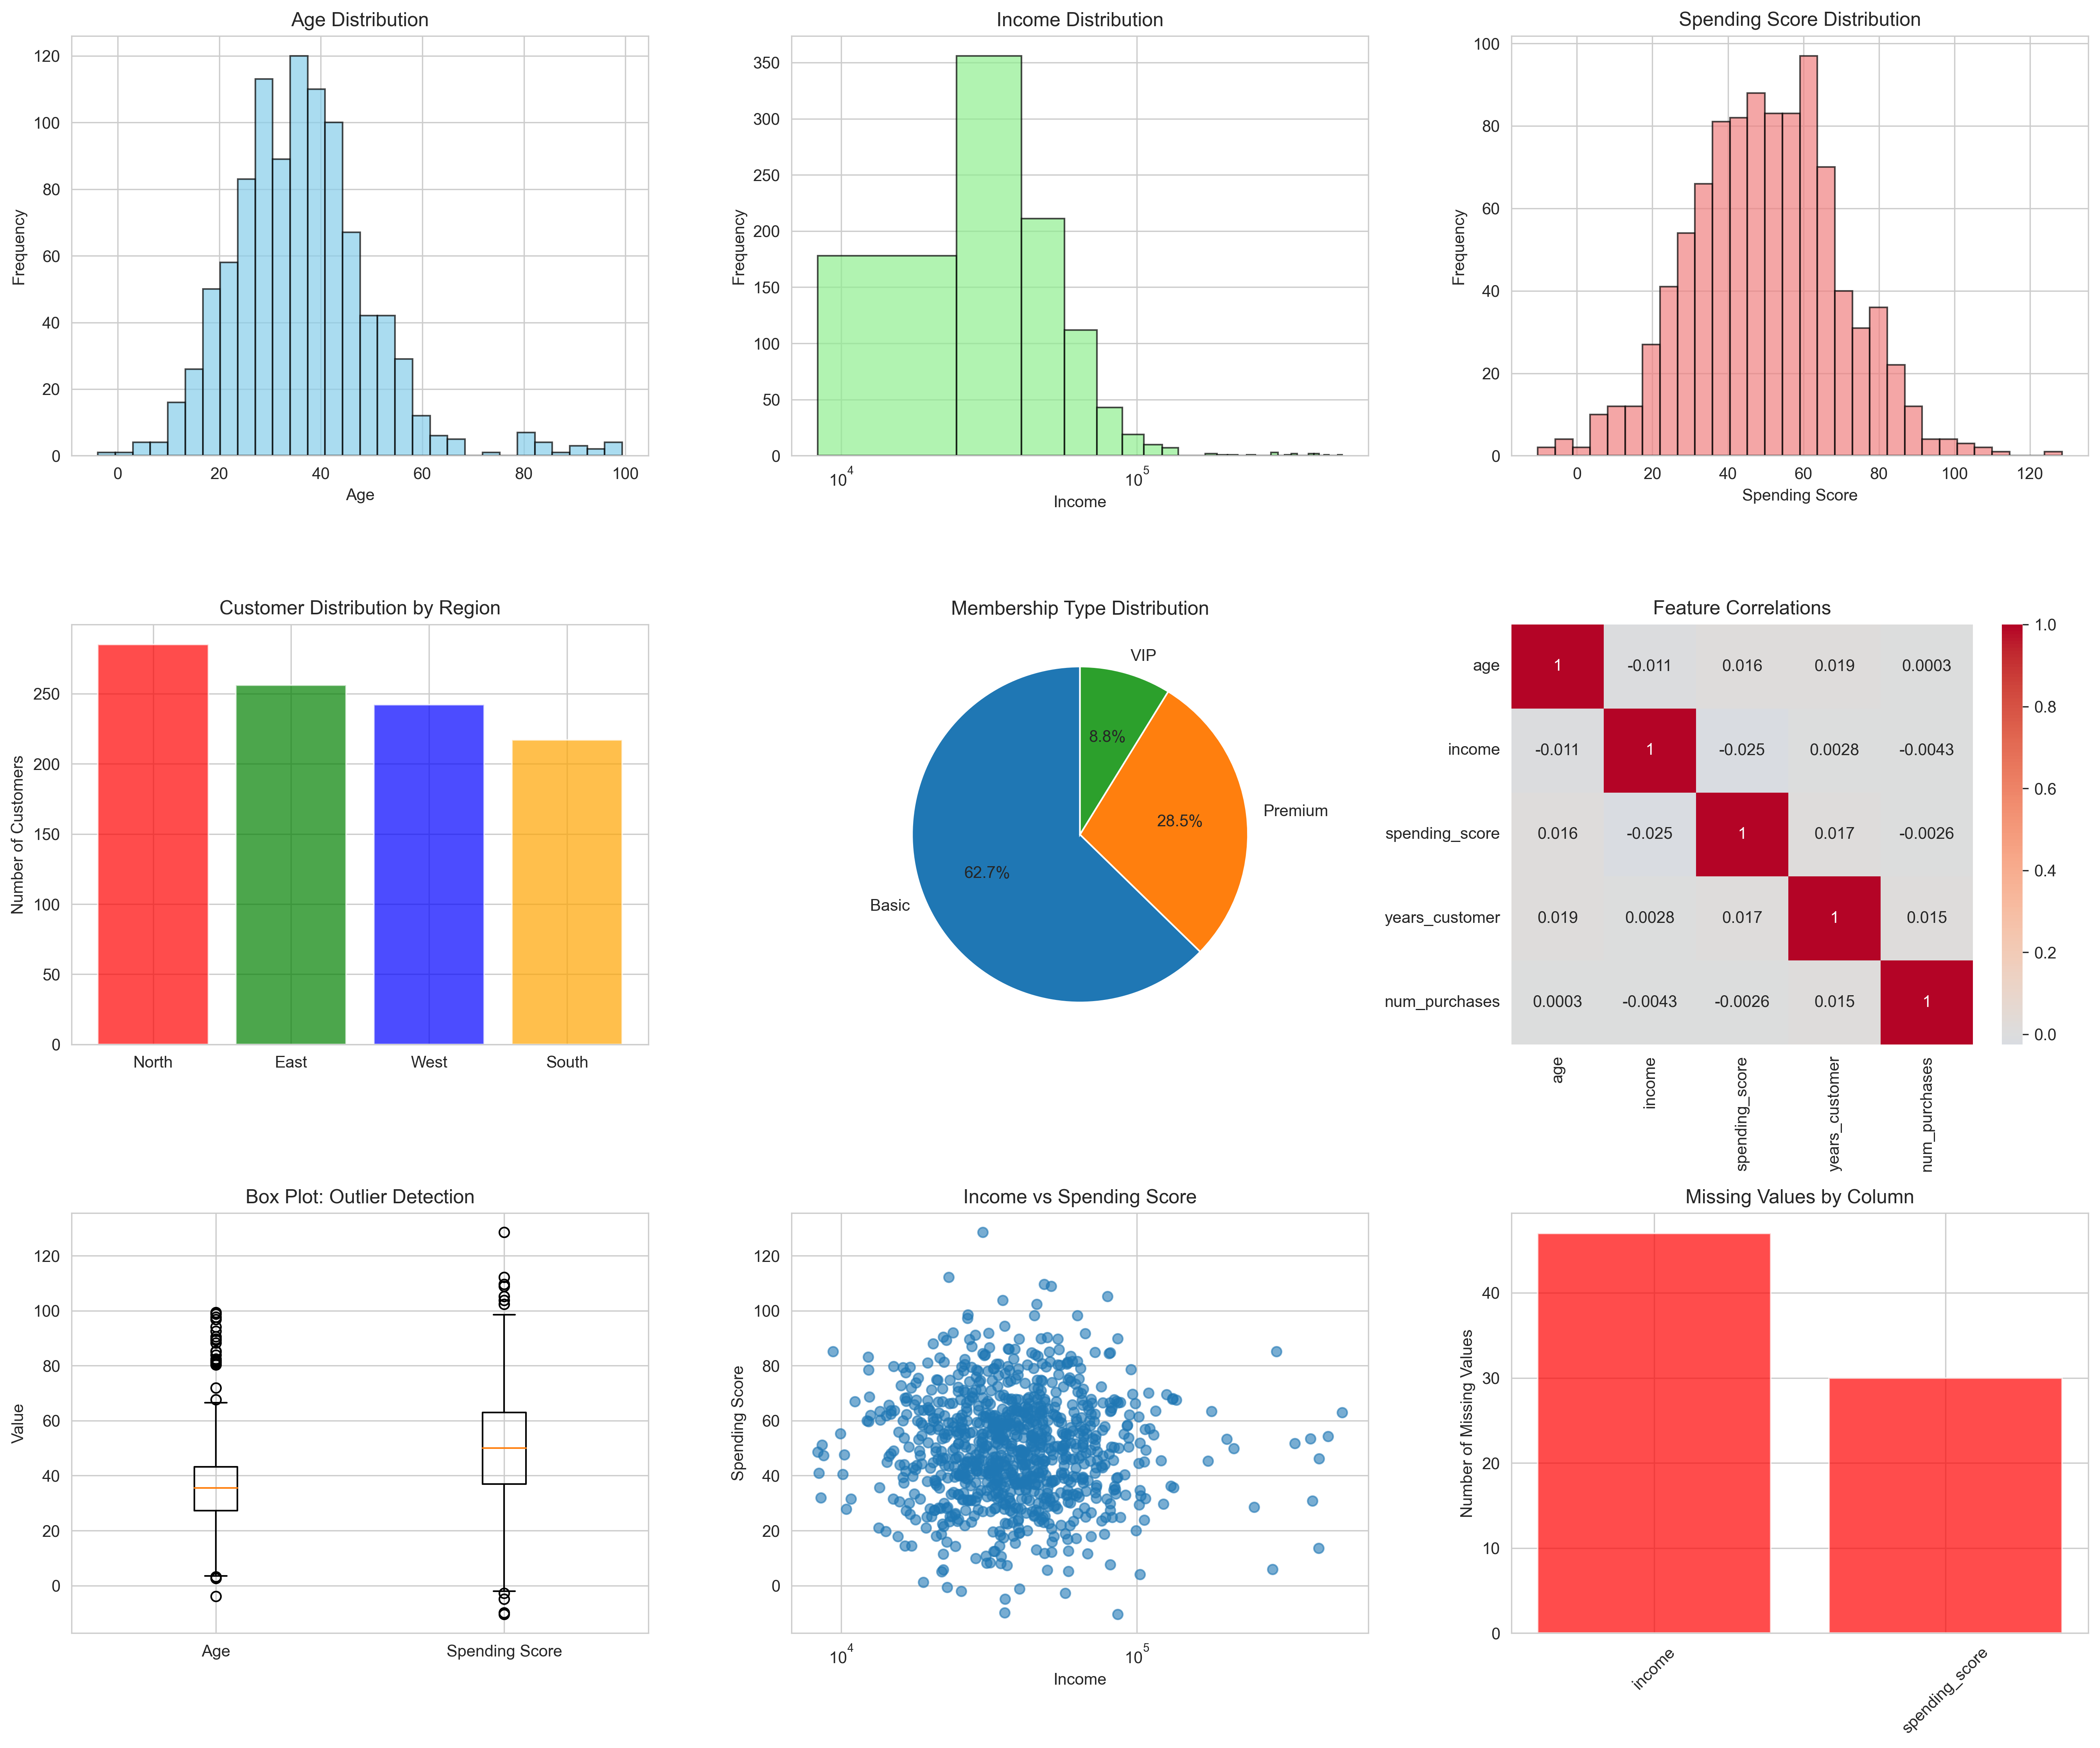

EDA reveals data distribution, outliers, missing values, and relationships!


In [25]:
# Visual EDA
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Age distribution
axes[0, 0].hist(customer_df['age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# 2. Income distribution (log scale)
axes[0, 1].hist(customer_df['income'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Income Distribution')
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xscale('log')

# 3. Spending score distribution
axes[0, 2].hist(customer_df['spending_score'].dropna(), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('Spending Score Distribution')
axes[0, 2].set_xlabel('Spending Score')
axes[0, 2].set_ylabel('Frequency')

# 4. Region distribution
region_counts = customer_df['region'].value_counts()
axes[1, 0].bar(region_counts.index, region_counts.values, color=['red', 'green', 'blue', 'orange'], alpha=0.7)
axes[1, 0].set_title('Customer Distribution by Region')
axes[1, 0].set_ylabel('Number of Customers')

# 5. Membership type distribution
membership_counts = customer_df['membership_type'].value_counts()
axes[1, 1].pie(membership_counts.values, labels=membership_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Membership Type Distribution')

# 6. Correlation heatmap
numeric_cols = ['age', 'income', 'spending_score', 'years_customer', 'num_purchases']
correlation_matrix = customer_df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 2])
axes[1, 2].set_title('Feature Correlations')

# 7. Box plot for outlier detection
axes[2, 0].boxplot([customer_df['age'].dropna(), customer_df['spending_score'].dropna()], 
                   labels=['Age', 'Spending Score'])
axes[2, 0].set_title('Box Plot: Outlier Detection')
axes[2, 0].set_ylabel('Value')

# 8. Scatter plot: Income vs Spending
valid_data = customer_df.dropna(subset=['income', 'spending_score'])
axes[2, 1].scatter(valid_data['income'], valid_data['spending_score'], alpha=0.6)
axes[2, 1].set_xlabel('Income')
axes[2, 1].set_ylabel('Spending Score')
axes[2, 1].set_title('Income vs Spending Score')
axes[2, 1].set_xscale('log')

# 9. Missing values visualization
missing_data = customer_df.isnull().sum()
missing_data = missing_data[missing_data > 0]
if len(missing_data) > 0:
    axes[2, 2].bar(missing_data.index, missing_data.values, color='red', alpha=0.7)
    axes[2, 2].set_title('Missing Values by Column')
    axes[2, 2].set_ylabel('Number of Missing Values')
    axes[2, 2].tick_params(axis='x', rotation=45)
else:
    axes[2, 2].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', transform=axes[2, 2].transAxes)
    axes[2, 2].set_title('Missing Values by Column')

plt.tight_layout()
plt.show()

print("EDA reveals data distribution, outliers, missing values, and relationships!")

### 4.3 Data Preprocessing

In [26]:
# Data preprocessing steps
print("Data Preprocessing Steps:")
print("=" * 40)

# Create a copy for preprocessing
df_processed = customer_df.copy()

# Step 1: Handle missing values
print("\n1. Handling Missing Values:")
print(f"   Before: {df_processed.isnull().sum().sum()} missing values")

# Fill missing income with median
median_income = df_processed['income'].median()
df_processed['income'].fillna(median_income, inplace=True)

# Fill missing spending_score with mean
mean_spending = df_processed['spending_score'].mean()
df_processed['spending_score'].fillna(mean_spending, inplace=True)

print(f"   After: {df_processed.isnull().sum().sum()} missing values")
print(f"   Income filled with median: ${median_income:.2f}")
print(f"   Spending score filled with mean: {mean_spending:.2f}")

# Step 2: Handle outliers
print("\n2. Handling Outliers (using IQR method):")

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_before = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    outliers_removed = len(df) - len(df_clean)
    
    print(f"   {column}: {outliers_removed} outliers removed (bounds: {lower_bound:.2f} - {upper_bound:.2f})")
    return df_clean

# Remove outliers from key numeric columns
original_size = len(df_processed)
df_processed = remove_outliers_iqr(df_processed, 'age')
df_processed = remove_outliers_iqr(df_processed, 'income')
final_size = len(df_processed)
print(f"   Dataset size: {original_size} → {final_size} ({(1-final_size/original_size)*100:.1f}% removed)")

# Step 3: Feature scaling
print("\n3. Feature Scaling:")
numeric_features = ['age', 'income', 'spending_score', 'years_customer', 'num_purchases']

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
df_processed[['age_scaled', 'income_scaled', 'spending_score_scaled']] = scaler_standard.fit_transform(
    df_processed[['age', 'income', 'spending_score']]
)

print("   Standardized features: age, income, spending_score")
print(f"   Mean after scaling: {df_processed[['age_scaled', 'income_scaled', 'spending_score_scaled']].mean().round(3).tolist()}")
print(f"   Std after scaling: {df_processed[['age_scaled', 'income_scaled', 'spending_score_scaled']].std().round(3).tolist()}")

# Step 4: Encoding categorical variables
print("\n4. Encoding Categorical Variables:")

# Label encoding for ordinal data (membership_type)
le = LabelEncoder()
membership_mapping = {'Basic': 0, 'Premium': 1, 'VIP': 2}
df_processed['membership_encoded'] = df_processed['membership_type'].map(membership_mapping)
print("   Label encoded: membership_type (Basic=0, Premium=1, VIP=2)")

# One-hot encoding for nominal data (region)
region_dummies = pd.get_dummies(df_processed['region'], prefix='region')
df_processed = pd.concat([df_processed, region_dummies], axis=1)
print(f"   One-hot encoded: region → {list(region_dummies.columns)}")

print(f"\nFinal processed dataset shape: {df_processed.shape}")
print("Preprocessing complete!")

Data Preprocessing Steps:

1. Handling Missing Values:
   Before: 77 missing values
   After: 0 missing values
   Income filled with median: $37737.55
   Spending score filled with mean: 50.01

2. Handling Outliers (using IQR method):
   age: 26 outliers removed (bounds: 3.42 - 67.17)
   income: 54 outliers removed (bounds: -8620.77 - 87890.43)
   Dataset size: 1000 → 920 (8.0% removed)

3. Feature Scaling:
   Standardized features: age, income, spending_score
   Mean after scaling: [0.0, -0.0, -0.0]
   Std after scaling: [1.001, 1.001, 1.001]

4. Encoding Categorical Variables:
   Label encoded: membership_type (Basic=0, Premium=1, VIP=2)
   One-hot encoded: region → ['region_East', 'region_North', 'region_South', 'region_West']

Final processed dataset shape: (920, 16)
Preprocessing complete!


In [27]:
# Visualize preprocessing results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Before vs After: Age distribution
axes[0, 0].hist(customer_df['age'].dropna(), bins=30, alpha=0.7, label='Before', color='red')
axes[0, 0].hist(df_processed['age'].dropna(),   bins=30, alpha=0.7, label='After',  color='blue')
axes[0, 0].set_title('Age Distribution: Before vs After Outlier Removal')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# 2. Before vs After: Income distribution
axes[0, 1].hist(customer_df['income'].dropna(), bins=30, alpha=0.7, label='Before', color='red')
axes[0, 1].hist(df_processed['income'].dropna(), bins=30, alpha=0.7, label='After',  color='blue')
axes[0, 1].set_title('Income Distribution: Before vs After Processing')
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xscale('log')
axes[0, 1].legend()

# 3. Scaled features comparison
scaled_features = df_processed[['age_scaled', 'income_scaled', 'spending_score_scaled']]
axes[0, 2].boxplot(
    [scaled_features['age_scaled'], scaled_features['income_scaled'], scaled_features['spending_score_scaled']],
    labels=['Age', 'Income', 'Spending']
)
axes[0, 2].set_title('Scaled Features (Mean=0, Std=1)')
axes[0, 2].set_ylabel('Standardized Value')

# 4. Missing values: Before vs After
missing_before = customer_df.isnull().sum()
missing_after  = df_processed[customer_df.columns].isnull().sum()
comparison_df = pd.DataFrame({'Before': missing_before, 'After': missing_after})
comparison_df = comparison_df[comparison_df['Before'] > 0]

if len(comparison_df) > 0:
    comparison_df.plot(kind='bar', ax=axes[1, 0], color=['red', 'blue'], alpha=0.7)
    axes[1, 0].set_title('Missing Values: Before vs After')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].tick_params(axis='x', rotation=45)
else:
    axes[1, 0].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Missing Values: Before vs After')

# 5. Categorical encoding visualization  (FIXED)
orig_counts = df_processed['membership_type'].astype(str).value_counts()
enc_counts  = df_processed['membership_encoded'].astype(str).value_counts()
all_idx = orig_counts.index.union(enc_counts.index)

encoded_comparison = pd.DataFrame({
    'Original': orig_counts.reindex(all_idx),
    'Encoded':  enc_counts.reindex(all_idx)
}).fillna(0)

encoded_comparison.plot(kind='bar', ax=axes[1, 1], color=['orange', 'green'], alpha=0.7)
axes[1, 1].set_title('Membership Type: Original vs Encoded')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. One-hot encoding visualization
region_cols = [col for col in df_processed.columns if col.startswith('region_')]
region_encoded = df_processed[region_cols].sum()
region_encoded.plot(kind='bar', ax=axes[1, 2], color='purple', alpha=0.7)
axes[1, 2].set_title('One-Hot Encoded Regions')
axes[1, 2].set_ylabel('Count')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nKey Preprocessing Techniques:")
print("1. Missing Value Imputation: Fill with mean/median/mode")
print("2. Outlier Detection: IQR method to identify and remove extreme values")
print("3. Feature Scaling: Standardization to ensure equal feature importance")
print("4. Categorical Encoding: Label encoding for ordinal, one-hot for nominal")
print("\nData is now ready for machine learning algorithms!")



Key Preprocessing Techniques:
1. Missing Value Imputation: Fill with mean/median/mode
2. Outlier Detection: IQR method to identify and remove extreme values
3. Feature Scaling: Standardization to ensure equal feature importance
4. Categorical Encoding: Label encoding for ordinal, one-hot for nominal

Data is now ready for machine learning algorithms!
